# TC-ADC-I: TEST-ADC-VAL 

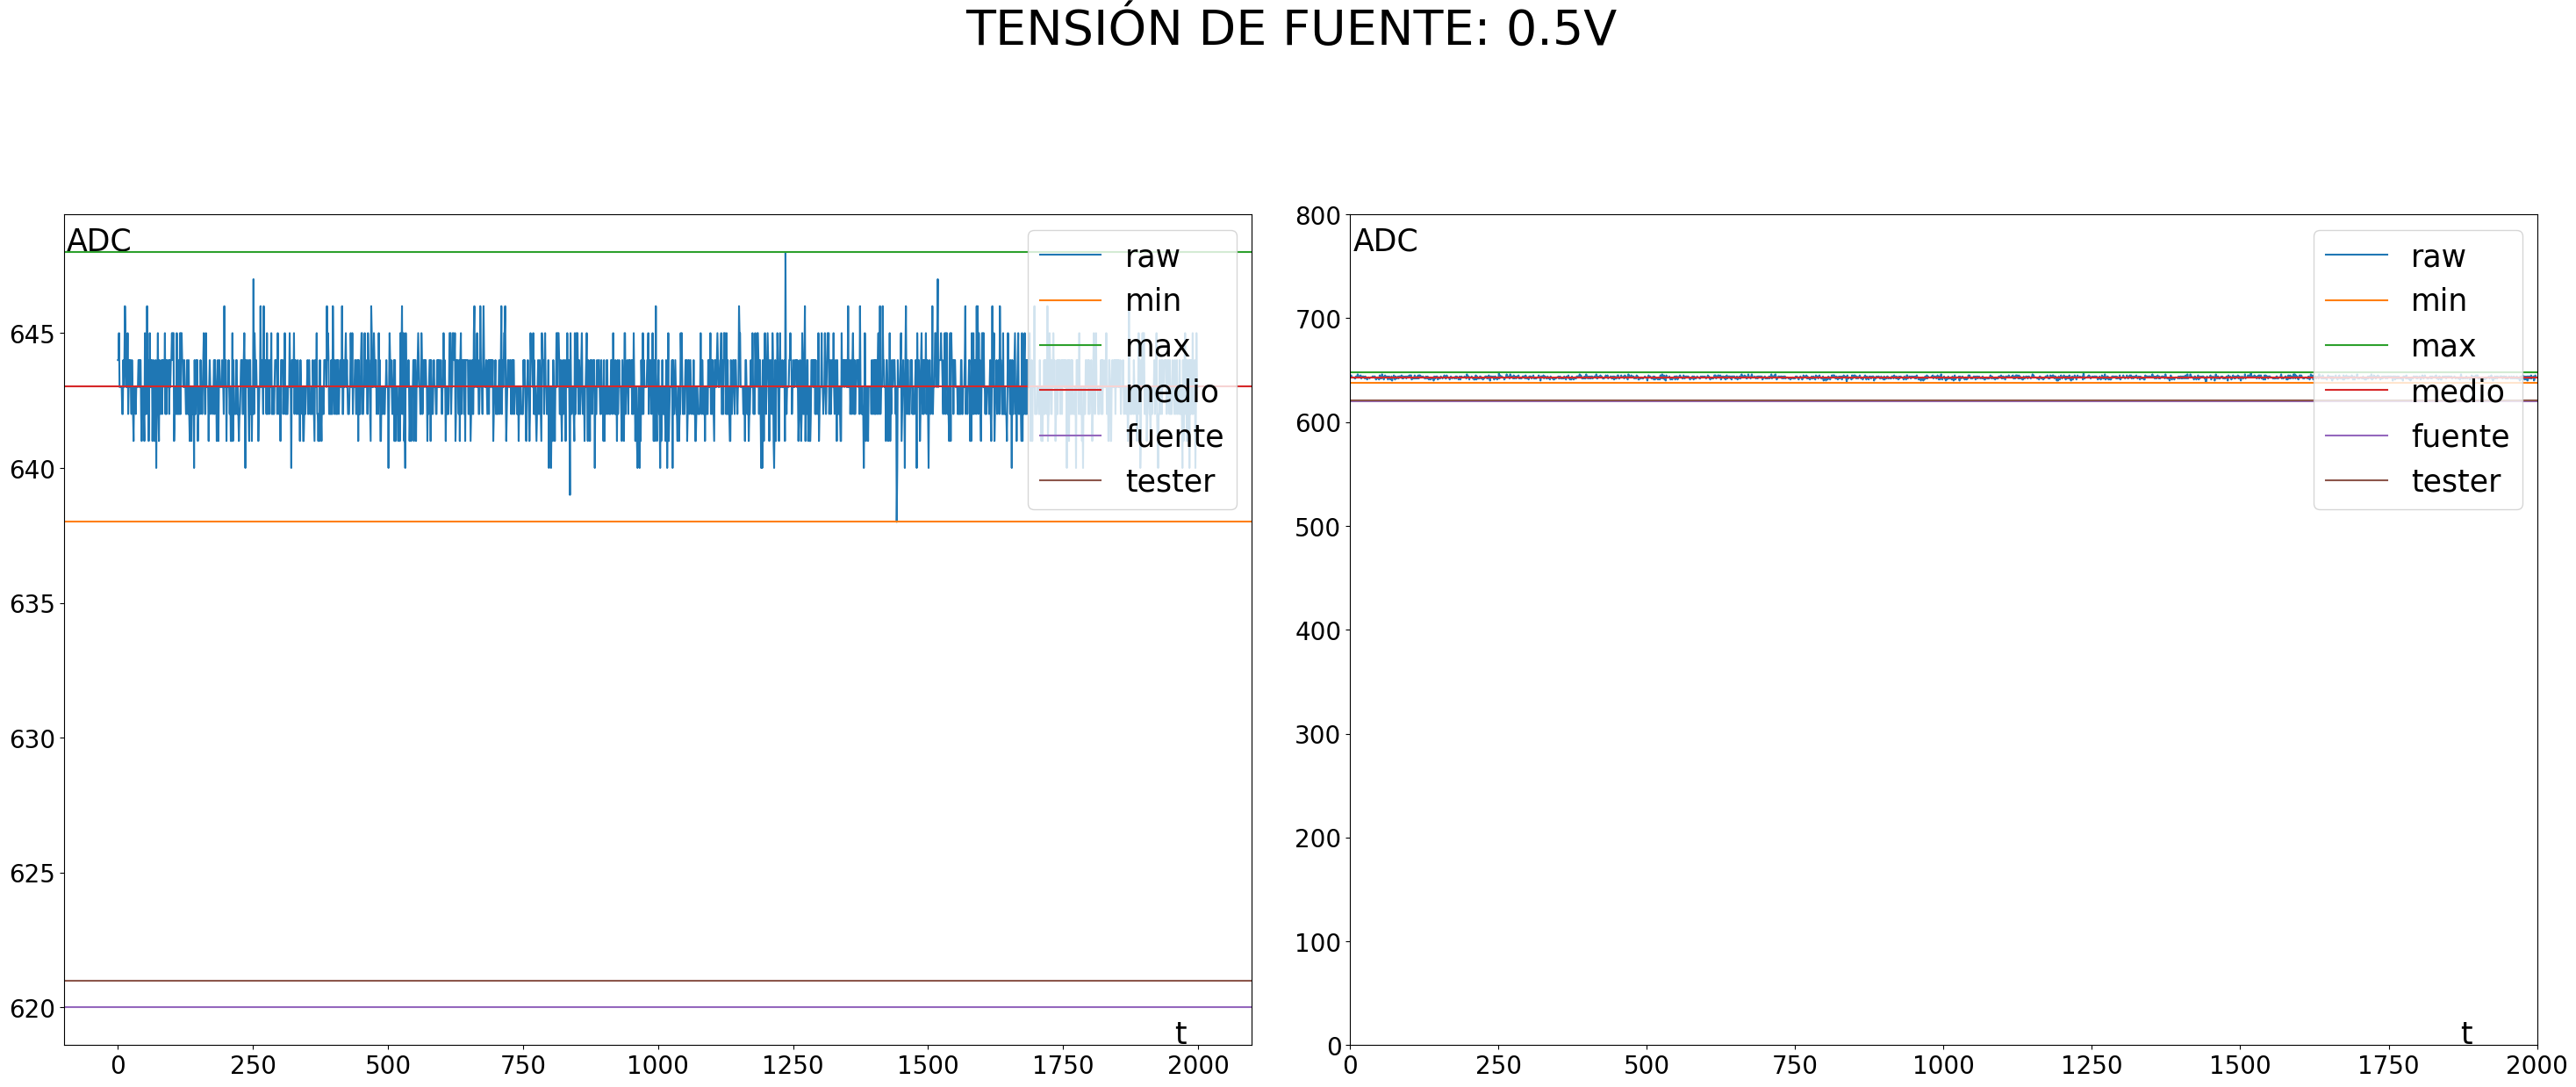

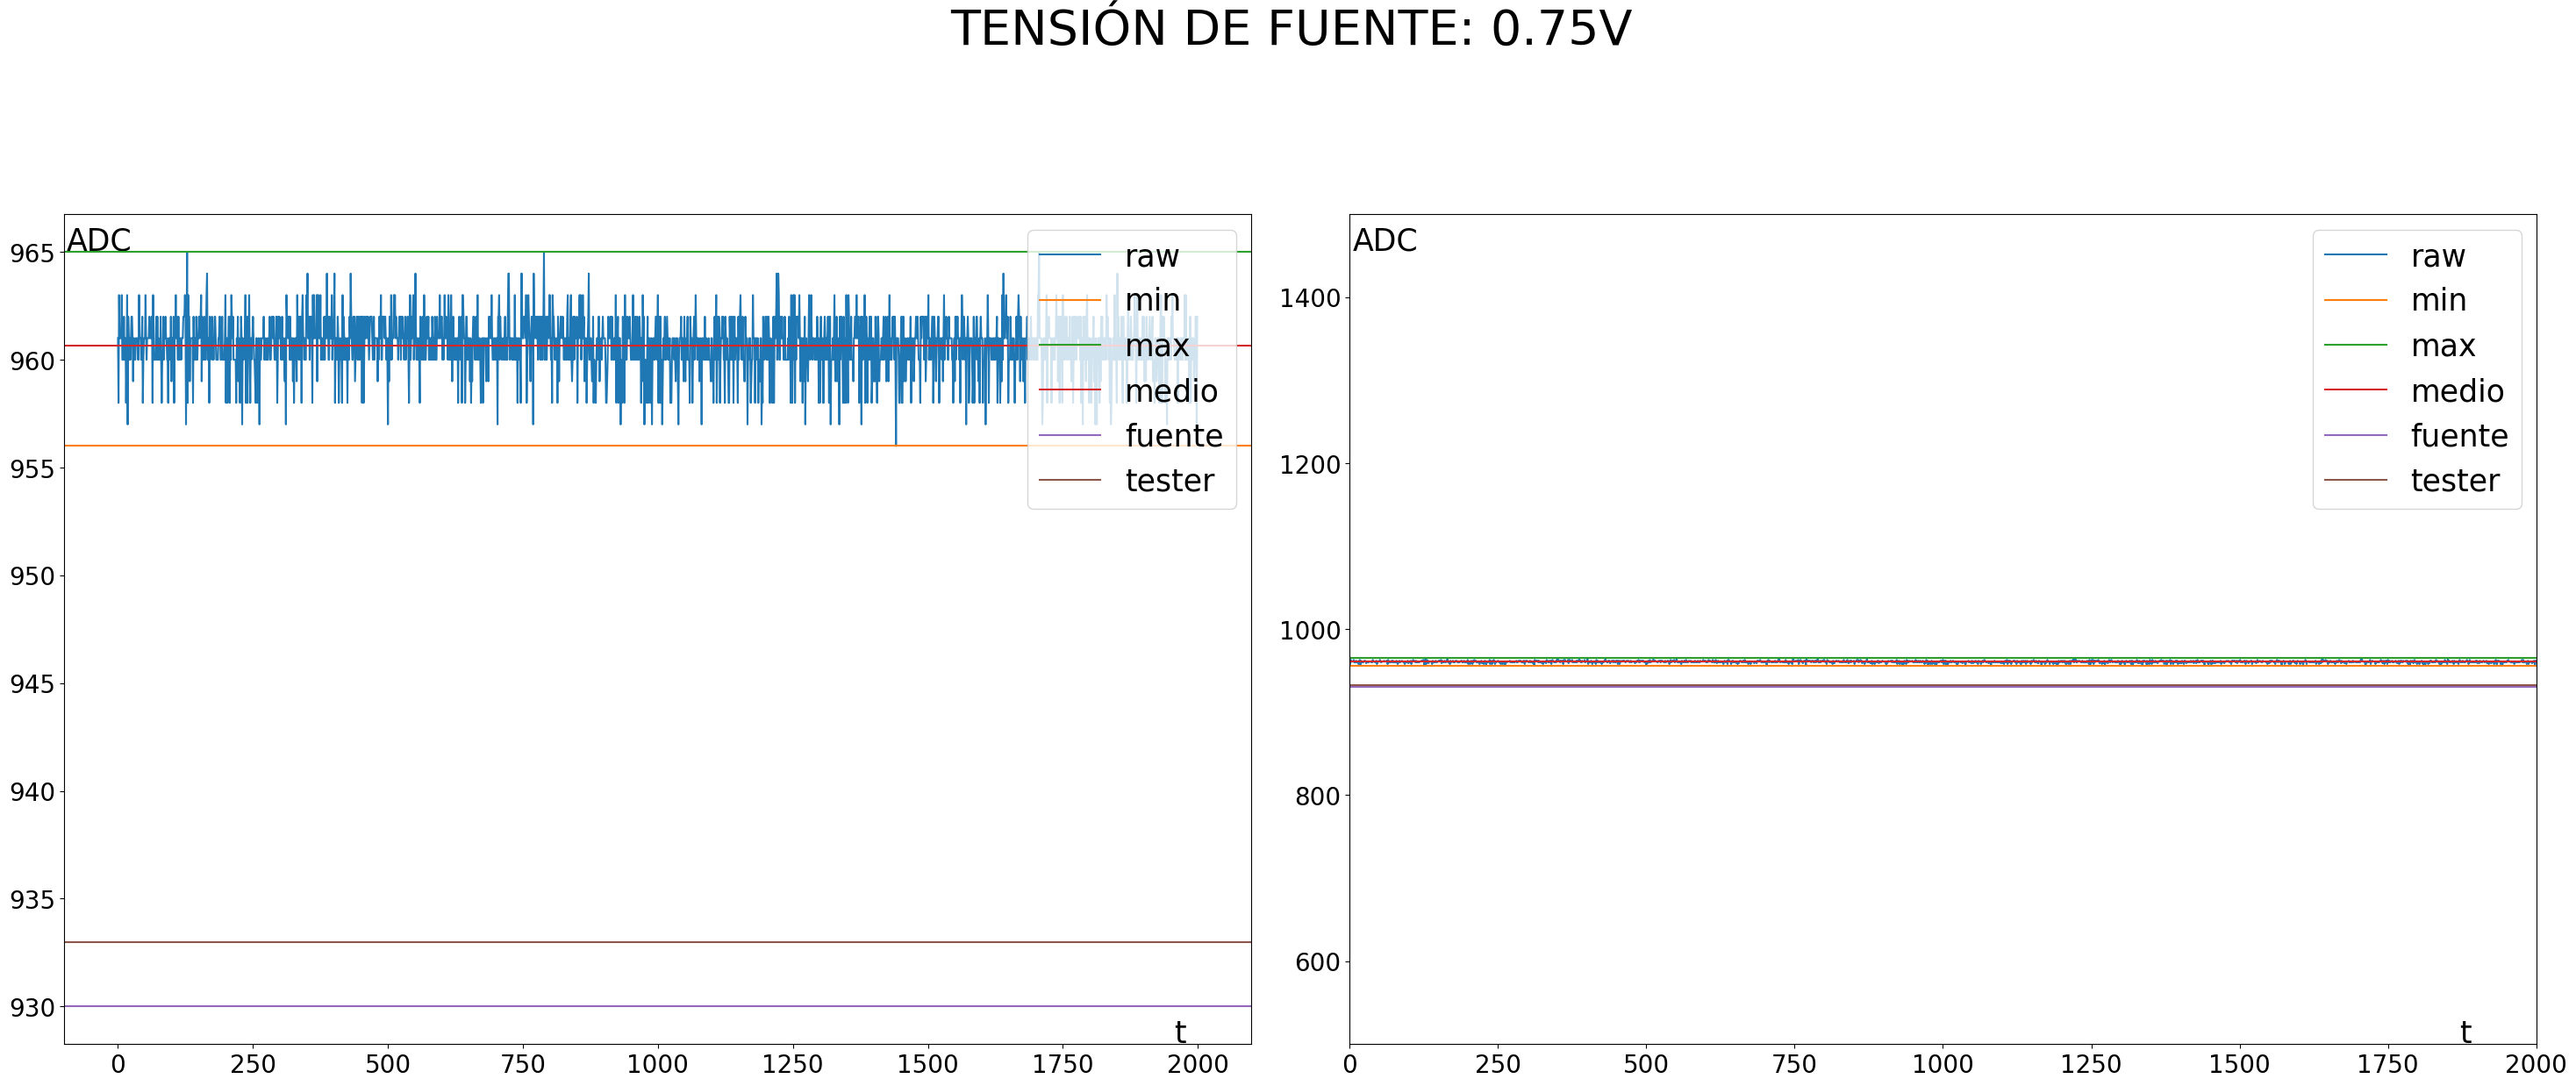

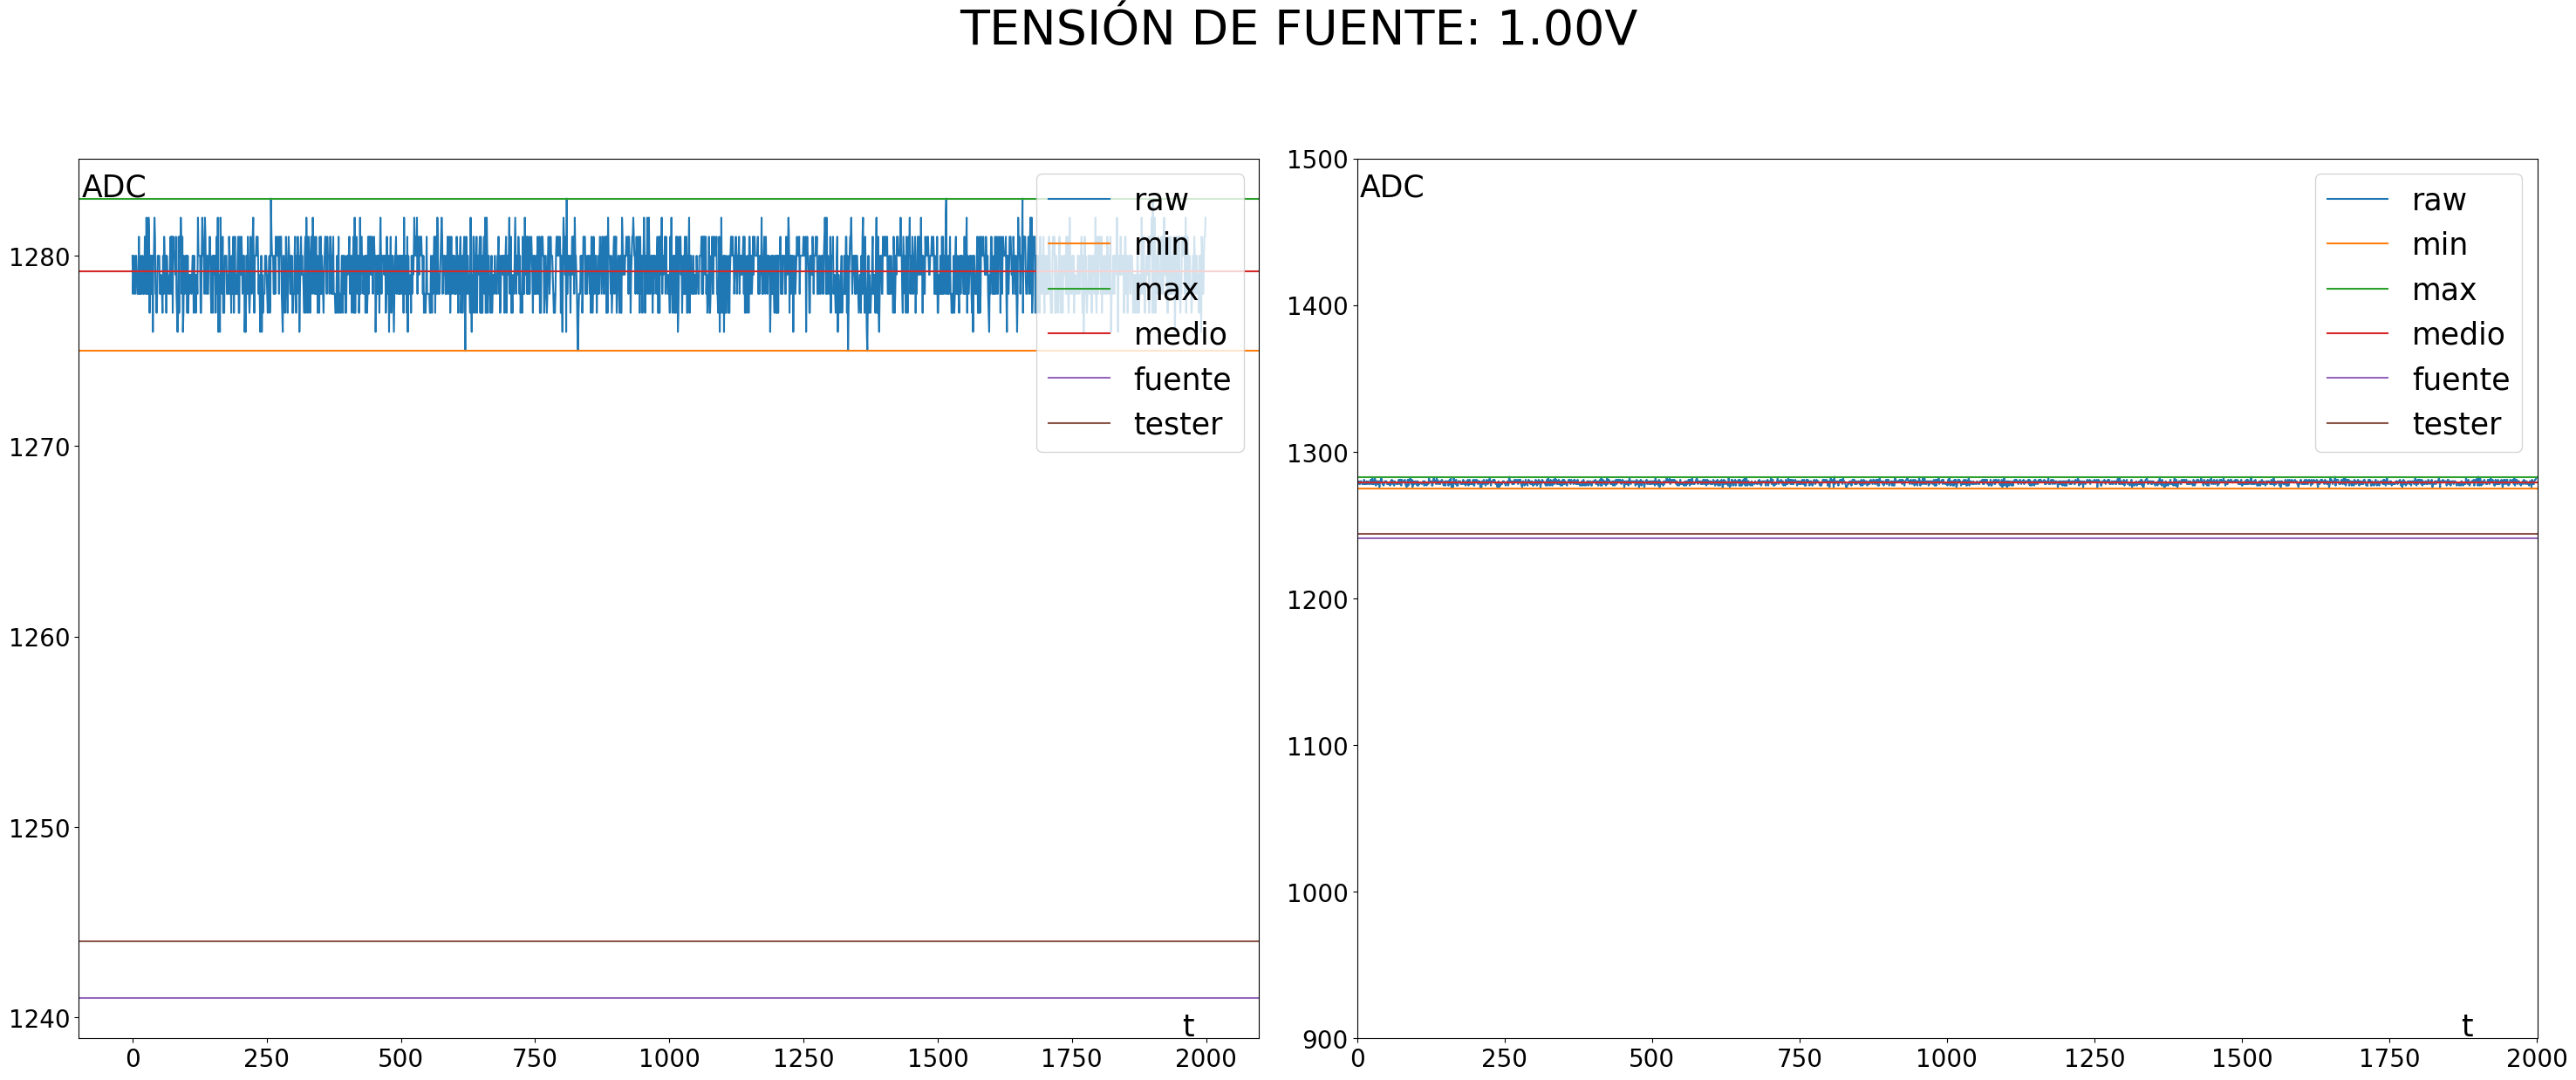

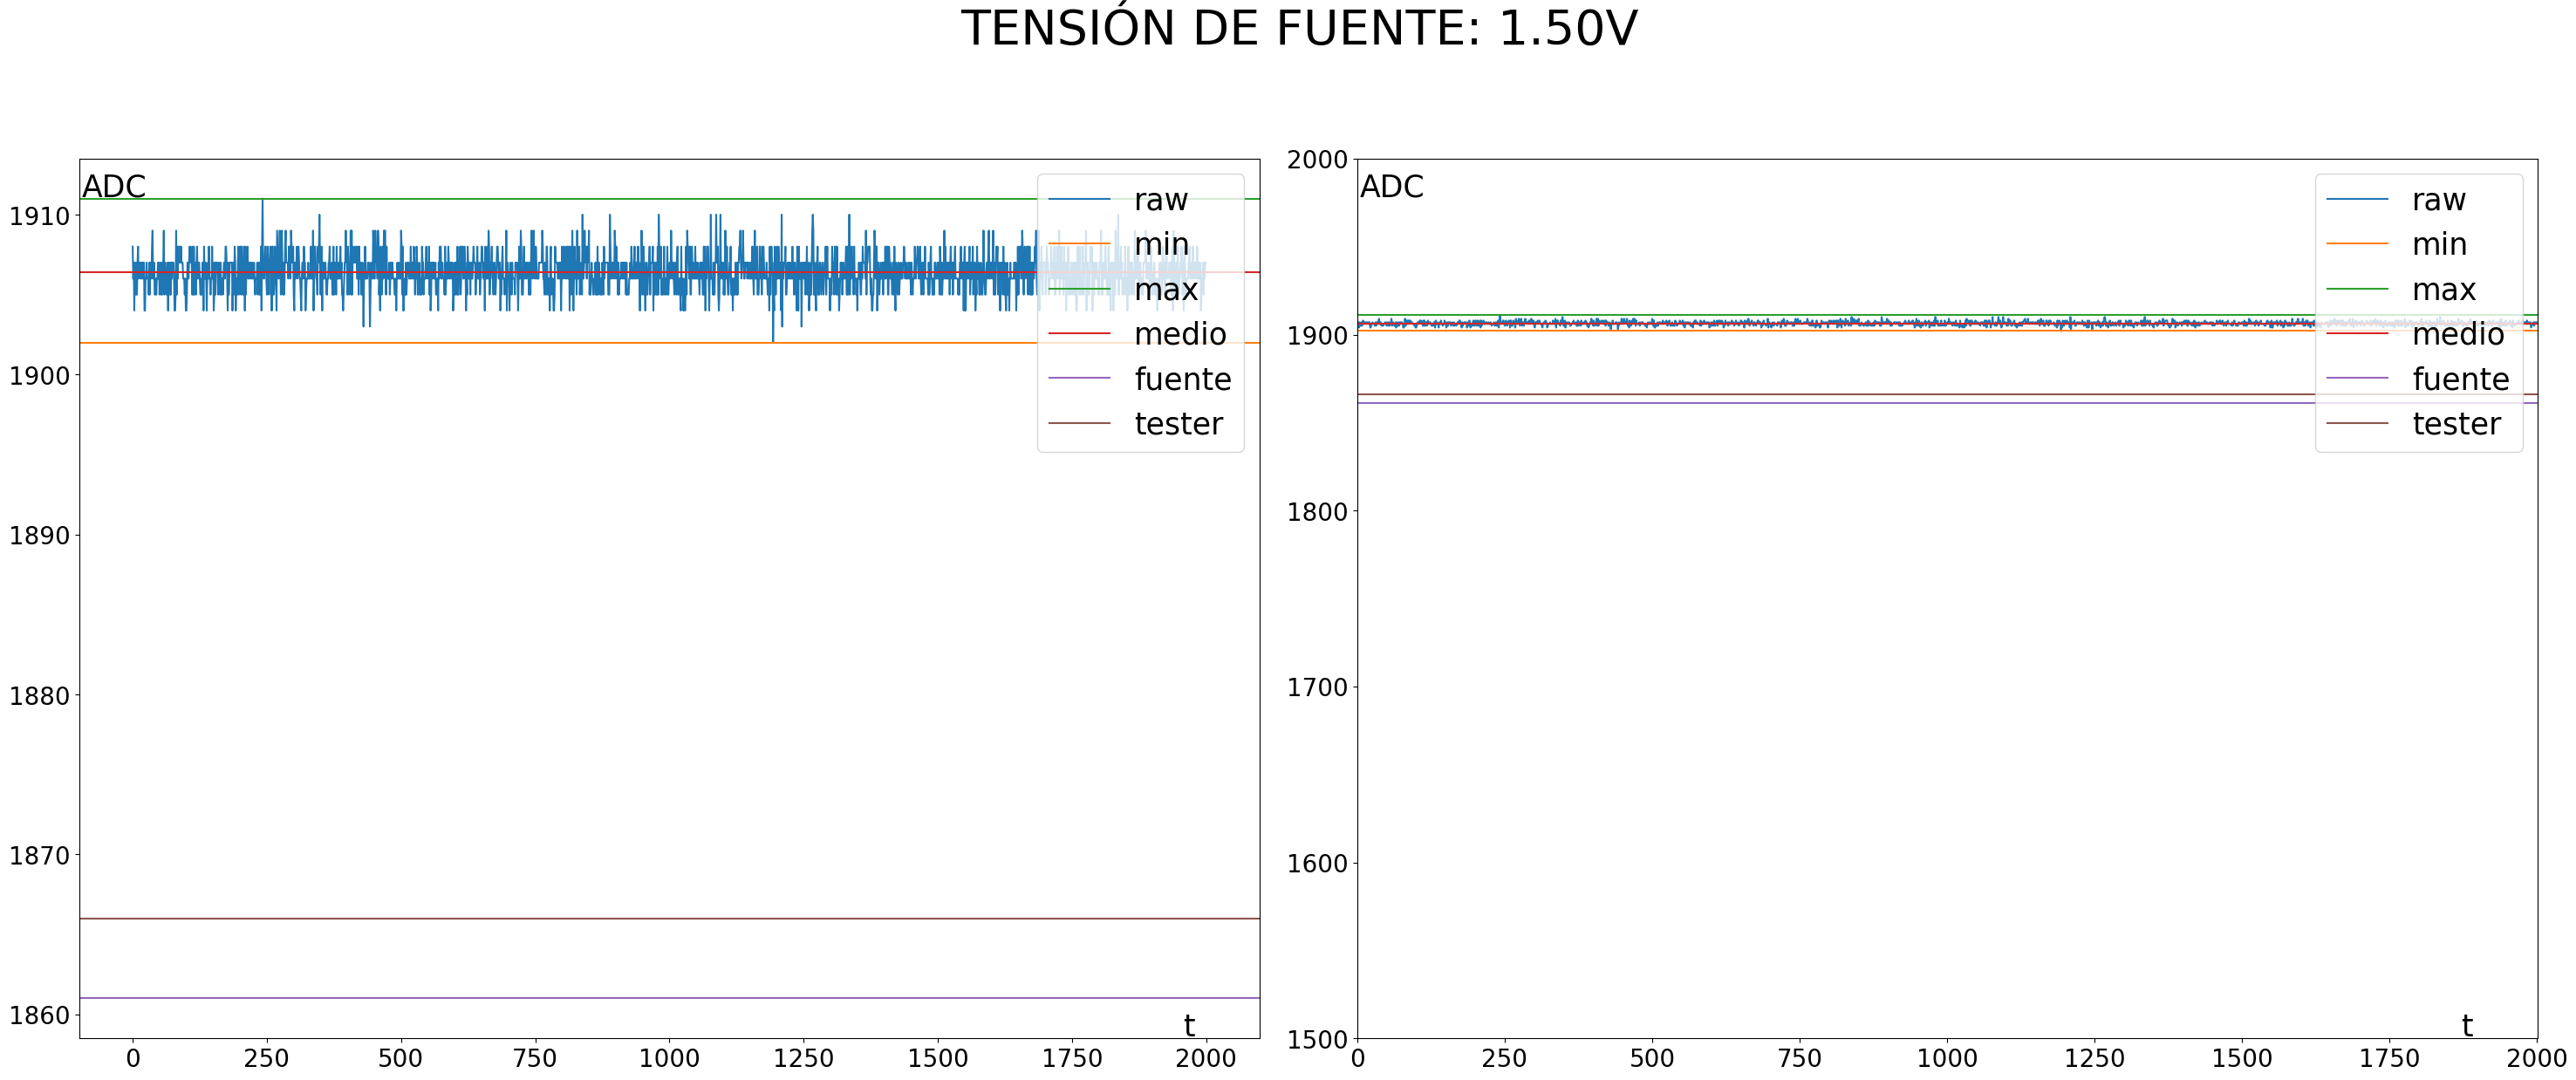

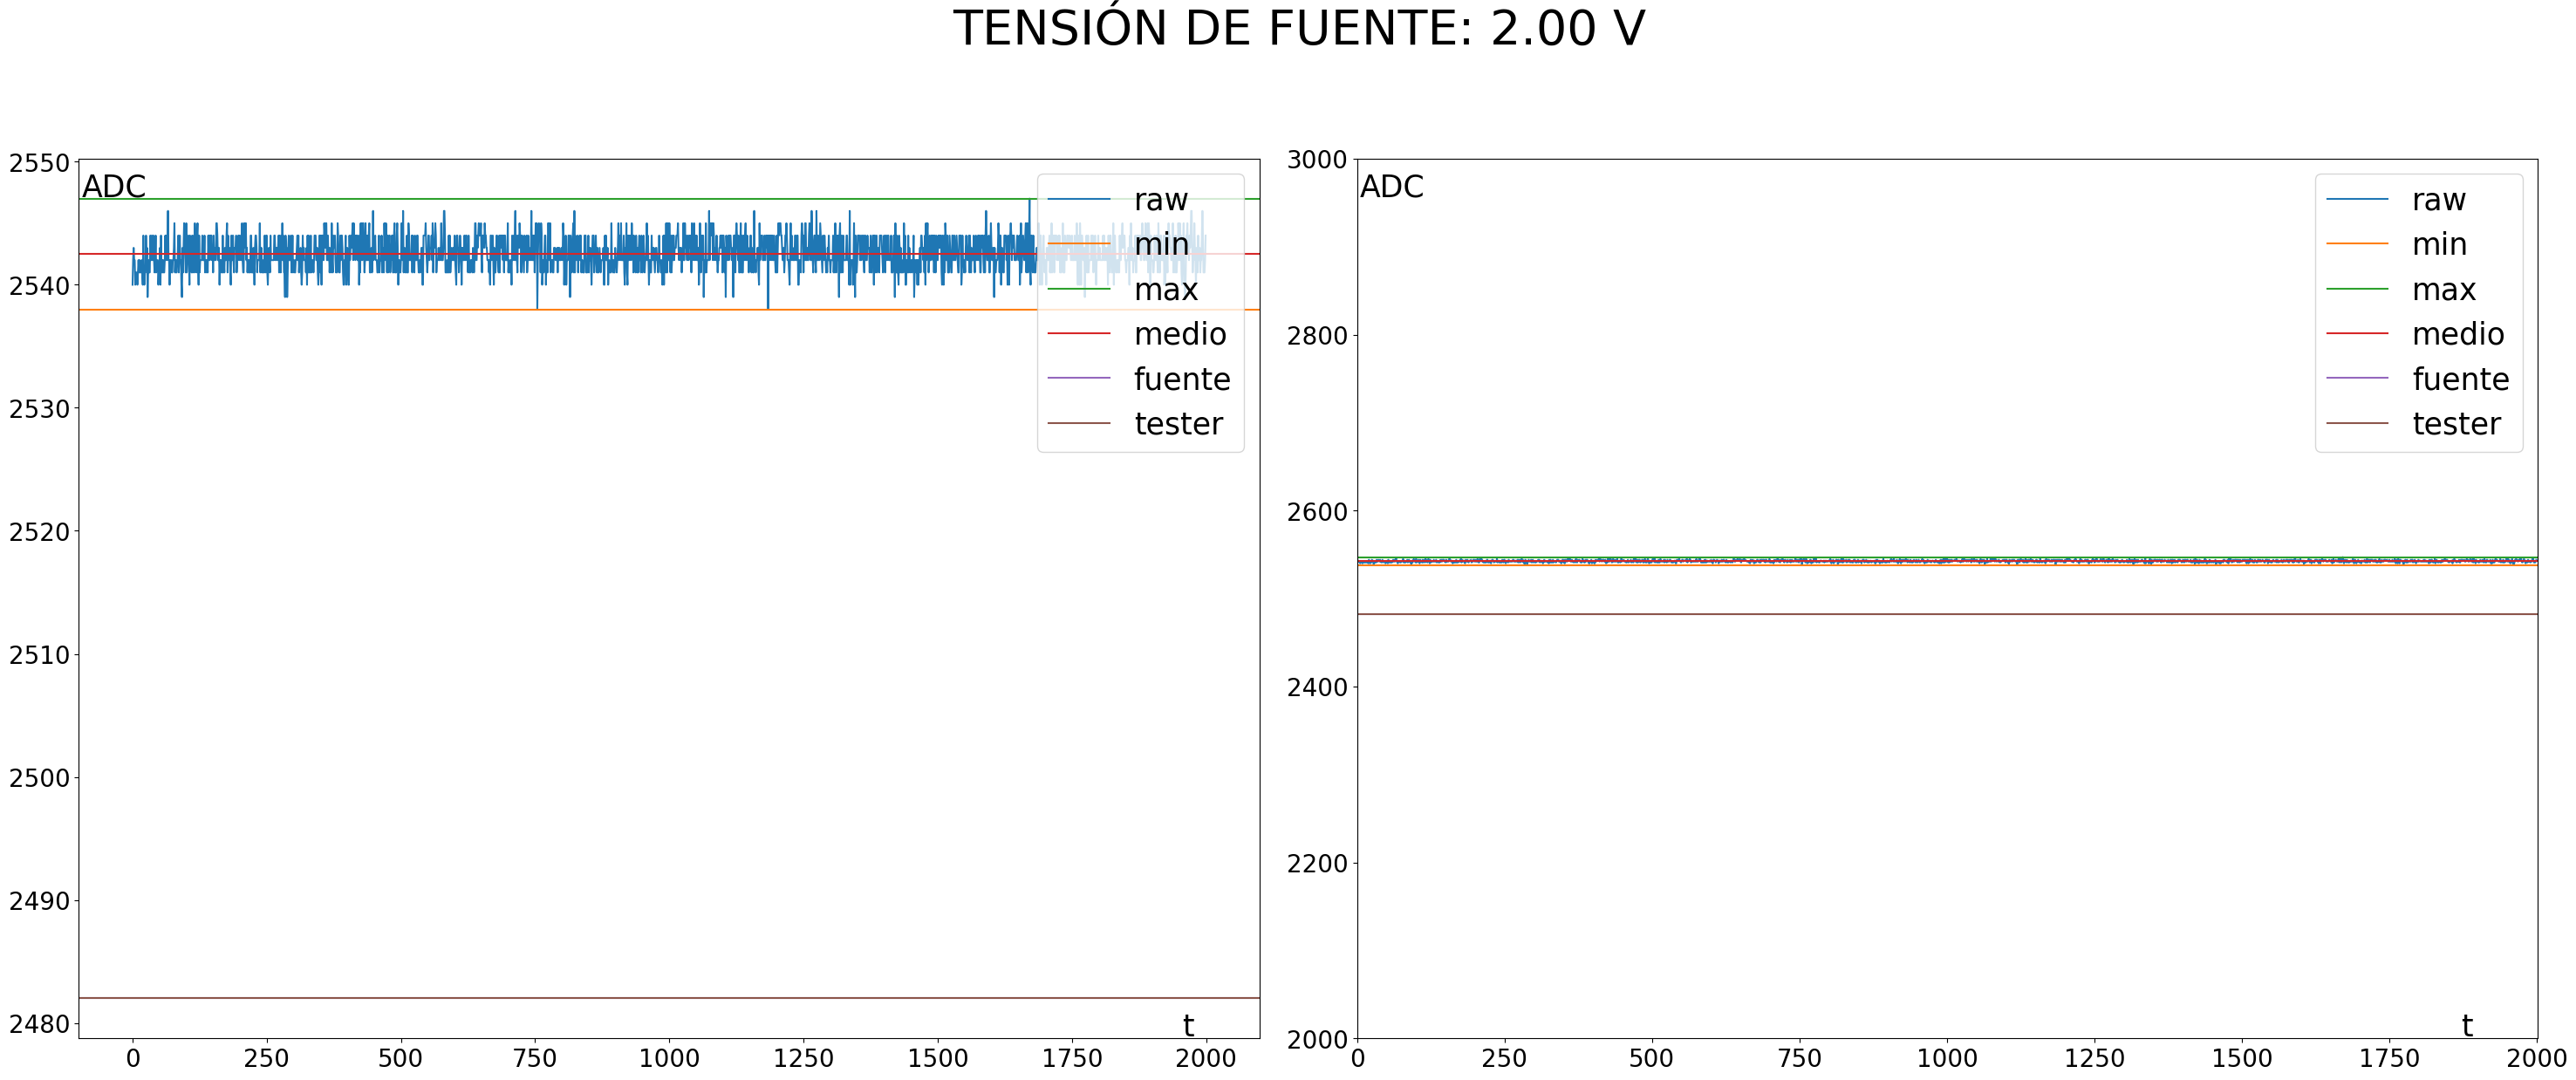

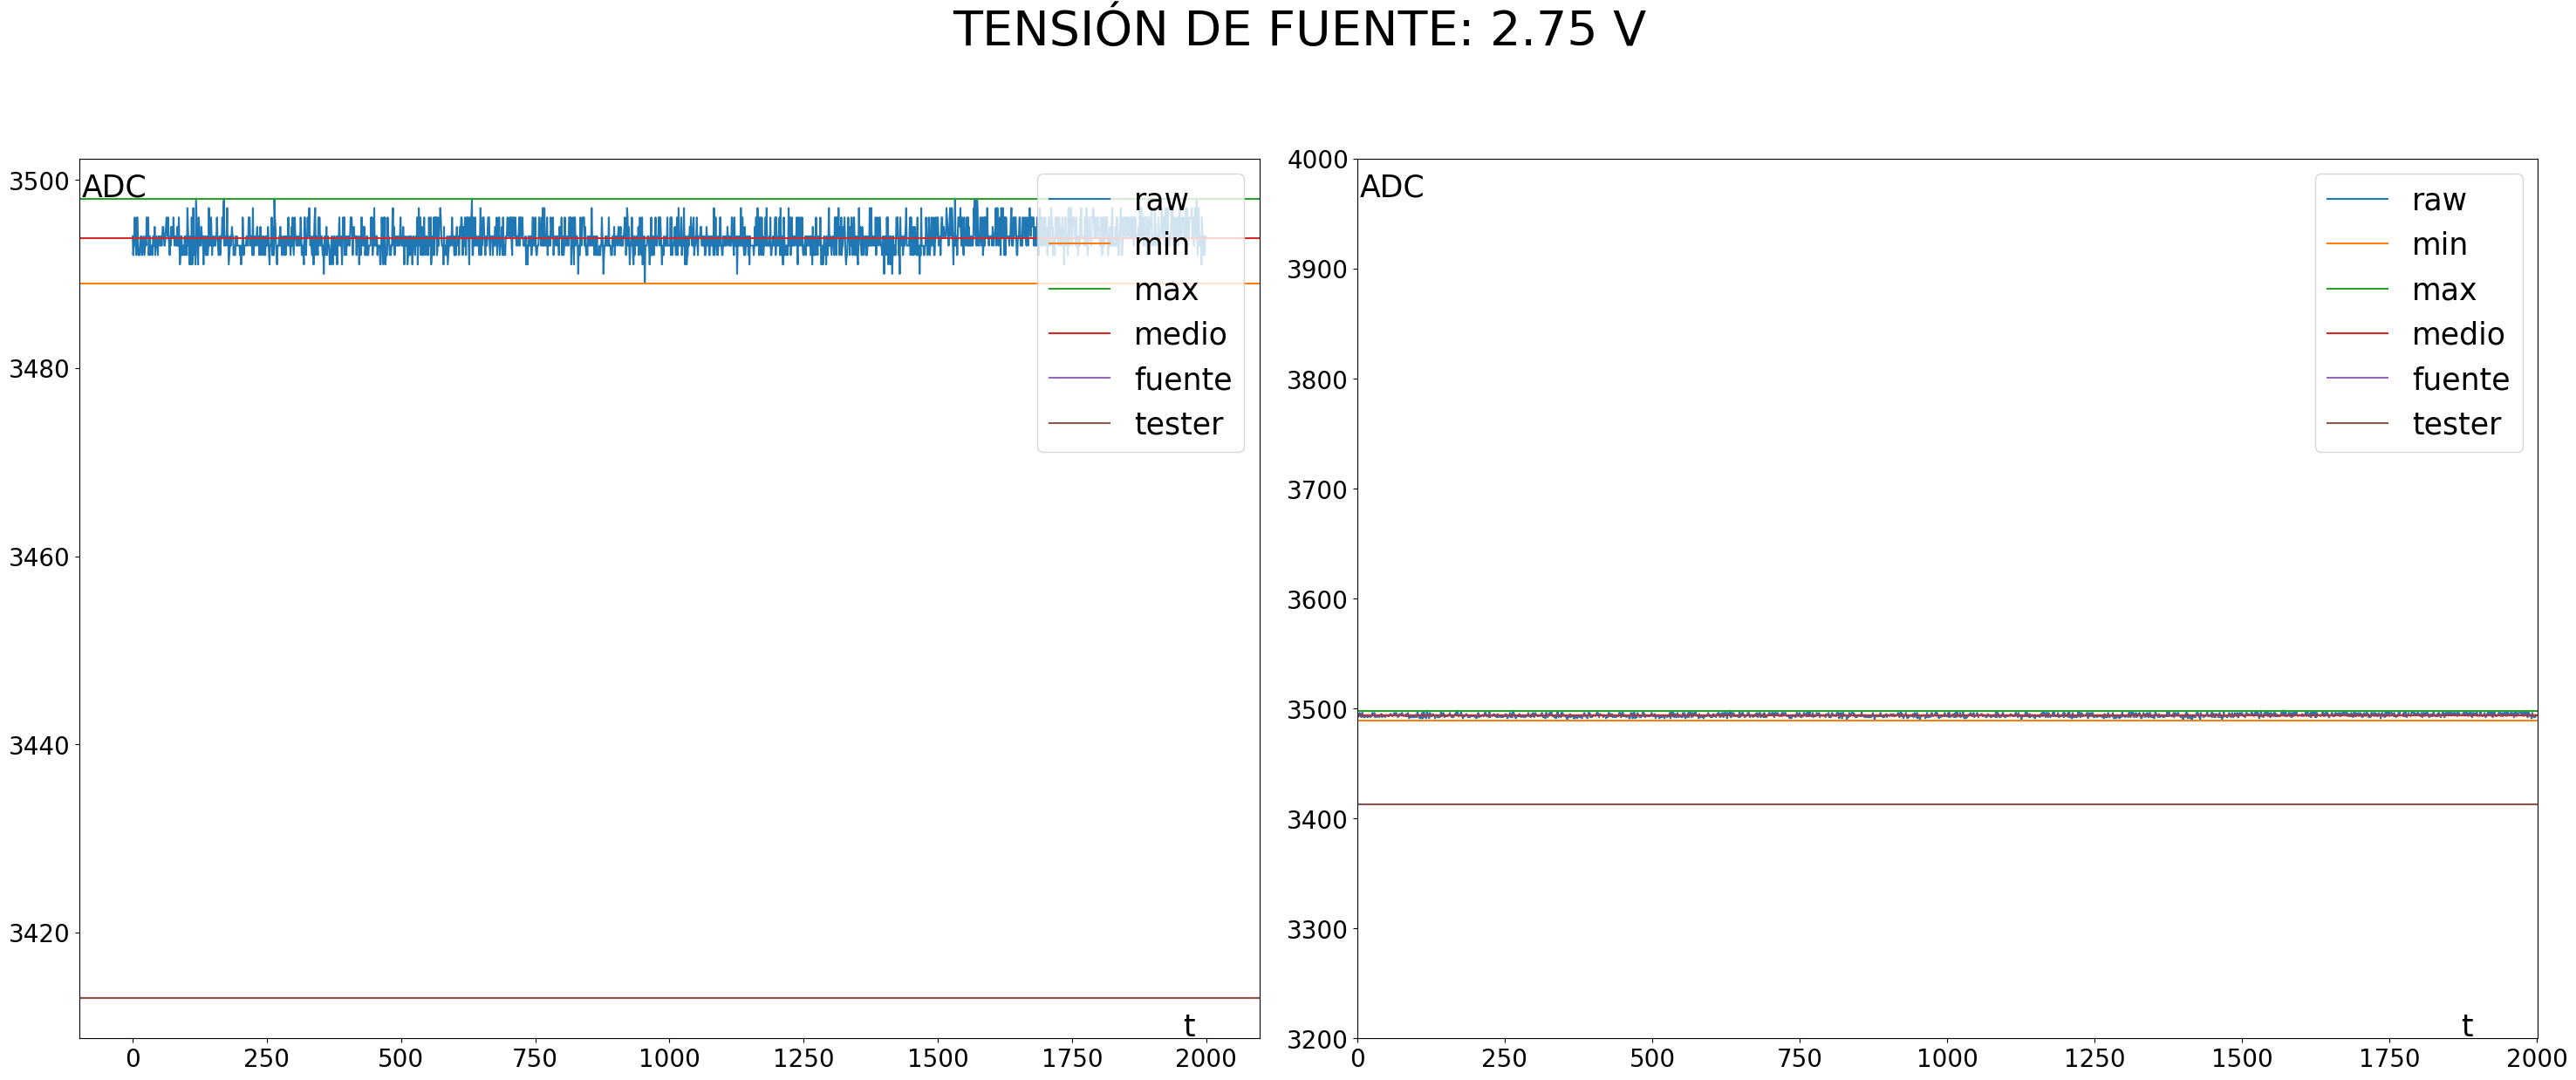

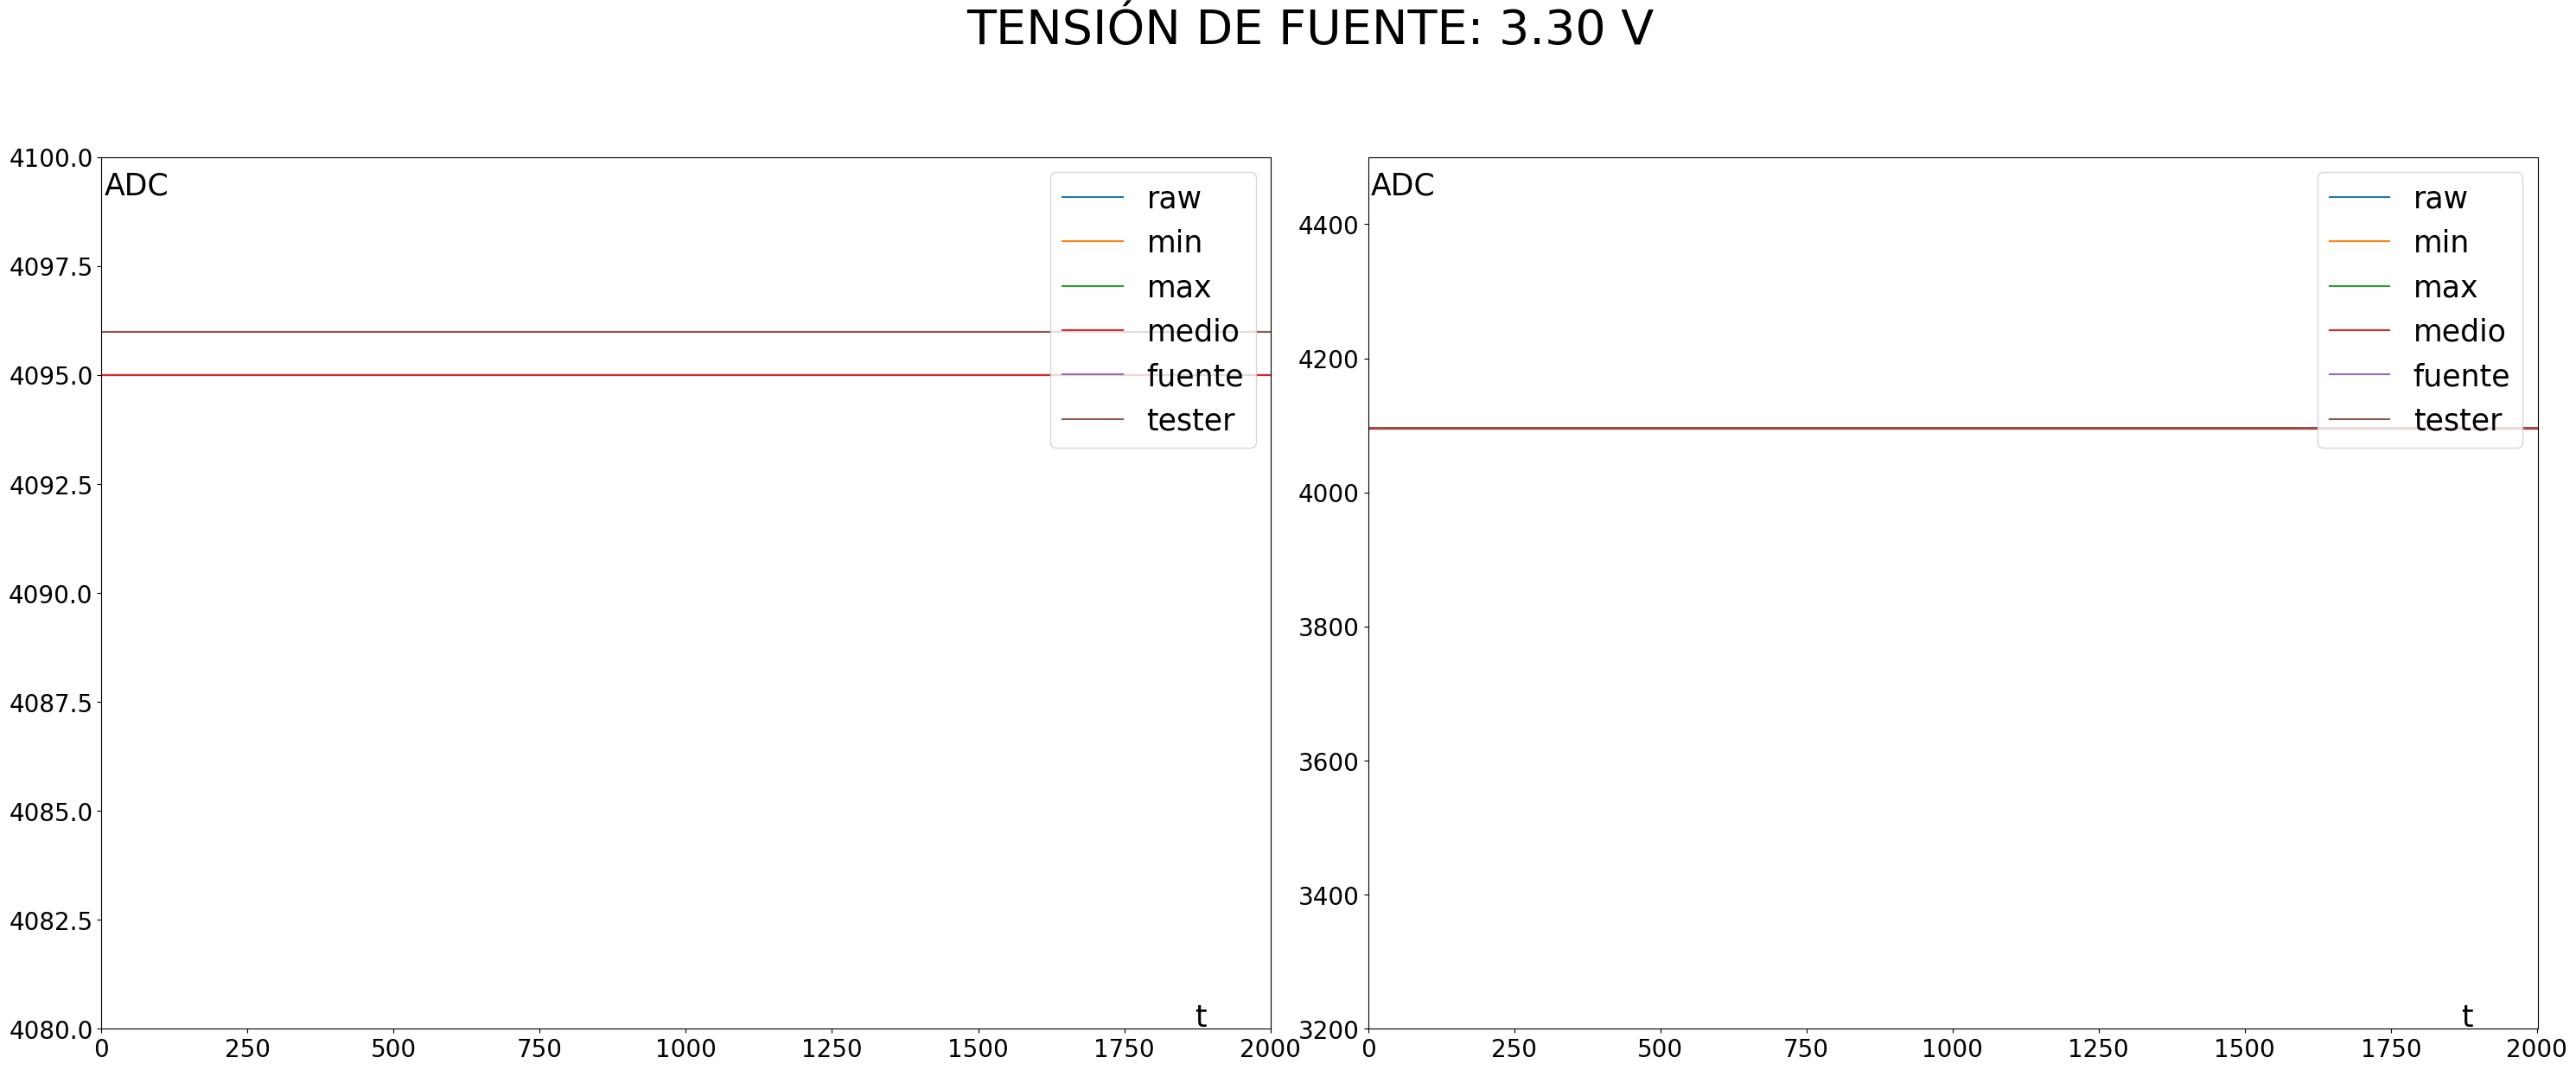

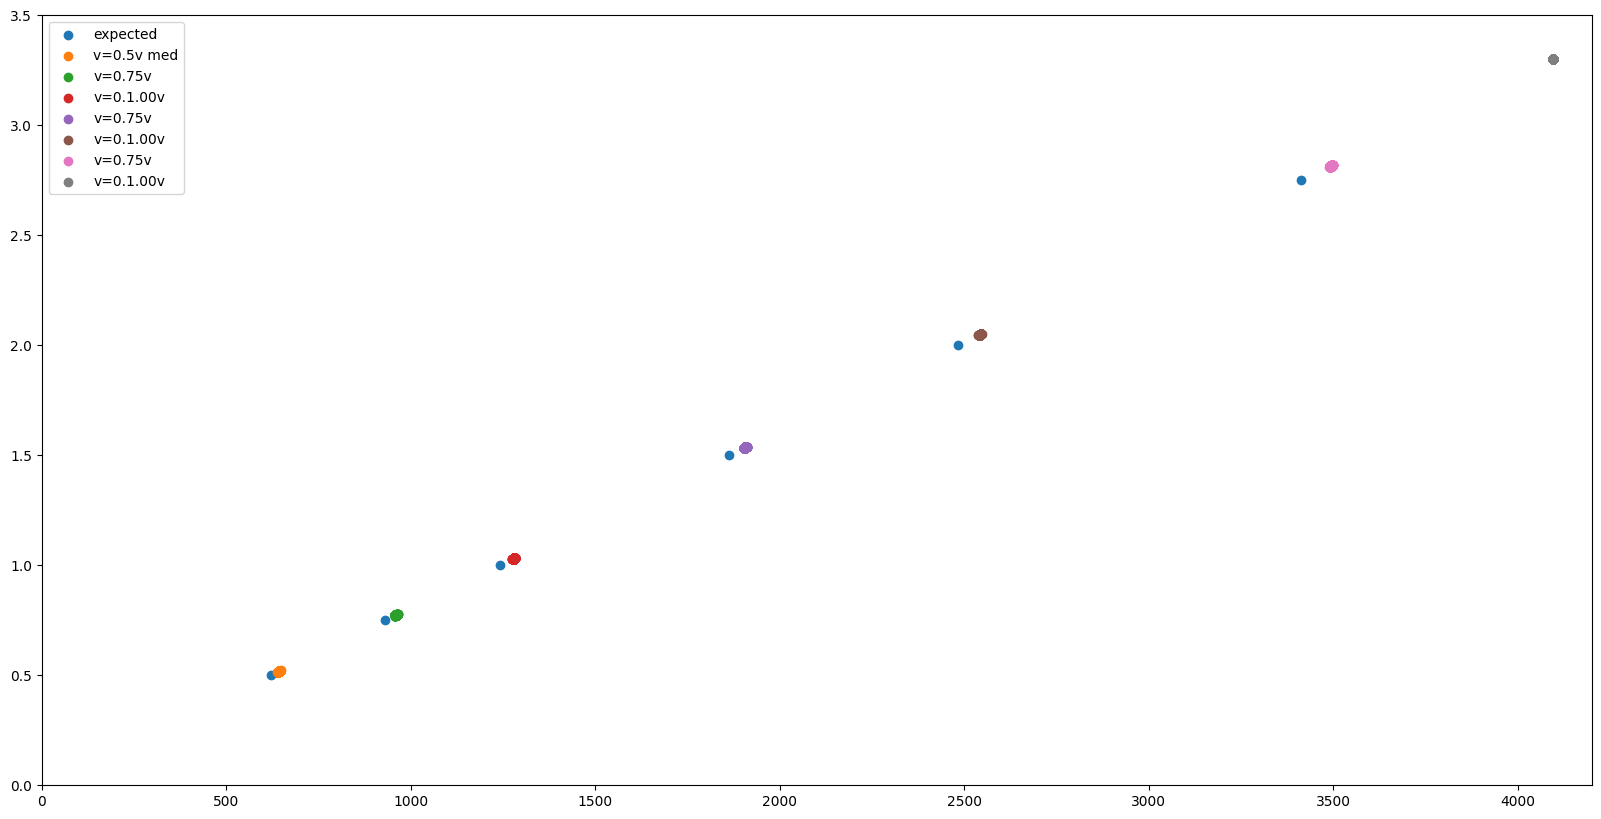

In [2]:
from IPython.display import Markdown as md
import matplotlib.pylab as plt
import numpy as np 
### 0.5v fuente - Tester 0.501v  
### 0.75 fuente - Tester 0.752v 
### 1.0  fuente - Tester 1.003v 
### 1.5  fuente - Tester 1.504v 
### 2.0  fuente - Tester 2.000v
### 2.75 fuente - Tester 2.750v
### 3.3. fuente - Tester 3.300v
## PARAMETERS OF ANALISIS ADC TEST REPORT 
path_file = '../../../results/TC-I-ADC/'
list_files_tcI=['TC-I-ADC-0.5.txt','TC-I-ADC-0.75.txt','TC-I-ADC-1.00.txt','TC-I-ADC-1.50.txt','TC-I-ADC-2.00.txt','TC-I-ADC-2.75.txt', 'TC-I-ADC-3.30.txt']
voltage_tester = [0.501,0.752,1.003,1.504,2.000,2.7500,3.300] 
voltage_source = [0.5,0.75,1.0,1.5,2.0,2.75,3.3]



NBITS = 12 
MAX_VALUE =4096 #2**12 
SOURCE_ADC_VOLTAGE = 3.30 #MEASURE OF GND
measure_data = np.zeros((2000,len(list_files_tcI)),dtype=int)
measure_data_hex = np.zeros((2000,len(list_files_tcI)),dtype=int)
v_compute_raw_adc= np.zeros((2000,len(list_files_tcI)))

### Values of compute of script 
##  Expected values compute 
## position indicate a file using a list_files_tcI
ADC_voltage_expected_tester = []
ADC_voltage_expected_source = []
ADC_mean_samples = []
ADC_max_sample = []
ADC_min_sample = [] 
n_samples_adc = np.arange(0,2000,1.0,dtype=float) # eje x para gráficas ADC 


for i in range(0,len(voltage_tester)):
    ADC_voltage_expected_tester.append(int( (MAX_VALUE/SOURCE_ADC_VOLTAGE)*voltage_tester[i]))
    ADC_voltage_expected_source.append(int(( (MAX_VALUE/SOURCE_ADC_VOLTAGE)*voltage_source[i])))
    

### PROCESSING FILES FOR EXTRACT DATA !     
i = 0 
for file in list_files_tcI:    
    d0,d1,d2 = np.genfromtxt(path_file+file, delimiter=',', dtype=None, encoding=None,unpack=True)
    d1 =np.array([int(x, 16) for x in d1])
    d2 =d2.astype(int) 
    measure_data[:,i] = d2 
    measure_data_hex[:,i] = d1 
    ADC_mean_samples.append(np.mean(d2))
    ADC_max_sample.append(np.amax(d2))
    ADC_min_sample.append(np.amin(d2))
    i = i +1 

for i in range(0,len(list_files_tcI)): 
    v_compute_raw_adc[:,i] = measure_data[:,i]*(SOURCE_ADC_VOLTAGE/MAX_VALUE)







### FIGURE CREATE AND DRAWING DATA 
######################################### SOURCE OF 0.5V  ###############################################################

fig05, ax05 = plt.subplots(nrows=1, ncols=2,figsize=(30,13))
fig05.suptitle('TENSIÓN DE FUENTE: 0.5V\n',fontsize = 40)
fig05.tight_layout(pad=5.0)
l1=ax05[0].plot(n_samples_adc, measure_data[:,0],label='raw',color='#1f77b4')
l2=ax05[0].axhline(y=ADC_min_sample[0],label='min',color= '#ff7f0e')
l3=ax05[0].axhline(y=ADC_max_sample[0],label='max',color='#2ca02c')
l4=ax05[0].axhline(y=ADC_mean_samples[0],label='medio',color ='#d62728')
l5=ax05[0].axhline(y=ADC_voltage_expected_source[0],label='fuente',color = '#9467bd')
l6= ax05[0].axhline(y=ADC_voltage_expected_tester[0],label='tester',color= '#8c564b')
ax05[0].legend(loc='upper right',fontsize=25)
ax05[0].set_xlabel('t',fontsize = 25) 
ax05[0].set_ylabel('ADC', rotation = 0,fontsize =25) 
ax05[0].tick_params(axis='both', which='major', labelsize=20)
ax05[0].xaxis.set_label_coords(0.94,0.03)
ax05[0].yaxis.set_label_coords(0.03,0.95)
l1=ax05[1].plot(n_samples_adc, measure_data[:,0],label='raw',color='#1f77b4')
l2=ax05[1].axhline(y=ADC_min_sample[0],label='min',color= '#ff7f0e')
l3=ax05[1].axhline(y=ADC_max_sample[0],label='max',color='#2ca02c')
l4=ax05[1].axhline(y=ADC_mean_samples[0],label='medio',color='#d62728')
l5=ax05[1].axhline(y=ADC_voltage_expected_source[0],label='fuente',color = '#9467bd')
l6= ax05[1].axhline(y=ADC_voltage_expected_tester[0],label='tester',color = '#8c564b')
ax05[1].legend(loc='upper right',fontsize=25)                         
ax05[1].tick_params(axis='both', which='major',labelsize=20) 
ax05[1].set_xlabel('t',fontsize = 25) 
ax05[1].set_ylabel('ADC', rotation = 0,fontsize = 25 ) 
ax05[1].set_xlim([0,2001]) 
ax05[1].set_ylim([0,800]) 
ax05[1].xaxis.set_label_coords(0.94,0.03)
ax05[1].yaxis.set_label_coords(0.03,0.95)
fig05.savefig(path_file+'TC-I-ADC-0.5.jpg') 
######################################### END SOURCE OF 0.5V  ###############################################################

#########################################  SOURCE OF 0.75V  ###############################################################
fig075, ax075 = plt.subplots(nrows=1, ncols=2,figsize=(30,13))
fig075.suptitle('TENSIÓN DE FUENTE: 0.75V\n',fontsize = 40)
fig075.tight_layout(pad=5.0)
l1=ax075[0].plot(n_samples_adc, measure_data[:,1],label='raw',color='#1f77b4')
l2=ax075[0].axhline(y=ADC_min_sample[1],label='min',color= '#ff7f0e')
l3=ax075[0].axhline(y=ADC_max_sample[1],label='max',color='#2ca02c')
l4=ax075[0].axhline(y=ADC_mean_samples[1],label='medio',color ='#d62728')
l5=ax075[0].axhline(y=ADC_voltage_expected_source[1],label='fuente',color = '#9467bd')
l6= ax075[0].axhline(y=ADC_voltage_expected_tester[1],label='tester',color= '#8c564b')
ax075[0].legend(loc='upper right',fontsize=25)
ax075[0].set_xlabel('t',fontsize = 25) 
ax075[0].set_ylabel('ADC', rotation = 0,fontsize =25) 
ax075[0].tick_params(axis='both', which='major', labelsize=20)
ax075[0].xaxis.set_label_coords(0.94,0.03)
ax075[0].yaxis.set_label_coords(0.03,0.95)
l1=ax075[1].plot(n_samples_adc, measure_data[:,1],label='raw',color='#1f77b4')
l2=ax075[1].axhline(y=ADC_min_sample[1],label='min',color= '#ff7f0e')
l3=ax075[1].axhline(y=ADC_max_sample[1],label='max',color='#2ca02c')
l4=ax075[1].axhline(y=ADC_mean_samples[1],label='medio',color='#d62728')
l5=ax075[1].axhline(y=ADC_voltage_expected_source[1],label='fuente',color = '#9467bd')
l6= ax075[1].axhline(y=ADC_voltage_expected_tester[1],label='tester',color = '#8c564b')
ax075[1].legend(loc='upper right',fontsize=25)                         
ax075[1].tick_params(axis='both', which='major',labelsize=20) 
ax075[1].set_xlabel('t',fontsize = 25) 
ax075[1].set_ylabel('ADC', rotation = 0,fontsize = 25 ) 
ax075[1].set_xlim([0,2001]) 
ax075[1].set_ylim([500,1500]) 
ax075[1].xaxis.set_label_coords(0.94,0.03)
ax075[1].yaxis.set_label_coords(0.03,0.95)
fig075.savefig(path_file+'TC-I-ADC-0.75.png',bbox_inches="tight") 
######################################### END SOURCE OF 0.75V  ###############################################################



#########################################  SOURCE OF 1.00V  ###############################################################
fig100, ax100 = plt.subplots(nrows=1, ncols=2,figsize=(30,13))
fig100.suptitle('TENSIÓN DE FUENTE: 1.00V',fontsize = 40)
fig100.tight_layout(pad=5.0)
l1=ax100[0].plot(n_samples_adc, measure_data[:,2],label='raw',color='#1f77b4')
l2=ax100[0].axhline(y=ADC_min_sample[2],label='min',color= '#ff7f0e')
l3=ax100[0].axhline(y=ADC_max_sample[2],label='max',color='#2ca02c')
l4=ax100[0].axhline(y=ADC_mean_samples[2],label='medio',color ='#d62728')
l5=ax100[0].axhline(y=ADC_voltage_expected_source[2],label='fuente',color = '#9467bd')
l6= ax100[0].axhline(y=ADC_voltage_expected_tester[2],label='tester',color= '#8c564b')
ax100[0].legend(loc='upper right',fontsize=25)
ax100[0].set_xlabel('t',fontsize = 25) 
ax100[0].set_ylabel('ADC', rotation = 0,fontsize =25) 
ax100[0].tick_params(axis='both', which='major', labelsize=20)
ax100[0].xaxis.set_label_coords(0.94,0.03)
ax100[0].yaxis.set_label_coords(0.03,0.95)
l1=ax100[1].plot(n_samples_adc, measure_data[:,2],label='raw',color='#1f77b4')
l2=ax100[1].axhline(y=ADC_min_sample[2],label='min',color= '#ff7f0e')
l3=ax100[1].axhline(y=ADC_max_sample[2],label='max',color='#2ca02c')
l4=ax100[1].axhline(y=ADC_mean_samples[2],label='medio',color='#d62728')
l5=ax100[1].axhline(y=ADC_voltage_expected_source[2],label='fuente',color = '#9467bd')
l6= ax100[1].axhline(y=ADC_voltage_expected_tester[2],label='tester',color = '#8c564b')
ax100[1].legend(loc='upper right',fontsize=25)                         
ax100[1].tick_params(axis='both', which='major',labelsize=20) 
ax100[1].set_xlabel('t',fontsize = 25) 
ax100[1].set_ylabel('ADC', rotation = 0,fontsize = 25 ) 
ax100[1].set_xlim([0,2001]) 
ax100[1].set_ylim([900,1500]) 
ax100[1].xaxis.set_label_coords(0.94,0.03)
ax100[1].yaxis.set_label_coords(0.03,0.95)
fig100.savefig(path_file+'TC-I-ADC-100.png',bbox_inches="tight") 
######################################### END SOURCE OF 1.00V  ###############################################################

######################################### SOURCE OF 1.50V  ###############################################################
fig150, ax150 = plt.subplots(nrows=1, ncols=2,figsize=(30,13))
fig150.suptitle('TENSIÓN DE FUENTE: 1.50V',fontsize = 40)
fig150.tight_layout(pad=5.0)
l1=ax150[0].plot(n_samples_adc, measure_data[:,3],label='raw',color='#1f77b4')
l2=ax150[0].axhline(y=ADC_min_sample[3],label='min',color= '#ff7f0e')
l3=ax150[0].axhline(y=ADC_max_sample[3],label='max',color='#2ca02c')
l4=ax150[0].axhline(y=ADC_mean_samples[3],label='medio',color ='#d62728')
l5=ax150[0].axhline(y=ADC_voltage_expected_source[3],label='fuente',color = '#9467bd')
l6= ax150[0].axhline(y=ADC_voltage_expected_tester[3],label='tester',color= '#8c564b')
ax150[0].legend(loc='upper right',fontsize=25)
ax150[0].set_xlabel('t',fontsize = 25) 
ax150[0].set_ylabel('ADC', rotation = 0,fontsize =25) 
ax150[0].tick_params(axis='both', which='major', labelsize=20)
ax150[0].xaxis.set_label_coords(0.94,0.03)
ax150[0].yaxis.set_label_coords(0.03,0.95)
l1=ax150[1].plot(n_samples_adc, measure_data[:,3],label='raw',color='#1f77b4')
l2=ax150[1].axhline(y=ADC_min_sample[3],label='min',color= '#ff7f0e')
l3=ax150[1].axhline(y=ADC_max_sample[3],label='max',color='#2ca02c')
l4=ax150[1].axhline(y=ADC_mean_samples[3],label='medio',color='#d62728')
l5=ax150[1].axhline(y=ADC_voltage_expected_source[3],label='fuente',color = '#9467bd')
l6= ax150[1].axhline(y=ADC_voltage_expected_tester[3],label='tester',color = '#8c564b')
ax150[1].legend(loc='upper right',fontsize=25)                         
ax150[1].tick_params(axis='both', which='major',labelsize=20) 
ax150[1].set_xlabel('t',fontsize = 25) 
ax150[1].set_ylabel('ADC', rotation = 0,fontsize = 25 ) 
ax150[1].set_xlim([0,2001]) 
ax150[1].set_ylim([1500,2000]) 
ax150[1].xaxis.set_label_coords(0.94,0.03)
ax150[1].yaxis.set_label_coords(0.03,0.95)
fig150.savefig(path_file+'TC-I-ADC-1.50.png',bbox_inches="tight") 
######################################### END SOURCE OF 1.50V  ###############################################################

######################################### SOURCE OF 2.00V  ###############################################################
#index 4 
fig200, ax200 = plt.subplots(nrows=1, ncols=2,figsize=(30,13))
fig200.suptitle('TENSIÓN DE FUENTE: 2.00 V',fontsize = 40)
fig200.tight_layout(pad=5.0)
l1=ax200[0].plot(n_samples_adc, measure_data[:,4],label='raw',color='#1f77b4')
l2=ax200[0].axhline(y=ADC_min_sample[4],label='min',color= '#ff7f0e')
l3=ax200[0].axhline(y=ADC_max_sample[4],label='max',color='#2ca02c')
l4=ax200[0].axhline(y=ADC_mean_samples[4],label='medio',color ='#d62728')
l5=ax200[0].axhline(y=ADC_voltage_expected_source[4],label='fuente',color = '#9467bd')
l6= ax200[0].axhline(y=ADC_voltage_expected_tester[4],label='tester',color= '#8c564b')
ax200[0].legend(loc='upper right',fontsize=25)
ax200[0].set_xlabel('t',fontsize = 25) 
ax200[0].set_ylabel('ADC', rotation = 0,fontsize =25) 
ax200[0].tick_params(axis='both', which='major', labelsize=20)
ax200[0].xaxis.set_label_coords(0.94,0.03)
ax200[0].yaxis.set_label_coords(0.03,0.95)
l1=ax200[1].plot(n_samples_adc, measure_data[:,4],label='raw',color='#1f77b4')
l2=ax200[1].axhline(y=ADC_min_sample[4],label='min',color= '#ff7f0e')
l3=ax200[1].axhline(y=ADC_max_sample[4],label='max',color='#2ca02c')
l4=ax200[1].axhline(y=ADC_mean_samples[4],label='medio',color='#d62728')
l5=ax200[1].axhline(y=ADC_voltage_expected_source[4],label='fuente',color = '#9467bd')
l6= ax200[1].axhline(y=ADC_voltage_expected_tester[4],label='tester',color = '#8c564b')
ax200[1].legend(loc='upper right',fontsize=25)                         
ax200[1].tick_params(axis='both', which='major',labelsize=20) 
ax200[1].set_xlabel('t',fontsize = 25) 
ax200[1].set_ylabel('ADC', rotation = 0,fontsize = 25 ) 
ax200[1].set_xlim([0,2001]) 
ax200[1].set_ylim([2000,3000]) 
ax200[1].xaxis.set_label_coords(0.94,0.03)
ax200[1].yaxis.set_label_coords(0.03,0.95)
fig200.savefig(path_file+'TC-I-ADC-2.00.png',bbox_inches="tight") 

######################################### END SOURCE OF 2.00V  ###############################################################

######################################### SOURCE OF 2.75V  ###############################################################
#index 5
fig275, ax275 = plt.subplots(nrows=1, ncols=2,figsize=(30,13))
fig275.suptitle('TENSIÓN DE FUENTE: 2.75 V',fontsize = 40)
fig275.tight_layout(pad=5.0)
l1=ax275[0].plot(n_samples_adc, measure_data[:,5],label='raw',color='#1f77b4')
l2=ax275[0].axhline(y=ADC_min_sample[5],label='min',color= '#ff7f0e')
l3=ax275[0].axhline(y=ADC_max_sample[5],label='max',color='#2ca02c')
l4=ax275[0].axhline(y=ADC_mean_samples[5],label='medio',color ='#d62728')
l5=ax275[0].axhline(y=ADC_voltage_expected_source[5],label='fuente',color = '#9467bd')
l6=ax275[0].axhline(y=ADC_voltage_expected_tester[5],label='tester',color= '#8c564b')
ax275[0].legend(loc='upper right',fontsize=25)
ax275[0].set_xlabel('t',fontsize = 25) 
ax275[0].set_ylabel('ADC', rotation = 0,fontsize =25) 
ax275[0].tick_params(axis='both', which='major', labelsize=20)
ax275[0].xaxis.set_label_coords(0.94,0.03)
ax275[0].yaxis.set_label_coords(0.03,0.95)
l1=ax275[1].plot(n_samples_adc, measure_data[:,5],label='raw',color='#1f77b4')
l2=ax275[1].axhline(y=ADC_min_sample[5],label='min',color= '#ff7f0e')
l3=ax275[1].axhline(y=ADC_max_sample[5],label='max',color='#2ca02c')
l4=ax275[1].axhline(y=ADC_mean_samples[5],label='medio',color='#d62728')
l5=ax275[1].axhline(y=ADC_voltage_expected_source[5],label='fuente',color = '#9467bd')
l6= ax275[1].axhline(y=ADC_voltage_expected_tester[5],label='tester',color = '#8c564b')
ax275[1].legend(loc='upper right',fontsize=25)                         
ax275[1].tick_params(axis='both', which='major',labelsize=20) 
ax275[1].set_xlabel('t',fontsize = 25) 
ax275[1].set_ylabel('ADC', rotation = 0,fontsize = 25 ) 
ax275[1].set_xlim([0,2001]) 
ax275[1].set_ylim([3200,4000]) 
ax275[1].xaxis.set_label_coords(0.94,0.03)
ax275[1].yaxis.set_label_coords(0.03,0.95)
fig275.savefig(path_file+'TC-I-ADC-2.75.png',bbox_inches="tight") 


######################################### END SOURCE OF 2.00V  ###############################################################



######################################### SOURCE OF 3.30V  ###############################################################
#index 6
fig330, ax330 = plt.subplots(nrows=1, ncols=2,figsize=(30,13))
fig330.suptitle('TENSIÓN DE FUENTE: 3.30 V',fontsize = 40)
fig330.tight_layout(pad=5.0)
l1=ax330[0].plot(n_samples_adc, measure_data[:,6],label='raw',color='#1f77b4')
l2=ax330[0].axhline(y=ADC_min_sample[6],label='min',color= '#ff7f0e')
l3=ax330[0].axhline(y=ADC_max_sample[6],label='max',color='#2ca02c')
l4=ax330[0].axhline(y=ADC_mean_samples[6],label='medio',color ='#d62728')
l5=ax330[0].axhline(y=ADC_voltage_expected_source[6],label='fuente',color = '#9467bd')
l6= ax330[0].axhline(y=ADC_voltage_expected_tester[6],label='tester',color= '#8c564b')
ax330[0].legend(loc='upper right',fontsize=25)
ax330[0].set_xlabel('t',fontsize = 25) 
ax330[0].set_ylabel('ADC', rotation = 0,fontsize =25) 
ax330[0].tick_params(axis='both', which='major', labelsize=20)
ax330[0].xaxis.set_label_coords(0.94,0.03)
ax330[0].yaxis.set_label_coords(0.03,0.95)
ax330[0].set_xlim([0,2001]) 
ax330[0].set_ylim([4080,4100]) 

l1=ax330[1].plot(n_samples_adc, measure_data[:,6],label='raw',color='#1f77b4')
l2=ax330[1].axhline(y=ADC_min_sample[6],label='min',color= '#ff7f0e')
l3=ax330[1].axhline(y=ADC_max_sample[6],label='max',color='#2ca02c')
l4=ax330[1].axhline(y=ADC_mean_samples[6],label='medio',color='#d62728')
l5=ax330[1].axhline(y=ADC_voltage_expected_source[6],label='fuente',color = '#9467bd')
l6= ax330[1].axhline(y=ADC_voltage_expected_tester[6],label='tester',color = '#8c564b')
ax330[1].legend(loc='upper right',fontsize=25)                         
ax330[1].tick_params(axis='both', which='major',labelsize=20) 
ax330[1].set_xlabel('t',fontsize = 25) 
ax330[1].set_ylabel('ADC', rotation = 0,fontsize = 25 ) 
ax330[1].set_xlim([0,2001]) 
ax330[1].set_ylim([3200,4500]) 
ax330[1].xaxis.set_label_coords(0.94,0.03)
ax330[1].yaxis.set_label_coords(0.03,0.95)
fig330.savefig(path_file+'TC-I-ADC-2.00.png',bbox_inches="tight") 


######################################### END SOURCE OF 3.30V  ###############################################################


######################################### COMPARE VOLTAGE   ###############################################################
figVolt, ax = plt.subplots(figsize=(20,10))
ax.set_xlim([0,4200]) 
ax.set_ylim([0,3.5]) 
ax.scatter(ADC_voltage_expected_source,voltage_source,label='expected',color='#1f77b4')
ax.scatter(measure_data[:,0],v_compute_raw_adc[:,0],label='v=0.5v med',color='#ff7f0e')
ax.scatter(measure_data[:,1],v_compute_raw_adc[:,1],label='v=0.75v',color='#2ca02c')
ax.scatter(measure_data[:,2],v_compute_raw_adc[:,2],label='v=0.1.00v',color='#d62728')
ax.scatter(measure_data[:,3],v_compute_raw_adc[:,3],label='v=0.75v',color='#9467bd')
ax.scatter(measure_data[:,4],v_compute_raw_adc[:,4],label='v=0.1.00v',color= '#8c564b')
ax.scatter(measure_data[:,5],v_compute_raw_adc[:,5],label='v=0.75v',color='#e377c2')
ax.scatter(measure_data[:,6],v_compute_raw_adc[:,6],label='v=0.1.00v',color='#7f7f7f')
ax.legend()





In [3]:
from IPython.display import HTML
#ADC_voltage_expected_tester = []
#ADC_voltage_expected_source = []
#ADC_mean_samples = []
#ADC_max_sample = []
#ADC_min_sample = [] 
error_relativo =  np.array(ADC_voltage_expected_source)-np.array(ADC_mean_samples)
deltamax =  np.array(ADC_max_sample) - np.array(ADC_min_sample)
linea1 = ('%',
          f'{ADC_voltage_expected_source[0]}/{hex(ADC_voltage_expected_source[0])}',
          f'{int(ADC_mean_samples[0])}/{hex(int(ADC_mean_samples[0]))}',
          int(error_relativo[0]),
          (error_relativo[0]/abs(ADC_voltage_expected_source[0]))*100 ,
          ADC_min_sample[0],
          ADC_max_sample[0],
          deltamax[0])
linea2 = (f'{ADC_voltage_expected_source[1]}/{hex(ADC_voltage_expected_source[1])}',
          f'{int(ADC_mean_samples[1])}/{hex(int(ADC_mean_samples[1]))}',
          int(error_relativo[1]),
           (error_relativo[1]/abs(ADC_voltage_expected_source[1]))*100 ,
           ADC_min_sample[1],
           ADC_max_sample[1],
           deltamax[1] )
linea3 = (f'{ADC_voltage_expected_source[2]}/{hex(ADC_voltage_expected_source[2])}',
          f'{int(ADC_mean_samples[2])}/{hex(int(ADC_mean_samples[2]))}',
          int(error_relativo[2]),          
          (error_relativo[2]/abs(ADC_voltage_expected_source[2]))*100 ,
           ADC_min_sample[2],
           ADC_max_sample[2],
           deltamax[2] )


linea4 = (f'{ADC_voltage_expected_source[3]}/{hex(ADC_voltage_expected_source[3])}',
          f'{int(ADC_mean_samples[3])}/{hex(int(ADC_mean_samples[3]))}',
          int(error_relativo[3]),         
          (error_relativo[3]/abs(ADC_voltage_expected_source[3]))*100 ,
          ADC_min_sample[3],
          ADC_max_sample[3],
          deltamax[3] )


linea5 = (f'{ADC_voltage_expected_source[4]}/{hex(ADC_voltage_expected_source[4])}',
          f'{int(ADC_mean_samples[4])}/{hex(int(ADC_mean_samples[4]))}',
          int(error_relativo[4]),        
          (error_relativo[4]/abs(ADC_voltage_expected_source[4]))*100 ,
          ADC_min_sample[4],
          ADC_max_sample[4],
          deltamax[4] )

linea6 = (f'{ADC_voltage_expected_source[5]}/{hex(ADC_voltage_expected_source[5])}',
          f'{int(ADC_mean_samples[5])}/{hex(int(ADC_mean_samples[5]))}',
          int(error_relativo[5]),         
          (error_relativo[5]/abs(ADC_voltage_expected_source[5]))*100 ,
          ADC_min_sample[5],
          ADC_max_sample[5],
          deltamax[5] )

linea7 = (f'{ADC_voltage_expected_source[6]}/{hex(ADC_voltage_expected_source[6])}',
          f'{int(ADC_mean_samples[6])}/{hex(int(ADC_mean_samples[6]))}',
           int(error_relativo[6]),         
           (error_relativo[6]/abs(ADC_voltage_expected_source[6]))*100 ,
           ADC_min_sample[6],
           ADC_max_sample[6],
           deltamax[6] )
html_code ="""
<table class="tg">
<thead>
  <tr>
    <th class="tg-0pky" colspan="2">TC-ADC-I</th>
    <th class="tg-0pky" colspan="6">NOMBRE: TEST-ADC-VAL</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">Nº</td>
    <td class="tg-0pky">Tensión de fuente<br>[v]</td>
    <td class="tg-0pky">VALOR<br>ESPERADO<br>(decimal/hex)</td>
    <td class="tg-0pky">Promedio<br>2000 muestras<br>(decimal/hex)</td>
    <td class="tg-0pky">Error </td>
    <td class="tg-0pky">Error <br>relativo [%s] </td>
    <td class="tg-0pky">Minimo</td>
    <td class="tg-0pky">Maximo</td>
    <td class="tg-0pky">&Delta;<br></td>
  </tr>
  <tr>
    <td class="tg-0pky">1</td>
    <td class="tg-0pky">0.5</td>
    <td class="tg-0pky">%s</td> 
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%.2f</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
  </tr>
  <tr>
    <td class="tg-0pky">2</td>
    <td class="tg-0pky">0.75</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%.2f</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
  </tr>
  <tr>
    <td class="tg-0pky">3</td>
    <td class="tg-0pky">1.00</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%.2f</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
  </tr>
  <tr>
    <td class="tg-0pky">4</td>
    <td class="tg-0pky">1.50</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%.2f</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
  </tr>
  <tr>
    <td class="tg-0pky">5</td>
    <td class="tg-0pky">2.00</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%.2f</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
  </tr>
  <tr>
    <td class="tg-0pky">6</td>
    <td class="tg-0pky">2.75</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%.2f</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
  </tr>
  <tr>
    <td class="tg-0pky">7</td>
    <td class="tg-0pky">3.3</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%.2f</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
  </tr>
</tbody>
</table>""" % (linea1+linea2+linea3+linea4+linea5+linea6+linea7 )





HTML(html_code)

# TC-ADC-II: Test reference 

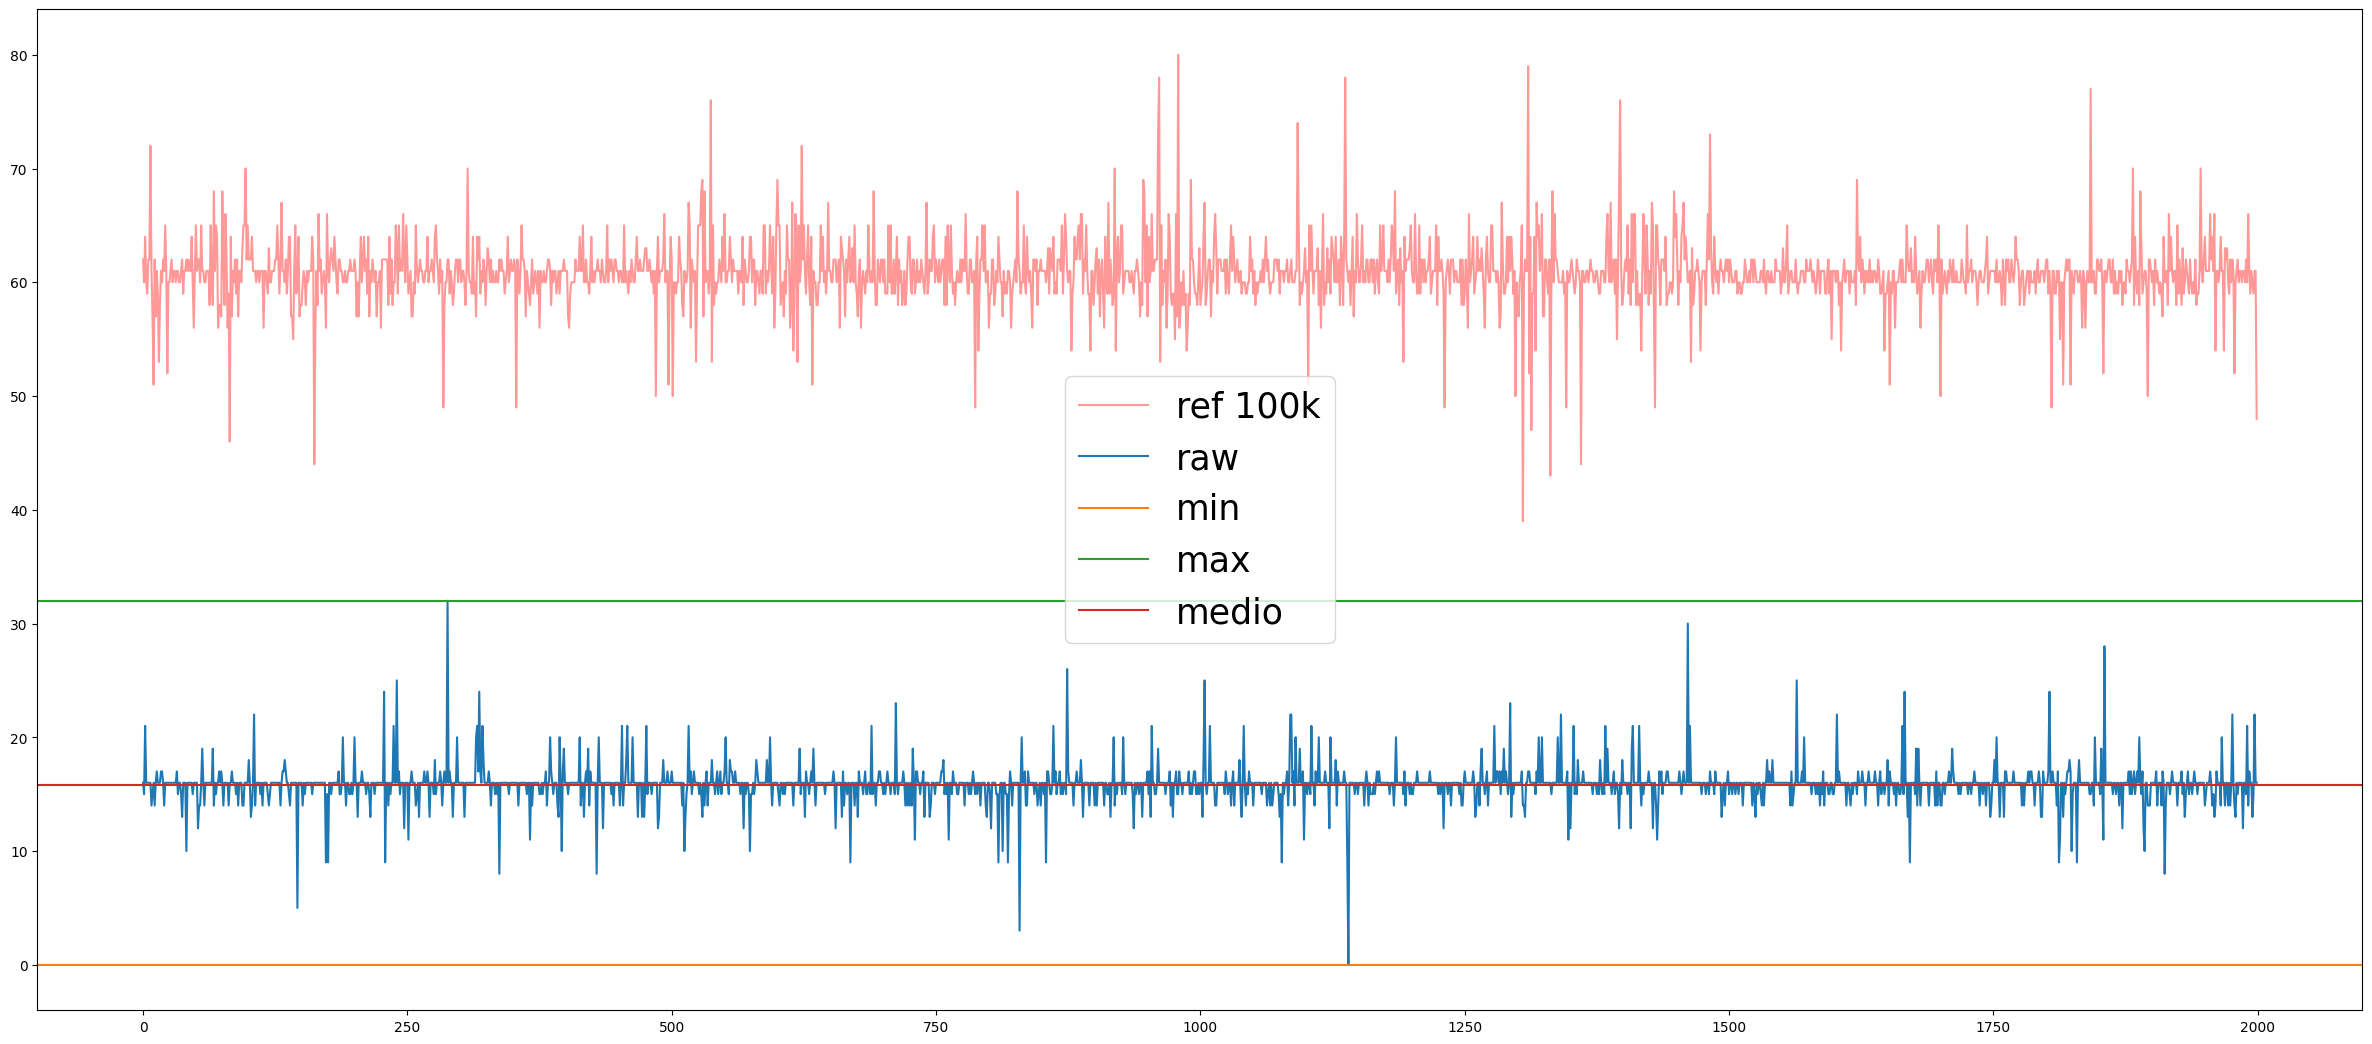

In [13]:
path_file_reference = '../../../results/TC-II-ADC/TC-II-ADC-REF.txt' 
path_file_reference100K = '../../../results/TC-II-ADC/TC-II-ADC-REF100k.txt' 
path_file_referencec121 = '../../../results/TC-II-ADC/TC-II-ADC-REFC121.txt'


reference = np.zeros( (2000,1)) 
voltage_ref = np.zeros((2000,1))
voltage_ref_100k = np.zeros((2000,1))
voltage_ref_c121 = np.zeros((2000,1))

d0,d1,d2 = np.genfromtxt(path_file_reference, delimiter=',', dtype=None, encoding=None,unpack=True)
d1 =np.array([int(x, 16) for x in d1])
d2 =d2.astype(int) 
reference = d2  
min_ref = np.amin(reference) 
max_ref =  np.amax(reference)
mean_ref = np.mean(reference)
voltage_ref = reference*(SOURCE_ADC_VOLTAGE/MAX_VALUE)

d0,d1,d2 = np.genfromtxt(path_file_reference100K, delimiter=',', dtype=None, encoding=None,unpack=True)
d1 =np.array([int(x, 16) for x in d1])
d2 =d2.astype(int) 
voltage_ref_100k = d2  


d0,d1,d2 = np.genfromtxt(path_file_referencec121, delimiter=',', dtype=None, encoding=None,unpack=True)
d1 =np.array([int(x, 16) for x in d1])
d2 =d2.astype(int) 
voltage_ref_c121 = d2  



figref, axref = plt.subplots(figsize=(30,13))
l0=axref.plot(n_samples_adc, voltage_ref_100k,label='ref 100k',color='#ff9896')
l1=axref.plot(n_samples_adc, reference,label='raw',color='#1f77b4')
l11=axref.plot(n_samples_adc, voltage_ref_c121,label='c121',color='#8c564b')

l2=axref.axhline(y=min_ref,label='min',color= '#ff7f0e')
l3=axref.axhline(y=max_ref,label='max',color='#2ca02c')
l4=axref.axhline(y=mean_ref,label='medio',color ='#d62728')
axref.legend(fontsize=25)

# TC-ADC-III: Test de validación diferencia constante. 

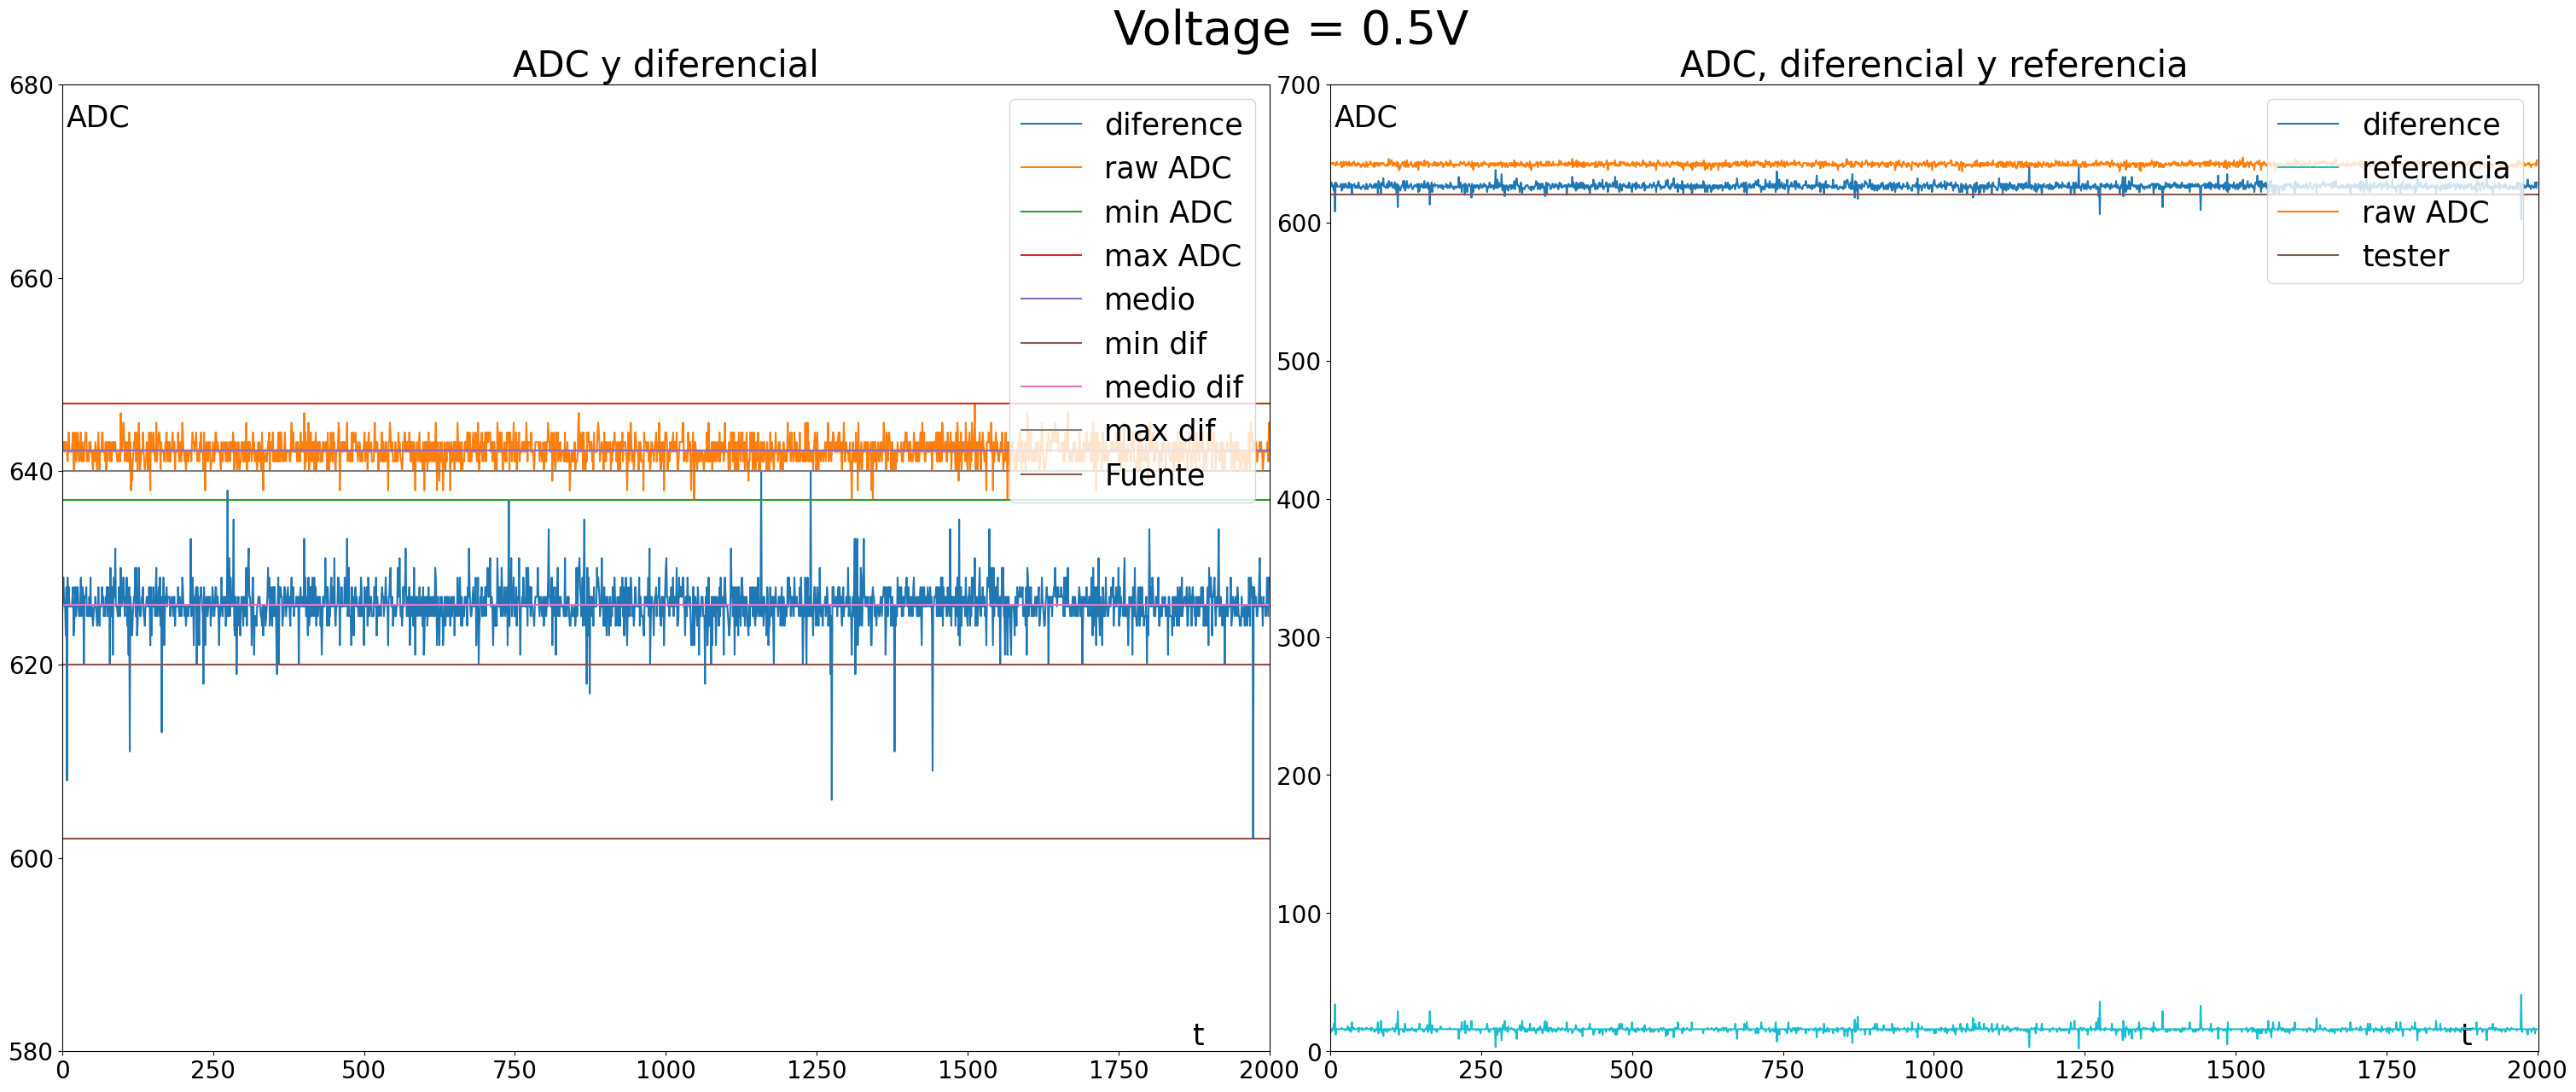

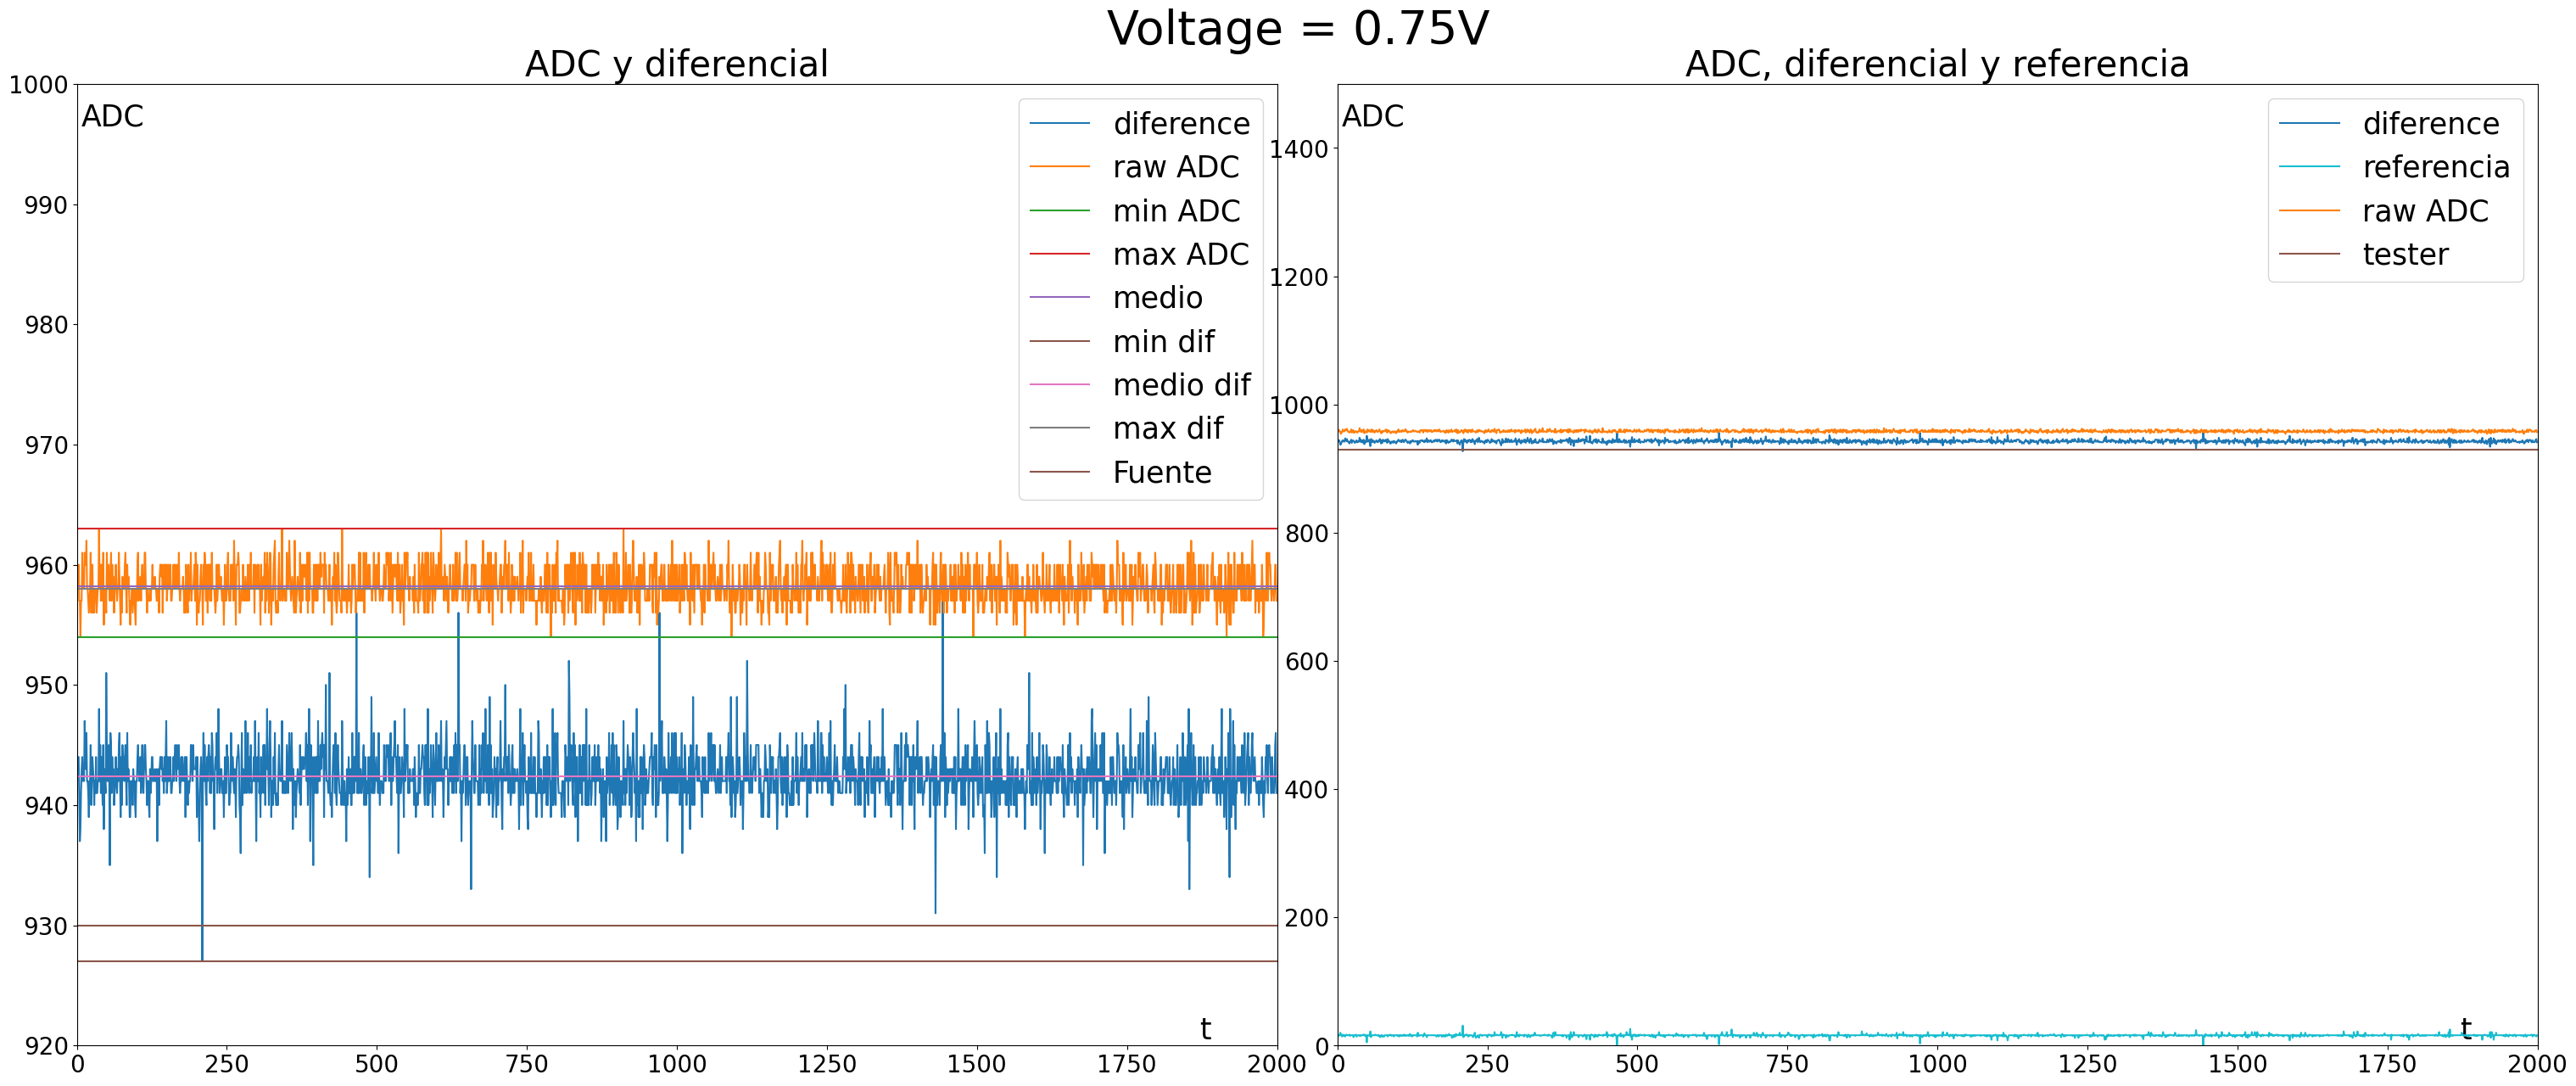

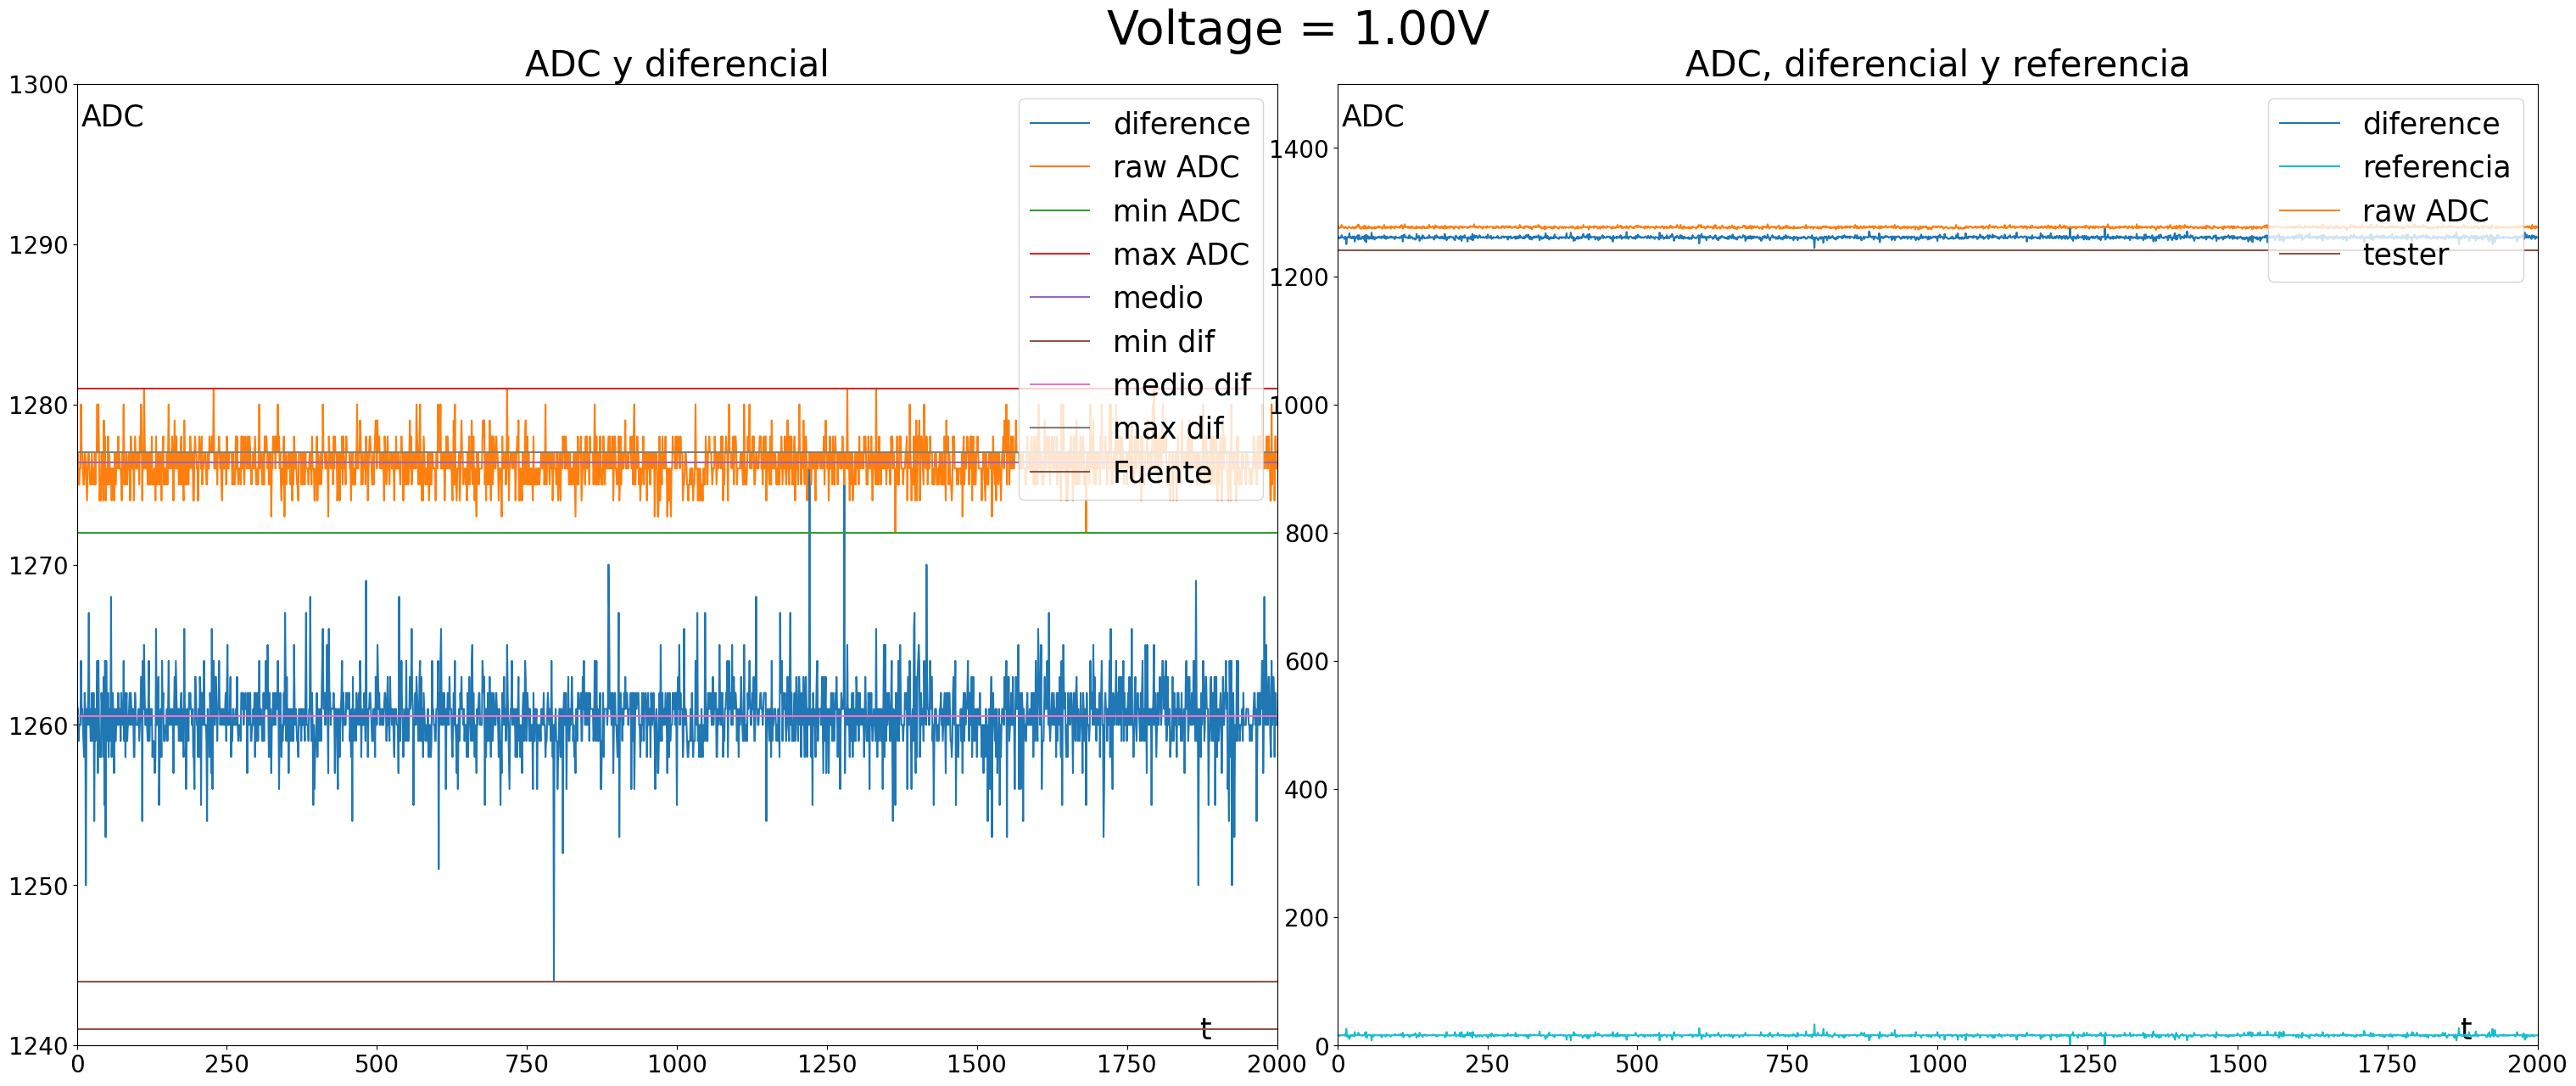

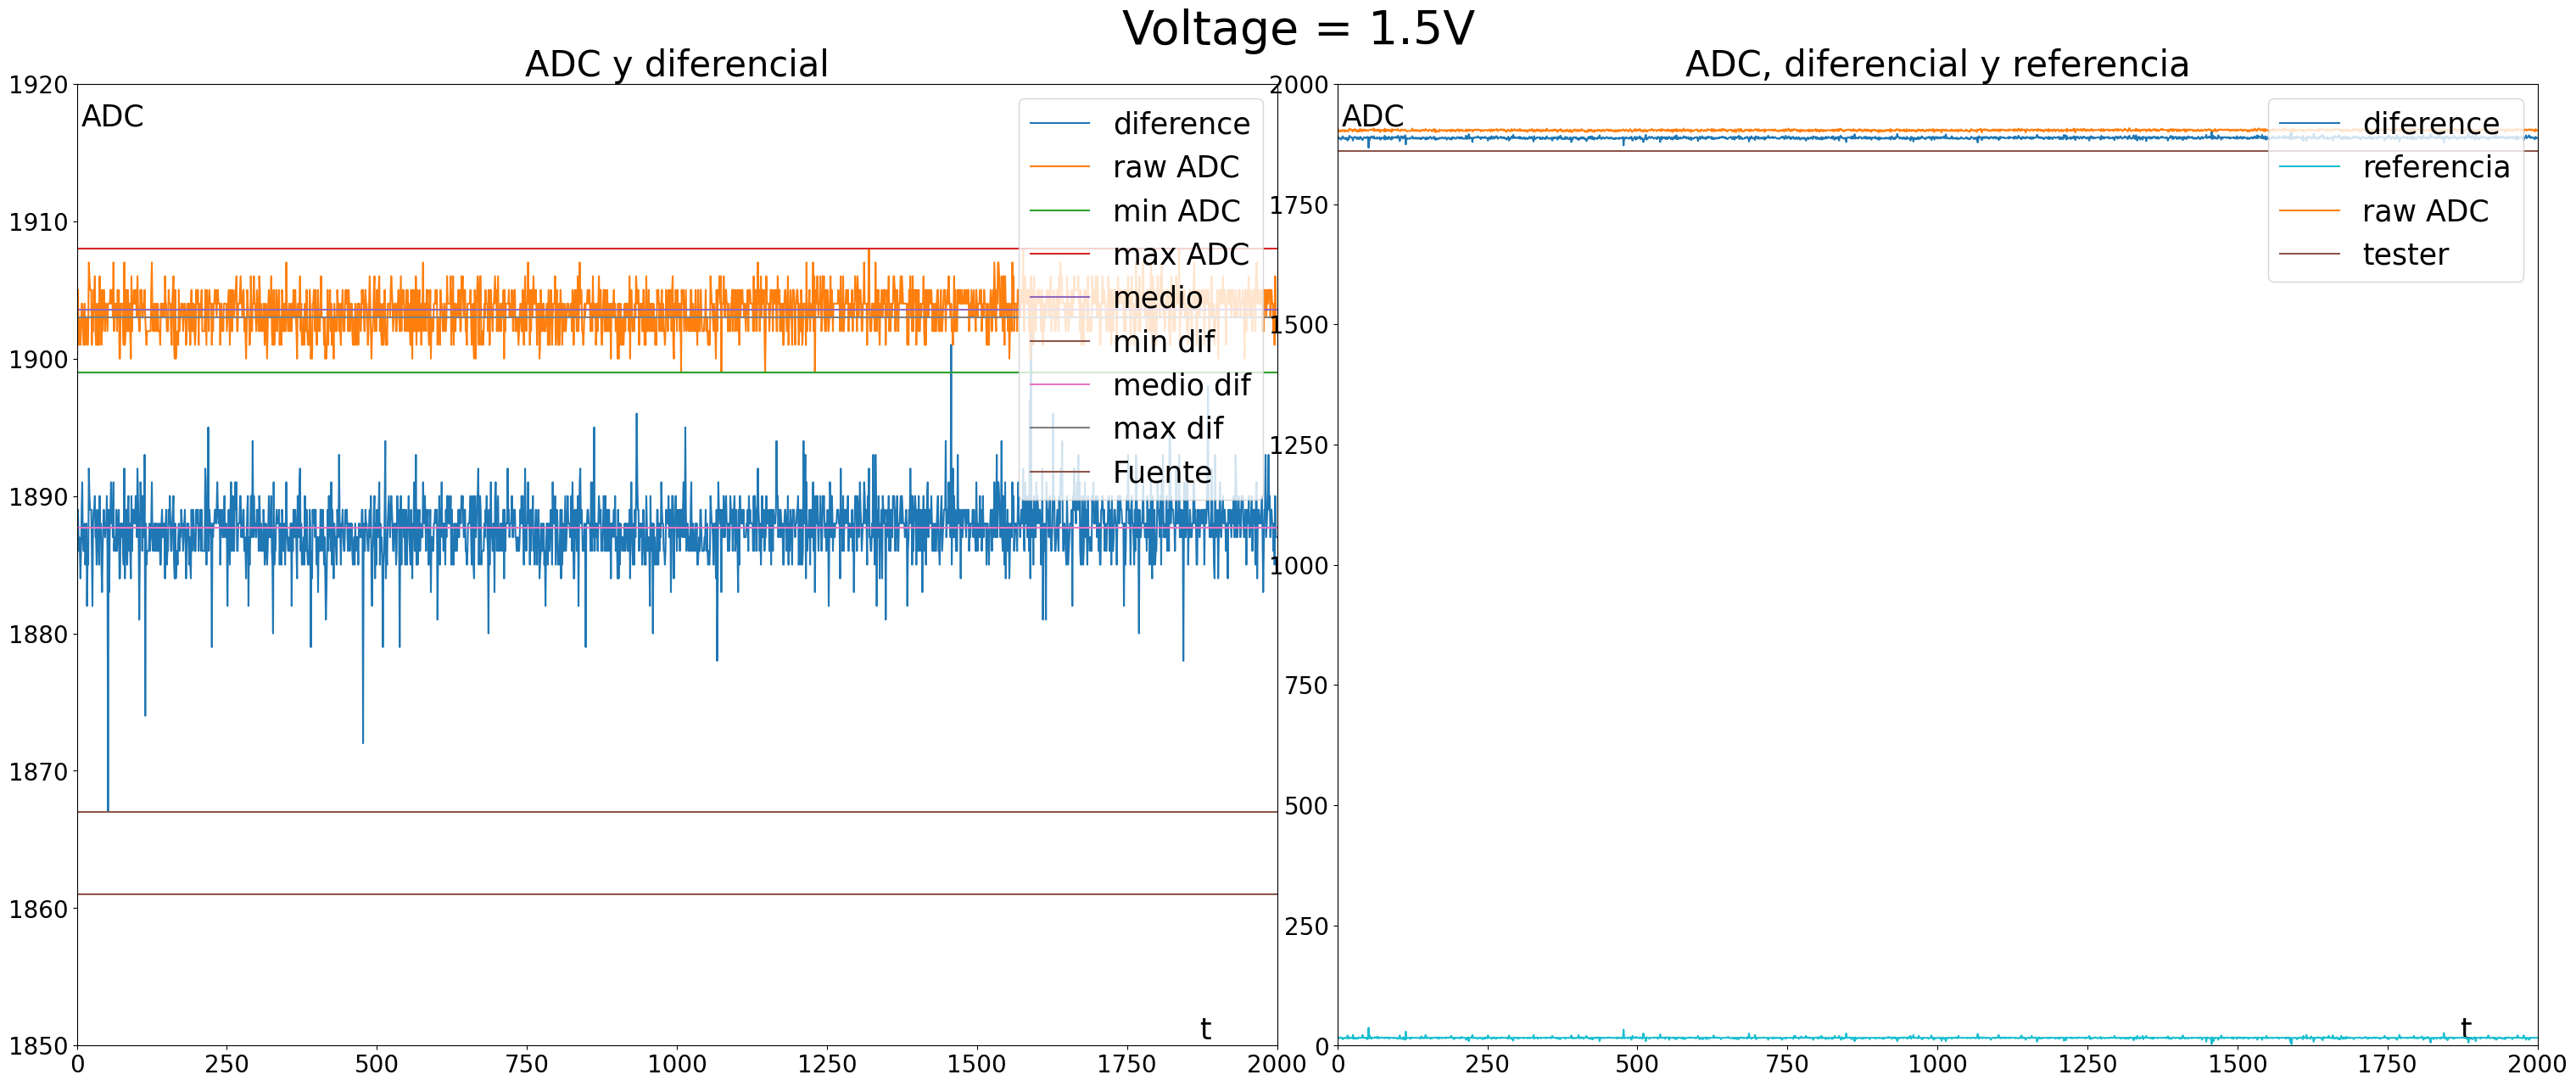

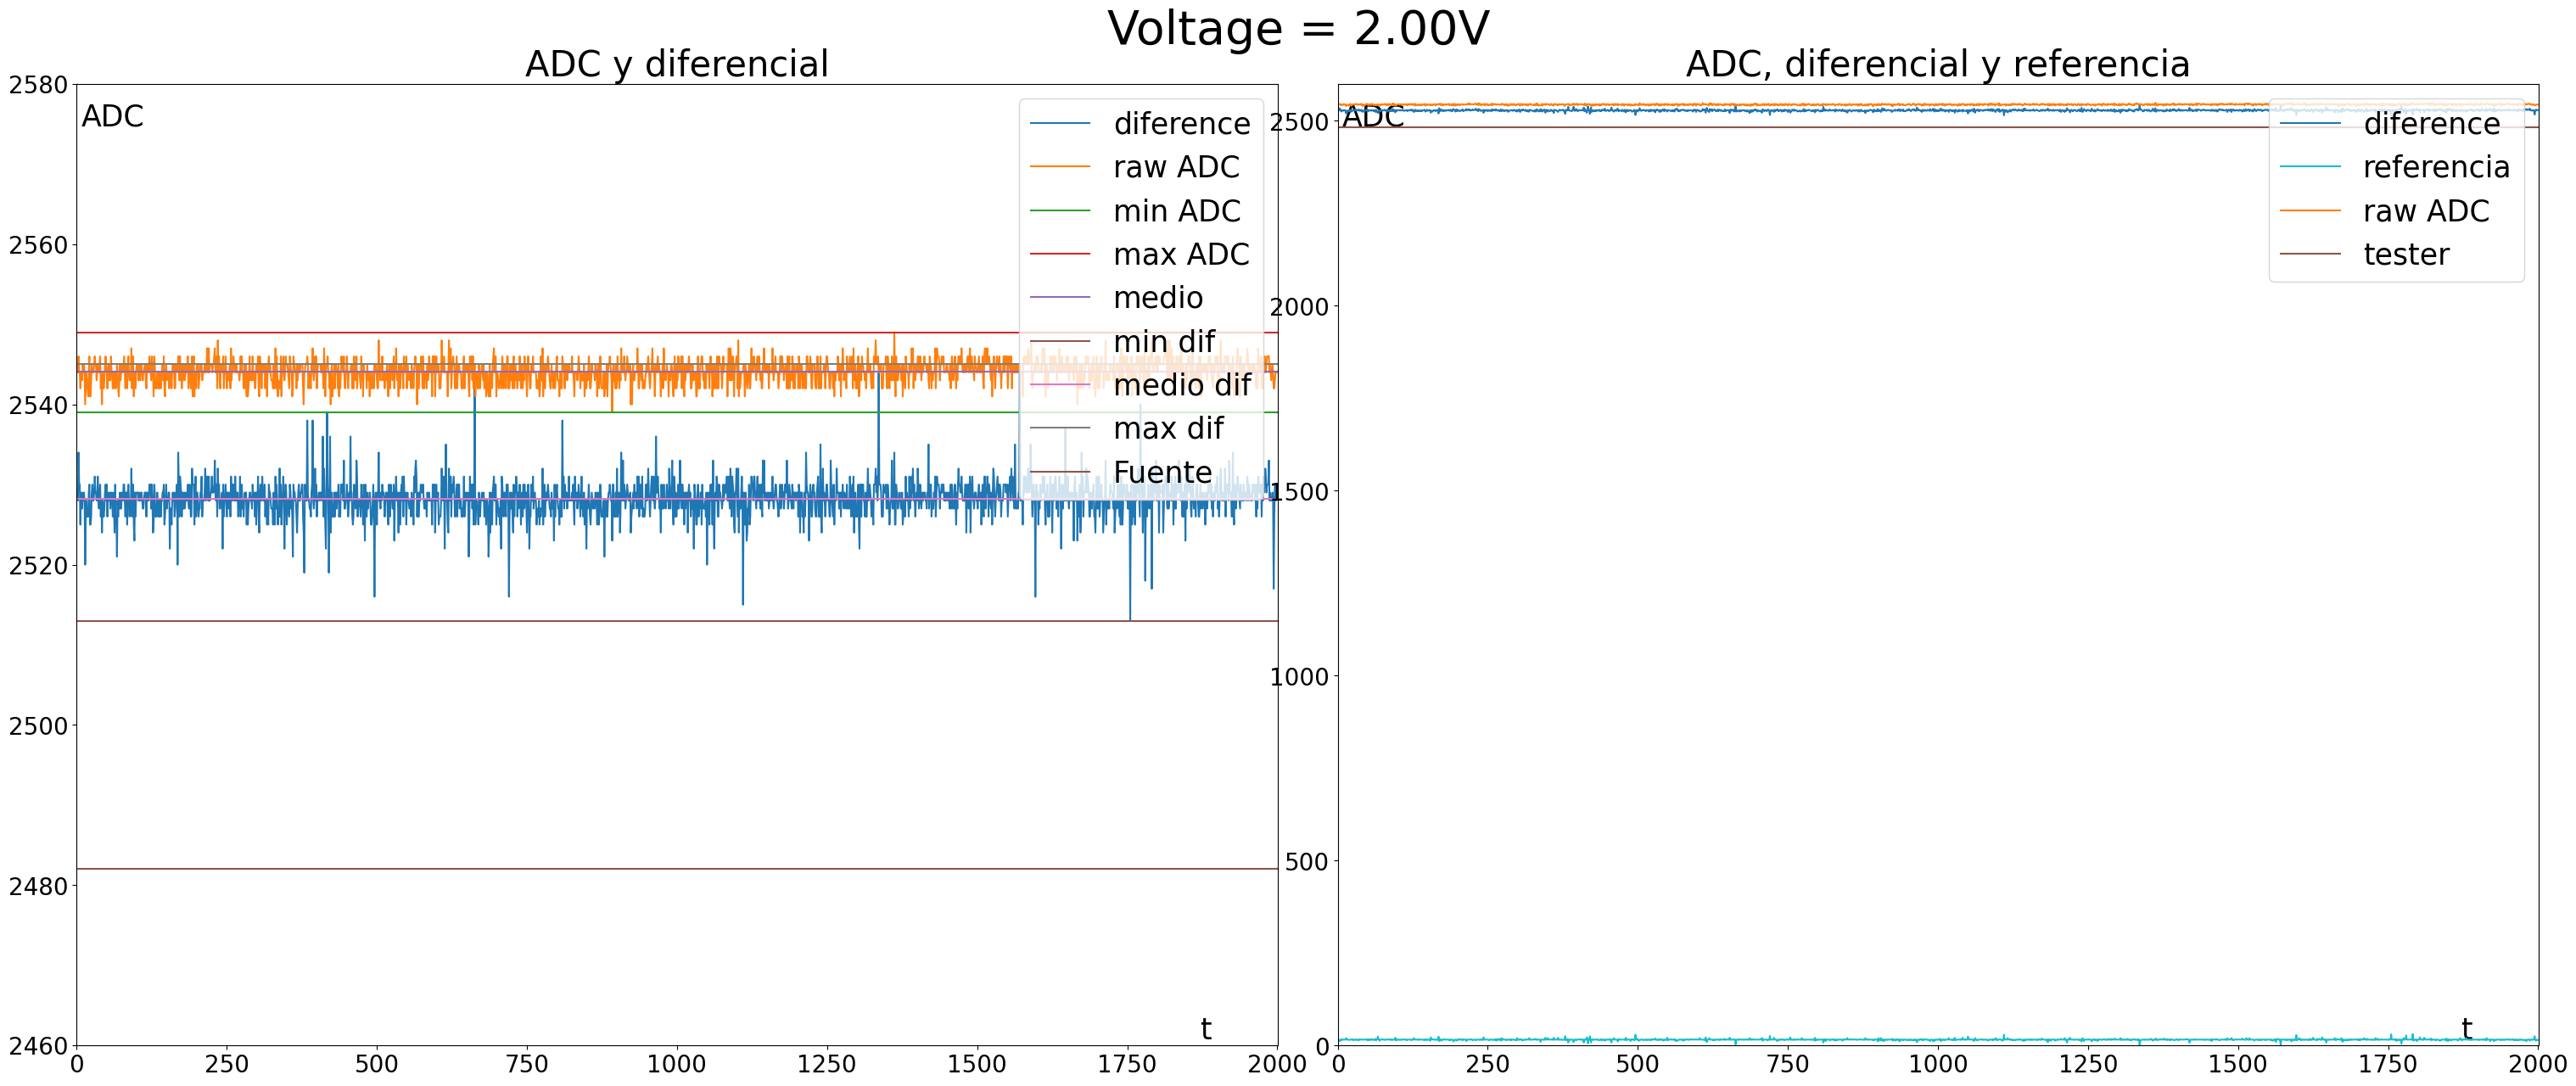

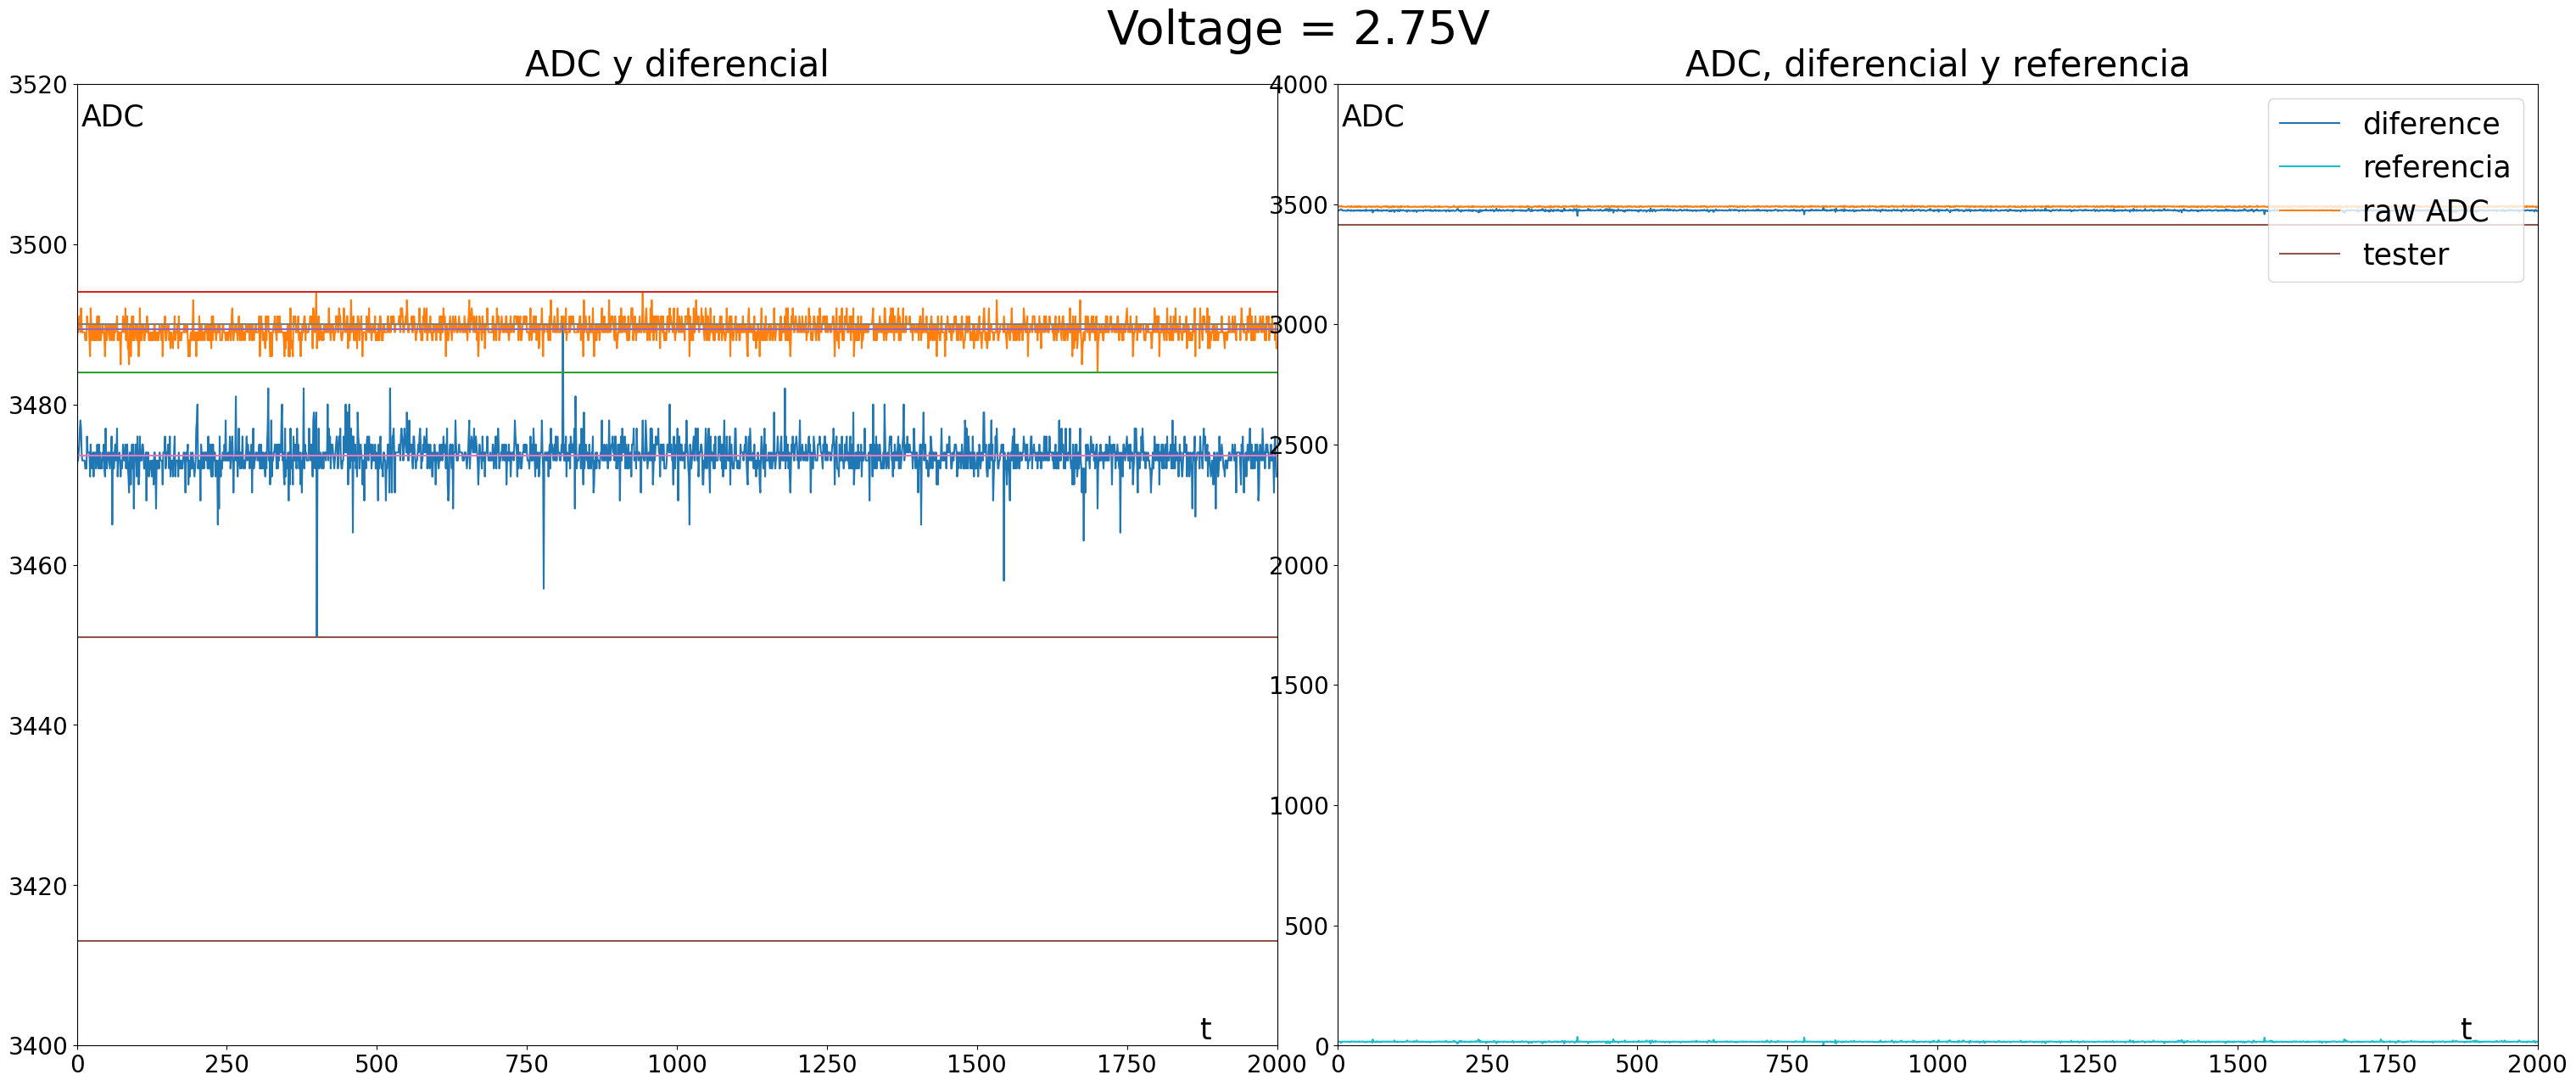

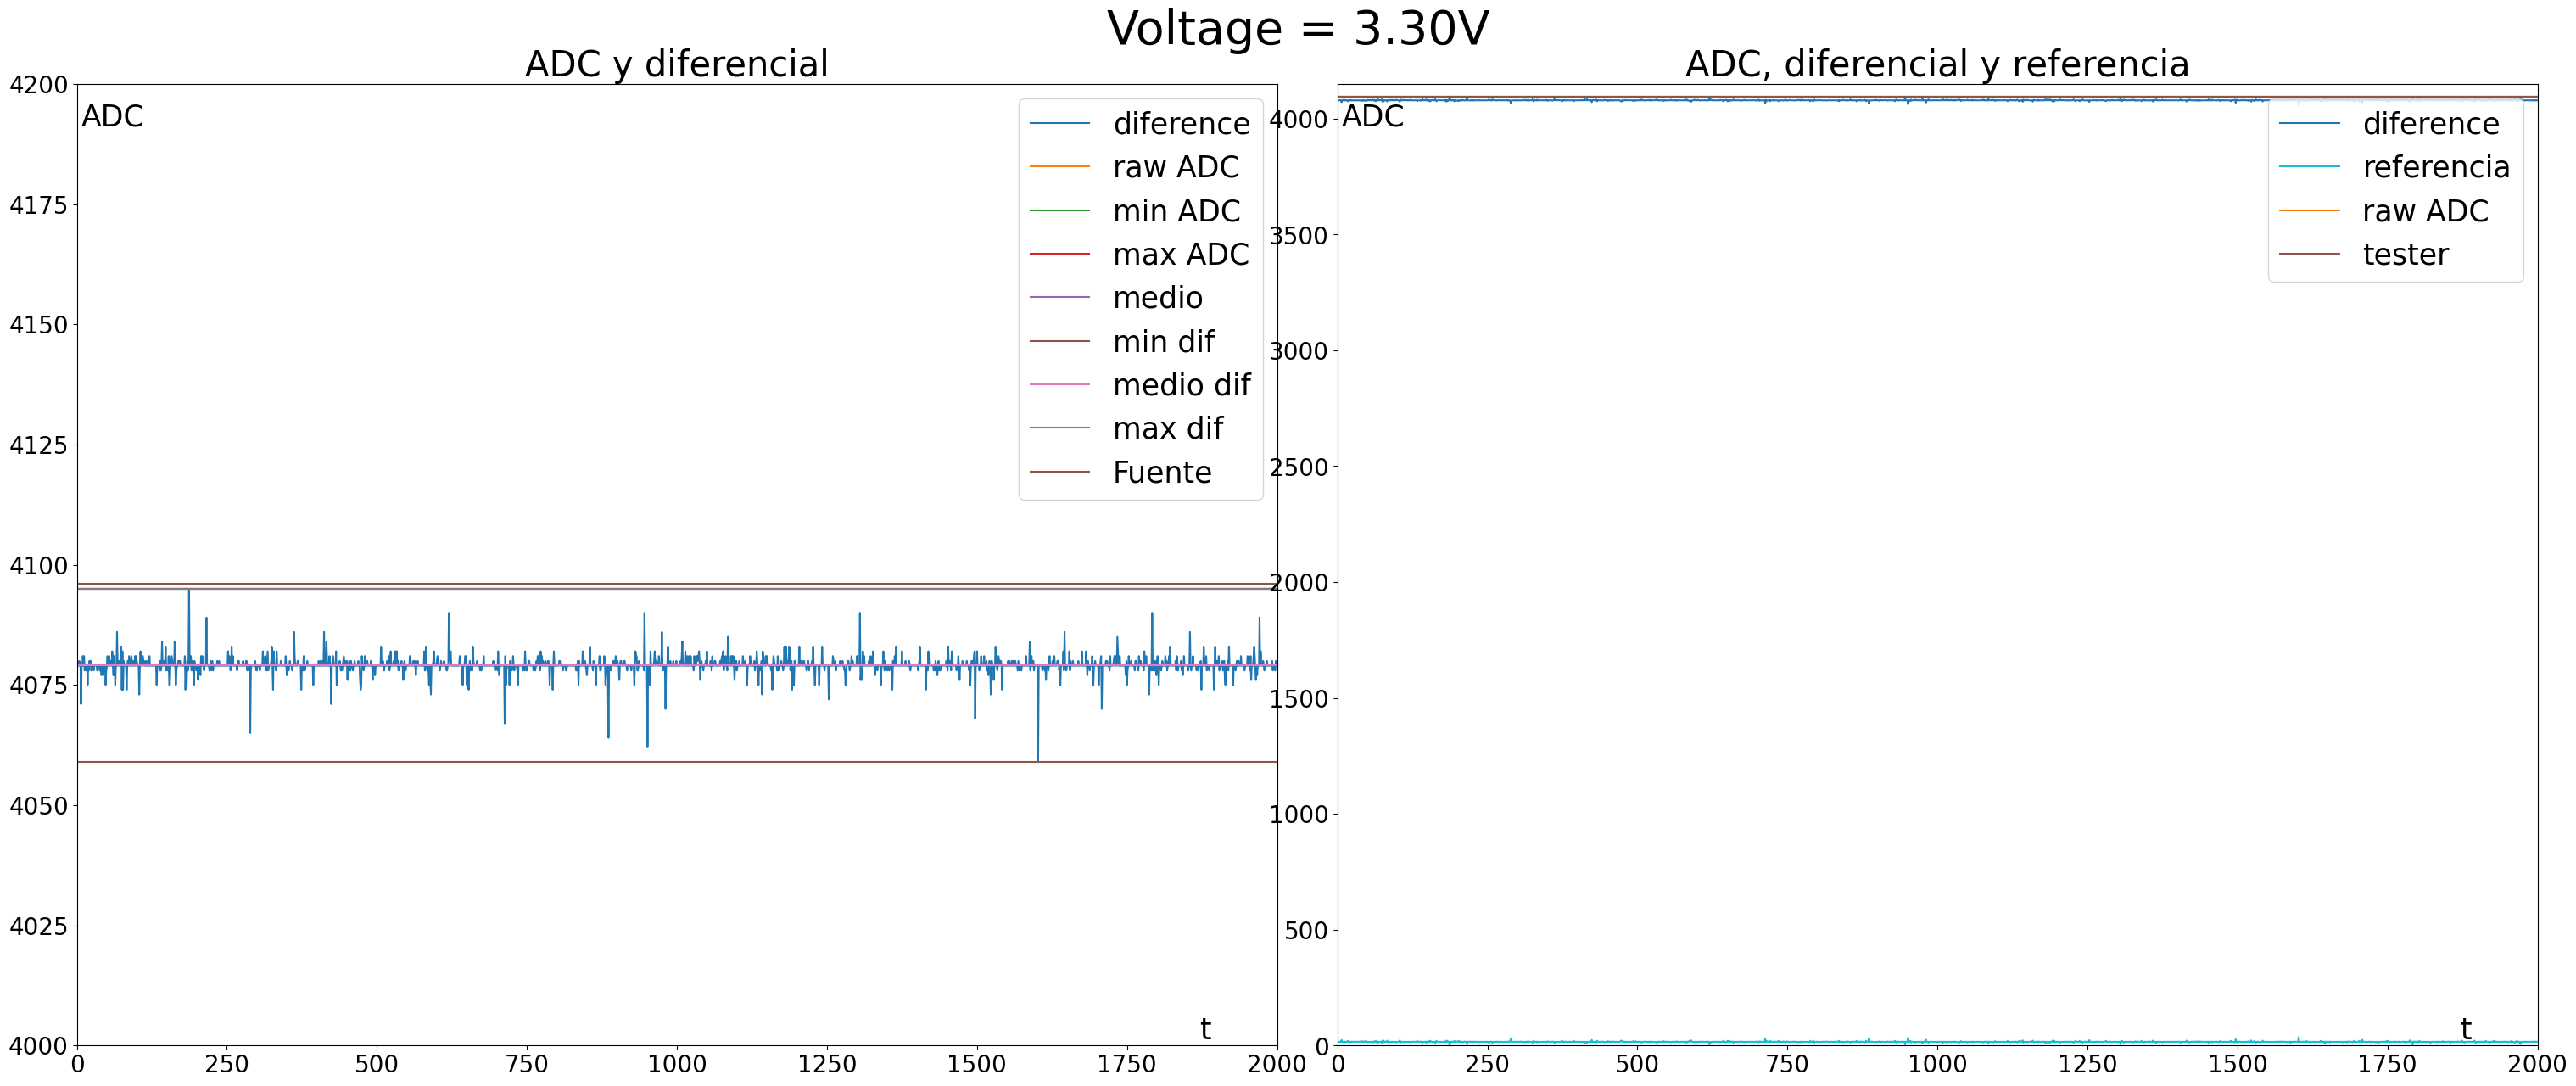

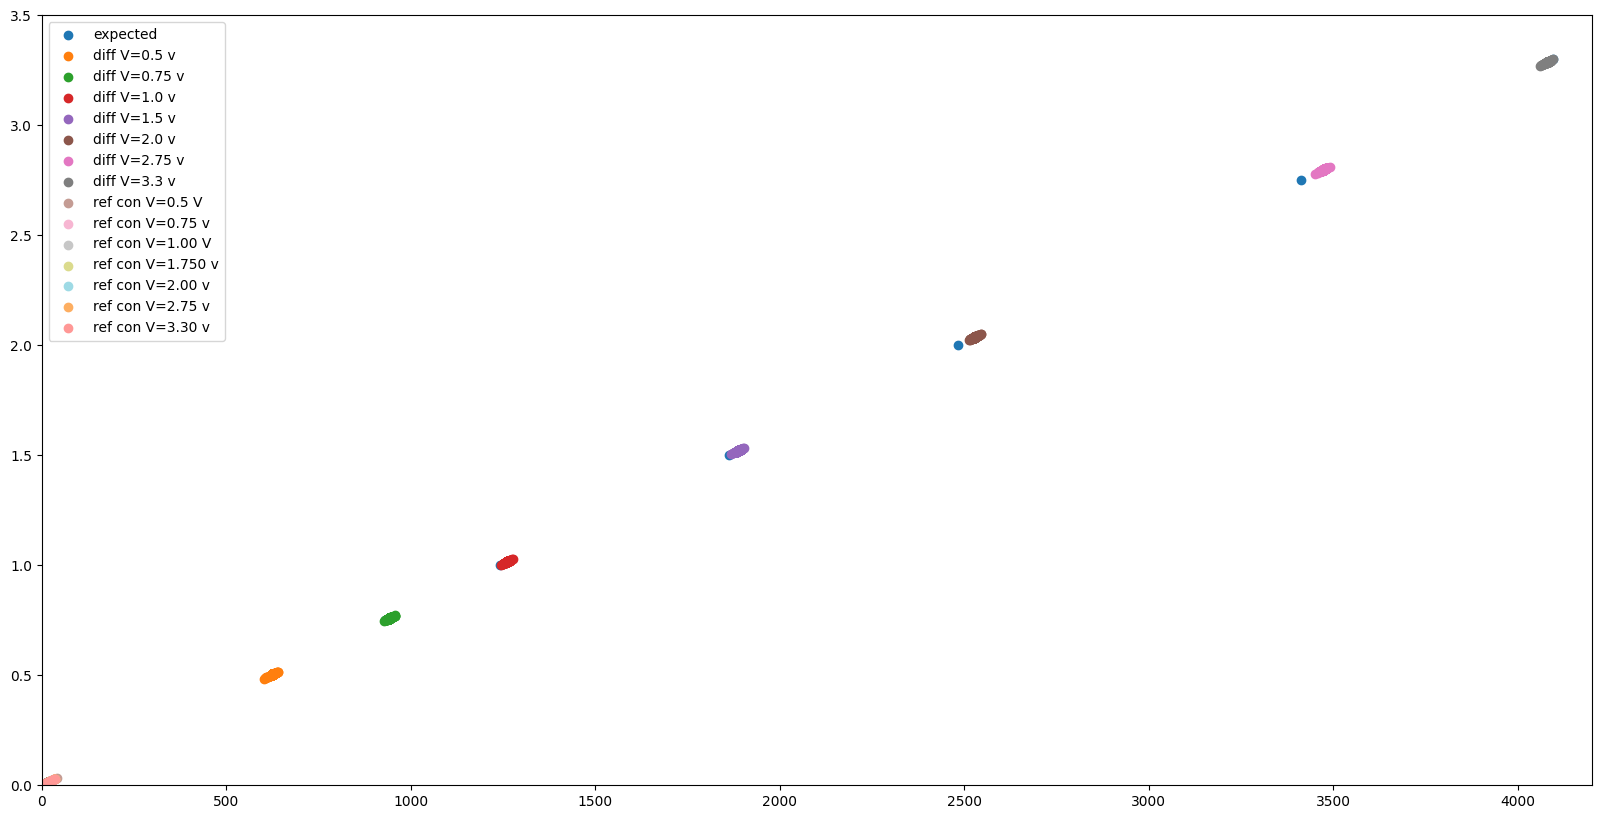

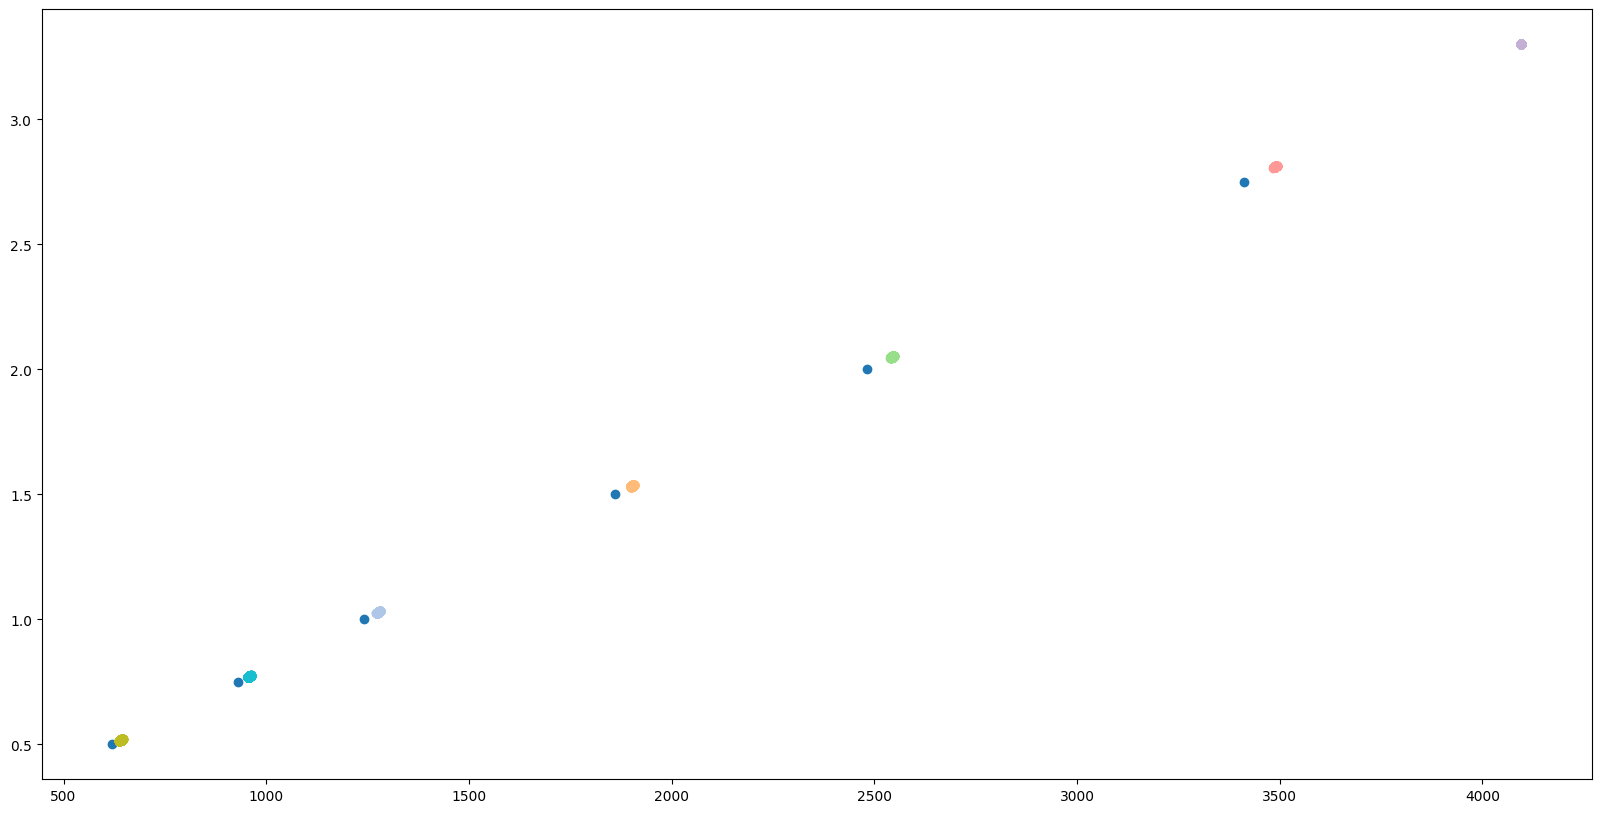

In [5]:
#%matplotlib widget

### 0.5v fuente - Tester 0.501v  
### 0.75 fuente - Tester 0.752v 
### 1.0  fuente - Tester 1.003v 
### 1.5  fuente - Tester 1.504v 
### 2.0  fuente - Tester 2.000v
### 2.75 fuente - Tester 2.750v
### 3.3. fuente - Tester 3.300v

path_file = '../../../results/TC-III-ADC/'
list_files_tcIII = ['TC-III-ADC-0.50.txt',
                    'TC-III-ADC-0.75.txt',
                    'TC-III-ADC-1.00.txt',
                    'TC-III-ADC-1.50.txt',
                    'TC-III-ADC-2.00.txt',
                    'TC-III-ADC-2.75.txt',
                    'TC-III-ADC-3.30.txt']

voltage_source = [0.5,0.75,1.0,1.5,2.0,2.75,3.3]
adc_voltage_source_expected = [] 
for l in voltage_source: 
    adc_voltage_source_expected.append(int((4096/3.3)*l)) ## expected raw 


## file commas separate values: index, hex-difference, dec-difference, hex-reference,dec-reference, hex-rawdata, dec-rawdata

n_samples_adc          = np.arange(0,2000,1.0,dtype=float) # eje x para gráficas ADC 
difference_data        = np.zeros((2000,len(list_files_tcIII)),dtype=int)
difference_data_hex    = np.zeros((2000,len(list_files_tcIII)),dtype=int)
raw_reference_data     = np.zeros((2000,len(list_files_tcIII)),dtype=int)
raw_reference_data_hex = np.zeros((2000,len(list_files_tcIII)),dtype=int)
raw_adc_data           = np.zeros((2000,len(list_files_tcIII)),dtype=int)
raw_adc_data_hex       = np.zeros((2000,len(list_files_tcIII)),dtype=int)

voltage_diff= np.zeros((2000,len(list_files_tcIII))) 
voltage_raw= np.zeros((2000,len(list_files_tcIII))) 
voltage_reference= np.zeros((2000,len(list_files_tcIII))) 





ADC_mean_dif = []
ADC_max_dif  = []
ADC_min_dif  = [] 
ADC_mean_ref = []
ADC_max_ref  = []
ADC_min_ref  = [] 
ADC_mean_raw = []
ADC_max_raw  = []
ADC_min_raw  = [] 


### PROCESSING FILES FOR EXTRACT DATA !     
i = 0 
### d0: index, d1: hex-dif 
for file in list_files_tcIII:    
    index,hex_diff,dec_diff,hex_ref,dec_ref,hex_raw_adc,dec_raw_adc = np.genfromtxt(path_file+file, delimiter=',', dtype=None, encoding=None,unpack=True)
    hex_diff=np.array([int(x, 16) for x in hex_diff])
    dec_diff =dec_diff.astype(int) 
    hex_ref = np.array([int(x, 16) for x in hex_ref])
    dec_ref = dec_ref.astype(int)
    hex_raw_adc = np.array([int(x, 16) for x in hex_raw_adc])
    dec_raw_adc = dec_raw_adc.astype(int)      
    ## load values in a column of vector 
    difference_data[:,i] = dec_diff 
    difference_data_hex[:,i] = dec_diff     
    ADC_mean_dif.append(np.mean(dec_diff))
    ADC_max_dif.append(np.amax(dec_diff))
    ADC_min_dif.append(np.amin(dec_diff))
    raw_reference_data[:,i]  = dec_ref
    raw_reference_data_hex[:,i] = hex_ref
    ADC_mean_ref.append(np.mean(dec_ref))
    ADC_max_ref.append(np.amax(dec_ref))
    ADC_min_ref.append(np.amin(dec_ref))
    raw_adc_data_hex[:,i] = hex_raw_adc
    raw_adc_data[:,i] = dec_raw_adc 
    ADC_mean_raw.append(np.mean(dec_raw_adc))
    ADC_max_raw.append(np.amax(dec_raw_adc))
    ADC_min_raw.append(np.amin(dec_raw_adc))
    i = i + 1 



for i in range(0,len(list_files_tcIII)): 
    voltage_diff[:,i] = difference_data[:,i]*(SOURCE_ADC_VOLTAGE/MAX_VALUE)
    voltage_raw[:,i] = raw_adc_data[:,i]*(SOURCE_ADC_VOLTAGE/MAX_VALUE)
    voltage_reference[:,i] = raw_reference_data[:,i]*(SOURCE_ADC_VOLTAGE/MAX_VALUE)


### plotting figures ! 
############################### VOLTAGE 0.5V ###############################################################################
index = 0 ## 0.5v 
ax_index = [0,1] 
figDiff05,axdiff05 = plt.subplots(nrows=1, ncols=2,figsize=(30,13))
figDiff05.suptitle('Voltage = 0.5V',fontsize = 40) 
figDiff05.tight_layout(pad=2.0)

l0 = axdiff05[ax_index[0]].plot(n_samples_adc, difference_data[:,index],label='diference',color='#1f77b4')
l1 = axdiff05[ax_index[0]].plot(n_samples_adc, raw_adc_data[:,index],label='raw ADC',color='#ff7f0e')
l2 = axdiff05[ax_index[0]].axhline(y=ADC_min_raw[index],label='min ADC',color= '#2ca02c')
l3 = axdiff05[ax_index[0]].axhline(y=ADC_max_raw[index],label='max ADC',color='#d62728')
l4 = axdiff05[ax_index[0]].axhline(y=ADC_mean_raw[index],label='medio',color ='#9467bd')
l5 = axdiff05[ax_index[0]].axhline(y=ADC_min_dif[index],label='min dif',color ='#8c564b')
l6 = axdiff05[ax_index[0]].axhline(y=ADC_mean_dif[index],label='medio dif',color ='#e377c2')
l7 = axdiff05[ax_index[0]].axhline(y=ADC_max_dif[index],label='max dif',color ='#7f7f7f')
l8 = axdiff05[ax_index[0]].axhline(y=adc_voltage_source_expected[index],label='Fuente',color= '#8c564b')

## plot (0,1) 
l0 = axdiff05[ax_index[1]].plot(n_samples_adc, difference_data[:,index],label='diference',color='#1f77b4')
l1 = axdiff05[ax_index[1]].plot(n_samples_adc, raw_reference_data[:,index],label='referencia',color='#17becf')
l2 = axdiff05[ax_index[1]].plot(n_samples_adc, raw_adc_data[:,index],label='raw ADC',color='#ff7f0e')
l3 = axdiff05[ax_index[1]].axhline(y=adc_voltage_source_expected[index],label='tester',color= '#8c564b')

#CONFIGURE PLOT 
axdiff05[ax_index[0]].set_title('ADC y diferencial',fontsize = 30) 
axdiff05[ax_index[0]].legend(loc='upper right',fontsize=25)
axdiff05[ax_index[0]].set_xlabel('t',fontsize = 25) 
axdiff05[ax_index[0]].set_ylabel('ADC', rotation = 0,fontsize =25) 
axdiff05[ax_index[0]].tick_params(axis='both', which='major', labelsize=20)
axdiff05[ax_index[0]].xaxis.set_label_coords(0.94,0.03)
axdiff05[ax_index[0]].yaxis.set_label_coords(0.03,0.95)
axdiff05[ax_index[0]].set_xlim([0,2001]) 
axdiff05[ax_index[0]].set_ylim([580,680]) 
axdiff05[ax_index[1]].set_title('ADC, diferencial y referencia',fontsize = 30) 
axdiff05[ax_index[1]].legend(loc='upper right',fontsize=25)
axdiff05[ax_index[1]].set_xlabel('t',fontsize = 25) 
axdiff05[ax_index[1]].set_ylabel('ADC', rotation = 0,fontsize =25) 
axdiff05[ax_index[1]].tick_params(axis='both', which='major', labelsize=20)
axdiff05[ax_index[1]].xaxis.set_label_coords(0.94,0.03)
axdiff05[ax_index[1]].yaxis.set_label_coords(0.03,0.95)
axdiff05[ax_index[1]].set_xlim([0,2001]) 
axdiff05[ax_index[1]].set_ylim([0,700]) 
############################### END OF VOLTAGE 0.5V ###############################################################################



################################### VOLTAGE 0.75V ###############################################################################

index = 1 ## 0.5v 
ax_index = [0,1] 
figDiff075,axdiff075 = plt.subplots(nrows=1, ncols=2,figsize=(30,13))
figDiff075.suptitle('Voltage = 0.75V',fontsize = 40) 
figDiff075.tight_layout(pad=2.0)

l0 = axdiff075[ax_index[0]].plot(n_samples_adc, difference_data[:,index],label='diference',color='#1f77b4')
l1 = axdiff075[ax_index[0]].plot(n_samples_adc, raw_adc_data[:,index],label='raw ADC',color='#ff7f0e')
l2 = axdiff075[ax_index[0]].axhline(y=ADC_min_raw[index],label='min ADC',color= '#2ca02c')
l3 = axdiff075[ax_index[0]].axhline(y=ADC_max_raw[index],label='max ADC',color='#d62728')
l4 = axdiff075[ax_index[0]].axhline(y=ADC_mean_raw[index],label='medio',color ='#9467bd')
l5 = axdiff075[ax_index[0]].axhline(y=ADC_min_dif[index],label='min dif',color ='#8c564b')
l6 = axdiff075[ax_index[0]].axhline(y=ADC_mean_dif[index],label='medio dif',color ='#e377c2')
l7 = axdiff075[ax_index[0]].axhline(y=ADC_max_dif[index],label='max dif',color ='#7f7f7f')
l8 = axdiff075[ax_index[0]].axhline(y=adc_voltage_source_expected[index],label='Fuente',color= '#8c564b')

## plot (0,1) 
l0 = axdiff075[ax_index[1]].plot(n_samples_adc, difference_data[:,index],label='diference',color='#1f77b4')
l1 = axdiff075[ax_index[1]].plot(n_samples_adc, raw_reference_data[:,index],label='referencia',color='#17becf')
l2 = axdiff075[ax_index[1]].plot(n_samples_adc, raw_adc_data[:,index],label='raw ADC',color='#ff7f0e')
l3 = axdiff075[ax_index[1]].axhline(y=adc_voltage_source_expected[index],label='tester',color= '#8c564b')

#CONFIGURE PLOT 
axdiff075[ax_index[0]].set_title('ADC y diferencial',fontsize = 30) 
axdiff075[ax_index[0]].legend(loc='upper right',fontsize=25)
axdiff075[ax_index[0]].set_xlabel('t',fontsize = 25) 
axdiff075[ax_index[0]].set_ylabel('ADC', rotation = 0,fontsize =25) 
axdiff075[ax_index[0]].tick_params(axis='both', which='major', labelsize=20)
axdiff075[ax_index[0]].xaxis.set_label_coords(0.94,0.03)
axdiff075[ax_index[0]].yaxis.set_label_coords(0.03,0.95)
axdiff075[ax_index[0]].set_xlim([0,2001]) 
axdiff075[ax_index[0]].set_ylim([920,1000]) 
axdiff075[ax_index[1]].set_title('ADC, diferencial y referencia',fontsize = 30) 
axdiff075[ax_index[1]].legend(loc='upper right',fontsize=25)
axdiff075[ax_index[1]].set_xlabel('t',fontsize = 25) 
axdiff075[ax_index[1]].set_ylabel('ADC', rotation = 0,fontsize =25) 
axdiff075[ax_index[1]].tick_params(axis='both', which='major', labelsize=20)
axdiff075[ax_index[1]].xaxis.set_label_coords(0.94,0.03)
axdiff075[ax_index[1]].yaxis.set_label_coords(0.03,0.95)
axdiff075[ax_index[1]].set_xlim([0,2001]) 
axdiff075[ax_index[1]].set_ylim([0,1500]) 
############################### END OF VOLTAGE 0.75V ###############################################################################




############################### VOLTAGE 1.00V ###############################################################################

index = 2 ## 0.5v 
ax_index = [0,1] 
figDiff100,axdiff100 = plt.subplots(nrows=1, ncols=2,figsize=(30,13))
figDiff100.suptitle('Voltage = 1.00V',fontsize = 40) 
figDiff100.tight_layout(pad=2.0)

l0 = axdiff100[ax_index[0]].plot(n_samples_adc, difference_data[:,index],label='diference',color='#1f77b4')
l1 = axdiff100[ax_index[0]].plot(n_samples_adc, raw_adc_data[:,index],label='raw ADC',color='#ff7f0e')
l2 = axdiff100[ax_index[0]].axhline(y=ADC_min_raw[index],label='min ADC',color= '#2ca02c')
l3 = axdiff100[ax_index[0]].axhline(y=ADC_max_raw[index],label='max ADC',color='#d62728')
l4 = axdiff100[ax_index[0]].axhline(y=ADC_mean_raw[index],label='medio',color ='#9467bd')
l5 = axdiff100[ax_index[0]].axhline(y=ADC_min_dif[index],label='min dif',color ='#8c564b')
l6 = axdiff100[ax_index[0]].axhline(y=ADC_mean_dif[index],label='medio dif',color ='#e377c2')
l7 = axdiff100[ax_index[0]].axhline(y=ADC_max_dif[index],label='max dif',color ='#7f7f7f')
l8 = axdiff100[ax_index[0]].axhline(y=adc_voltage_source_expected[index],label='Fuente',color= '#8c564b')

## plot (0,1) 
l0 = axdiff100[ax_index[1]].plot(n_samples_adc, difference_data[:,index],label='diference',color='#1f77b4')
l1 = axdiff100[ax_index[1]].plot(n_samples_adc, raw_reference_data[:,index],label='referencia',color='#17becf')
l2 = axdiff100[ax_index[1]].plot(n_samples_adc, raw_adc_data[:,index],label='raw ADC',color='#ff7f0e')
l3 = axdiff100[ax_index[1]].axhline(y=adc_voltage_source_expected[index],label='tester',color= '#8c564b')

#CONFIGURE PLOT 
axdiff100[ax_index[0]].set_title('ADC y diferencial',fontsize = 30) 
axdiff100[ax_index[0]].legend(loc='upper right',fontsize=25)
axdiff100[ax_index[0]].set_xlabel('t',fontsize = 25) 
axdiff100[ax_index[0]].set_ylabel('ADC', rotation = 0,fontsize =25) 
axdiff100[ax_index[0]].tick_params(axis='both', which='major', labelsize=20)
axdiff100[ax_index[0]].xaxis.set_label_coords(0.94,0.03)
axdiff100[ax_index[0]].yaxis.set_label_coords(0.03,0.95)
axdiff100[ax_index[0]].set_xlim([0,2001]) 
axdiff100[ax_index[0]].set_ylim([1240,1300]) 
axdiff100[ax_index[1]].set_title('ADC, diferencial y referencia',fontsize = 30) 
axdiff100[ax_index[1]].legend(loc='upper right',fontsize=25)
axdiff100[ax_index[1]].set_xlabel('t',fontsize = 25) 
axdiff100[ax_index[1]].set_ylabel('ADC', rotation = 0,fontsize =25) 
axdiff100[ax_index[1]].tick_params(axis='both', which='major', labelsize=20)
axdiff100[ax_index[1]].xaxis.set_label_coords(0.94,0.03)
axdiff100[ax_index[1]].yaxis.set_label_coords(0.03,0.95)
axdiff100[ax_index[1]].set_xlim([0,2001]) 
axdiff100[ax_index[1]].set_ylim([0,1500]) 
############################### END OF VOLTAGE 1.00V ###############################################################################



############################### VOLTAGE 1.50V ###############################################################################

index = 3 ## 0.5v 
ax_index = [0,1] 
figDiff175,axdiff175 = plt.subplots(nrows=1, ncols=2,figsize=(30,13))
figDiff175.suptitle('Voltage = 1.5V',fontsize = 40) 
figDiff175.tight_layout(pad=2.0)

l0 = axdiff175[ax_index[0]].plot(n_samples_adc, difference_data[:,index],label='diference',color='#1f77b4')
l1 = axdiff175[ax_index[0]].plot(n_samples_adc, raw_adc_data[:,index],label='raw ADC',color='#ff7f0e')
l2 = axdiff175[ax_index[0]].axhline(y=ADC_min_raw[index],label='min ADC',color= '#2ca02c')
l3 = axdiff175[ax_index[0]].axhline(y=ADC_max_raw[index],label='max ADC',color='#d62728')
l4 = axdiff175[ax_index[0]].axhline(y=ADC_mean_raw[index],label='medio',color ='#9467bd')
l5 = axdiff175[ax_index[0]].axhline(y=ADC_min_dif[index],label='min dif',color ='#8c564b')
l6 = axdiff175[ax_index[0]].axhline(y=ADC_mean_dif[index],label='medio dif',color ='#e377c2')
l7 = axdiff175[ax_index[0]].axhline(y=ADC_max_dif[index],label='max dif',color ='#7f7f7f')
l8 = axdiff175[ax_index[0]].axhline(y=adc_voltage_source_expected[index],label='Fuente',color= '#8c564b')

## plot (0,1) 
l0 = axdiff175[ax_index[1]].plot(n_samples_adc, difference_data[:,index],label='diference',color='#1f77b4')
l1 = axdiff175[ax_index[1]].plot(n_samples_adc, raw_reference_data[:,index],label='referencia',color='#17becf')
l2 = axdiff175[ax_index[1]].plot(n_samples_adc, raw_adc_data[:,index],label='raw ADC',color='#ff7f0e')
l3 = axdiff175[ax_index[1]].axhline(y=adc_voltage_source_expected[index],label='tester',color= '#8c564b')

#CONFIGURE PLOT 
axdiff175[ax_index[0]].set_title('ADC y diferencial',fontsize = 30) 
axdiff175[ax_index[0]].legend(loc='upper right',fontsize=25)
axdiff175[ax_index[0]].set_xlabel('t',fontsize = 25) 
axdiff175[ax_index[0]].set_ylabel('ADC', rotation = 0,fontsize =25) 
axdiff175[ax_index[0]].tick_params(axis='both', which='major', labelsize=20)
axdiff175[ax_index[0]].xaxis.set_label_coords(0.94,0.03)
axdiff175[ax_index[0]].yaxis.set_label_coords(0.03,0.95)
axdiff175[ax_index[0]].set_xlim([0,2001]) 
axdiff175[ax_index[0]].set_ylim([1850,1920]) 
axdiff175[ax_index[1]].set_title('ADC, diferencial y referencia',fontsize = 30) 
axdiff175[ax_index[1]].legend(loc='upper right',fontsize=25)
axdiff175[ax_index[1]].set_xlabel('t',fontsize = 25) 
axdiff175[ax_index[1]].set_ylabel('ADC', rotation = 0,fontsize =25) 
axdiff175[ax_index[1]].tick_params(axis='both', which='major', labelsize=20)
axdiff175[ax_index[1]].xaxis.set_label_coords(0.94,0.03)
axdiff175[ax_index[1]].yaxis.set_label_coords(0.03,0.95)
axdiff175[ax_index[1]].set_xlim([0,2001]) 
axdiff175[ax_index[1]].set_ylim([0,2000]) 
############################### END OF VOLTAGE 1.50V ###############################################################################





############################### VOLTAGE 2.00V ###############################################################################

index = 4 ## 2.00v 
ax_index = [0,1] 
figDiff200,axdiff200 = plt.subplots(nrows=1, ncols=2,figsize=(30,13))
figDiff200.suptitle('Voltage = 2.00V',fontsize = 40) 
figDiff200.tight_layout(pad=2.0)

l0 = axdiff200[ax_index[0]].plot(n_samples_adc, difference_data[:,index],label='diference',color='#1f77b4')
l1 = axdiff200[ax_index[0]].plot(n_samples_adc, raw_adc_data[:,index],label='raw ADC',color='#ff7f0e')
l2 = axdiff200[ax_index[0]].axhline(y=ADC_min_raw[index],label='min ADC',color= '#2ca02c')
l3 = axdiff200[ax_index[0]].axhline(y=ADC_max_raw[index],label='max ADC',color='#d62728')
l4 = axdiff200[ax_index[0]].axhline(y=ADC_mean_raw[index],label='medio',color ='#9467bd')
l5 = axdiff200[ax_index[0]].axhline(y=ADC_min_dif[index],label='min dif',color ='#8c564b')
l6 = axdiff200[ax_index[0]].axhline(y=ADC_mean_dif[index],label='medio dif',color ='#e377c2')
l7 = axdiff200[ax_index[0]].axhline(y=ADC_max_dif[index],label='max dif',color ='#7f7f7f')
l8 = axdiff200[ax_index[0]].axhline(y=adc_voltage_source_expected[index],label='Fuente',color= '#8c564b')

## plot (0,1) 
l0 = axdiff200[ax_index[1]].plot(n_samples_adc, difference_data[:,index],label='diference',color='#1f77b4')
l1 = axdiff200[ax_index[1]].plot(n_samples_adc, raw_reference_data[:,index],label='referencia',color='#17becf')
l2 = axdiff200[ax_index[1]].plot(n_samples_adc, raw_adc_data[:,index],label='raw ADC',color='#ff7f0e')
l3 = axdiff200[ax_index[1]].axhline(y=adc_voltage_source_expected[index],label='tester',color= '#8c564b')

#CONFIGURE PLOT 
axdiff200[ax_index[0]].set_title('ADC y diferencial',fontsize = 30) 
axdiff200[ax_index[0]].legend(loc='upper right',fontsize=25)
axdiff200[ax_index[0]].set_xlabel('t',fontsize = 25) 
axdiff200[ax_index[0]].set_ylabel('ADC', rotation = 0,fontsize =25) 
axdiff200[ax_index[0]].tick_params(axis='both', which='major', labelsize=20)
axdiff200[ax_index[0]].xaxis.set_label_coords(0.94,0.03)
axdiff200[ax_index[0]].yaxis.set_label_coords(0.03,0.95)
axdiff200[ax_index[0]].set_xlim([0,2001]) 
axdiff200[ax_index[0]].set_ylim([2460,2580]) 
axdiff200[ax_index[1]].set_title('ADC, diferencial y referencia',fontsize = 30) 
axdiff200[ax_index[1]].legend(loc='upper right',fontsize=25)
axdiff200[ax_index[1]].set_xlabel('t',fontsize = 25) 
axdiff200[ax_index[1]].set_ylabel('ADC', rotation = 0,fontsize =25) 
axdiff200[ax_index[1]].tick_params(axis='both', which='major', labelsize=20)
axdiff200[ax_index[1]].xaxis.set_label_coords(0.94,0.03)
axdiff200[ax_index[1]].yaxis.set_label_coords(0.03,0.95)
axdiff200[ax_index[1]].set_xlim([0,2001]) 
axdiff200[ax_index[1]].set_ylim([0,2600]) 
############################### END OF VOLTAGE 2.000V ###############################################################################



############################### VOLTAGE 2.75V ###############################################################################

index = 5 ## 2.00v 
ax_index = [0,1] 
figDiff275,axdiff275 = plt.subplots(nrows=1, ncols=2,figsize=(30,13))
figDiff275.suptitle('Voltage = 2.75V',fontsize = 40) 
figDiff275.tight_layout(pad=2.0)

l0 = axdiff275[ax_index[0]].plot(n_samples_adc, difference_data[:,index],label='diference',color='#1f77b4')
l1 = axdiff275[ax_index[0]].plot(n_samples_adc, raw_adc_data[:,index],label='raw ADC',color='#ff7f0e')
l2 = axdiff275[ax_index[0]].axhline(y=ADC_min_raw[index],label='min ADC',color= '#2ca02c')
l3 = axdiff275[ax_index[0]].axhline(y=ADC_max_raw[index],label='max ADC',color='#d62728')
l4 = axdiff275[ax_index[0]].axhline(y=ADC_mean_raw[index],label='medio',color ='#9467bd')
l5 = axdiff275[ax_index[0]].axhline(y=ADC_min_dif[index],label='min dif',color ='#8c564b')
l6 = axdiff275[ax_index[0]].axhline(y=ADC_mean_dif[index],label='medio dif',color ='#e377c2')
l7 = axdiff275[ax_index[0]].axhline(y=ADC_max_dif[index],label='max dif',color ='#7f7f7f')
l8 = axdiff275[ax_index[0]].axhline(y=adc_voltage_source_expected[index],label='Fuente',color= '#8c564b')

## plot (0,1) 
l0 = axdiff275[ax_index[1]].plot(n_samples_adc, difference_data[:,index],label='diference',color='#1f77b4')
l1 = axdiff275[ax_index[1]].plot(n_samples_adc, raw_reference_data[:,index],label='referencia',color='#17becf')
l2 = axdiff275[ax_index[1]].plot(n_samples_adc, raw_adc_data[:,index],label='raw ADC',color='#ff7f0e')
l3 = axdiff275[ax_index[1]].axhline(y=adc_voltage_source_expected[index],label='tester',color= '#8c564b')

#CONFIGURE PLOT 
axdiff275[ax_index[0]].set_title('ADC y diferencial',fontsize = 30) 
axdiff175[ax_index[0]].legend(loc='upper right',fontsize=25)
axdiff275[ax_index[0]].set_xlabel('t',fontsize = 25) 
axdiff275[ax_index[0]].set_ylabel('ADC', rotation = 0,fontsize =25) 
axdiff275[ax_index[0]].tick_params(axis='both', which='major', labelsize=20)
axdiff275[ax_index[0]].xaxis.set_label_coords(0.94,0.03)
axdiff275[ax_index[0]].yaxis.set_label_coords(0.03,0.95)
axdiff275[ax_index[0]].set_xlim([0,2001]) 
axdiff275[ax_index[0]].set_ylim([3400,3520]) 
axdiff275[ax_index[1]].set_title('ADC, diferencial y referencia',fontsize = 30) 
axdiff275[ax_index[1]].legend(loc='upper right',fontsize=25)
axdiff275[ax_index[1]].set_xlabel('t',fontsize = 25) 
axdiff275[ax_index[1]].set_ylabel('ADC', rotation = 0,fontsize =25) 
axdiff275[ax_index[1]].tick_params(axis='both', which='major', labelsize=20)
axdiff275[ax_index[1]].xaxis.set_label_coords(0.94,0.03)
axdiff275[ax_index[1]].yaxis.set_label_coords(0.03,0.95)
axdiff275[ax_index[1]].set_xlim([0,2001]) 
axdiff275[ax_index[1]].set_ylim([0,4000]) 
############################### END OF VOLTAGE 2.750V ###############################################################################


############################## VOLTAGE 3.30V ###############################################################################

index = 6 ## 2.00v 
ax_index = [0,1] 
figDiff330,axdiff330 = plt.subplots(nrows=1, ncols=2,figsize=(30,13))
figDiff330.suptitle('Voltage = 3.30V',fontsize = 40) 
figDiff330.tight_layout(pad=2.0)

l0 = axdiff330[ax_index[0]].plot(n_samples_adc, difference_data[:,index],label='diference',color='#1f77b4')
l1 = axdiff330[ax_index[0]].plot(n_samples_adc, raw_adc_data[:,index],label='raw ADC',color='#ff7f0e')
l2 = axdiff330[ax_index[0]].axhline(y=ADC_min_raw[index],label='min ADC',color= '#2ca02c')
l3 = axdiff330[ax_index[0]].axhline(y=ADC_max_raw[index],label='max ADC',color='#d62728')
l4 = axdiff330[ax_index[0]].axhline(y=ADC_mean_raw[index],label='medio',color ='#9467bd')
l5 = axdiff330[ax_index[0]].axhline(y=ADC_min_dif[index],label='min dif',color ='#8c564b')
l6 = axdiff330[ax_index[0]].axhline(y=ADC_mean_dif[index],label='medio dif',color ='#e377c2')
l7 = axdiff330[ax_index[0]].axhline(y=ADC_max_dif[index],label='max dif',color ='#7f7f7f')
l8 = axdiff330[ax_index[0]].axhline(y=adc_voltage_source_expected[index],label='Fuente',color= '#8c564b')

## plot (0,1) 
l0 = axdiff330[ax_index[1]].plot(n_samples_adc, difference_data[:,index],label='diference',color='#1f77b4')
l1 = axdiff330[ax_index[1]].plot(n_samples_adc, raw_reference_data[:,index],label='referencia',color='#17becf')
l2 = axdiff330[ax_index[1]].plot(n_samples_adc, raw_adc_data[:,index],label='raw ADC',color='#ff7f0e')
l3 = axdiff330[ax_index[1]].axhline(y=adc_voltage_source_expected[index],label='tester',color= '#8c564b')

#CONFIGURE PLOT 
axdiff330[ax_index[0]].set_title('ADC y diferencial',fontsize = 30) 
axdiff330[ax_index[0]].legend(loc='upper right',fontsize=25)
axdiff330[ax_index[0]].set_xlabel('t',fontsize = 25) 
axdiff330[ax_index[0]].set_ylabel('ADC', rotation = 0,fontsize =25) 
axdiff330[ax_index[0]].tick_params(axis='both', which='major', labelsize=20)
axdiff330[ax_index[0]].xaxis.set_label_coords(0.94,0.03)
axdiff330[ax_index[0]].yaxis.set_label_coords(0.03,0.95)
axdiff330[ax_index[0]].set_xlim([0,2001]) 
axdiff330[ax_index[0]].set_ylim([4000,4200]) 
axdiff330[ax_index[1]].set_title('ADC, diferencial y referencia',fontsize = 30) 
axdiff330[ax_index[1]].legend(loc='upper right',fontsize=25)
axdiff330[ax_index[1]].set_xlabel('t',fontsize = 25) 
axdiff330[ax_index[1]].set_ylabel('ADC', rotation = 0,fontsize =25) 
axdiff330[ax_index[1]].tick_params(axis='both', which='major', labelsize=20)
axdiff330[ax_index[1]].xaxis.set_label_coords(0.94,0.03)
axdiff330[ax_index[1]].yaxis.set_label_coords(0.03,0.95)
axdiff330[ax_index[1]].set_xlim([0,2001]) 
axdiff330[ax_index[1]].set_ylim([0,4150]) 
############################### END OF VOLTAGE 3.30V ###############################################################################






######################################### COMPARE VOLTAGE   ###############################################################
### difference_adc -> voltage 
colors = ['#1f77b4',
'#ff7f0e',
'#2ca02c',
'#d62728',
'#9467bd',
'#8c564b',
'#e377c2',
'#7f7f7f',
'#bcbd22',
'#17becf',
'#aec7e8',
'#ffbb78',
'#98df8a',
'#ff9896',
'#c5b0d5',
'#c49c94',
'#f7b6d2',
'#c7c7c7',
'#dbdb8d',
'#9edae5',
'#fdae61',
'#ff9896']
## expected vs diff 
figVoltdiff, axdiff = plt.subplots(figsize=(20,10))

axdiff.set_xlim([0,4200]) 
axdiff.set_ylim([0,3.5]) 
axdiff.scatter(adc_voltage_source_expected,voltage_source,label='expected',color=colors[0])
axdiff.scatter(difference_data[:,0],voltage_diff[:,0],label='diff V=0.5 v',color=colors[1])
axdiff.scatter(difference_data[:,1],voltage_diff[:,1],label='diff V=0.75 v',color=colors[2])
axdiff.scatter(difference_data[:,2],voltage_diff[:,2],label='diff V=1.0 v',color=colors[3])
axdiff.scatter(difference_data[:,3],voltage_diff[:,3],label='diff V=1.5 v',color=colors[4])
axdiff.scatter(difference_data[:,4],voltage_diff[:,4],label='diff V=2.0 v',color=colors[5])
axdiff.scatter(difference_data[:,5],voltage_diff[:,5],label='diff V=2.75 v',color=colors[6])
axdiff.scatter(difference_data[:,6],voltage_diff[:,6],label='diff V=3.3 v',color=colors[7])



#raw_adc_data[:,i],voltage_raw[:,0]
### reference -> voltage 
axdiff.scatter(raw_reference_data[:,0],voltage_reference[:,0],label='ref con V=0.5 V',color= colors[15])
axdiff.scatter(raw_reference_data[:,1],voltage_reference[:,1],label='ref con V=0.75 v',color=colors[16])
axdiff.scatter(raw_reference_data[:,2],voltage_reference[:,2],label='ref con V=1.00 V',color=colors[17])
axdiff.scatter(raw_reference_data[:,3],voltage_reference[:,3],label='ref con V=1.750 v',color=colors[18])
axdiff.scatter(raw_reference_data[:,4],voltage_reference[:,4],label='ref con V=2.00 v',color=colors[19])
axdiff.scatter(raw_reference_data[:,5],voltage_reference[:,5],label='ref con V=2.75 v',color=colors[20])
axdiff.scatter(raw_reference_data[:,6],voltage_reference[:,6],label='ref con V=3.30 v',color=colors[21])




axdiff.legend()



#raw_adc_data[:,i],voltage_raw[:,0]
### raw_data_adc vs voltage and expected 
figVoltraw, axraw = plt.subplots(figsize=(20,10))
axraw.scatter(adc_voltage_source_expected,voltage_source,label='expected',color=colors[0])
axraw.scatter(raw_adc_data[:,0],voltage_raw[:,0],label='V=0.5 V',color= colors[8])
axraw.scatter(raw_adc_data[:,1],voltage_raw[:,1],label='V=0.75 v',color=colors[9])
axraw.scatter(raw_adc_data[:,2],voltage_raw[:,2],label='V=1.00 V',color=colors[10])
axraw.scatter(raw_adc_data[:,3],voltage_raw[:,3],label='V=1.750 v',color=colors[11])
axraw.scatter(raw_adc_data[:,4],voltage_raw[:,4],label='V=2.00 v',color=colors[12])
axraw.scatter(raw_adc_data[:,5],voltage_raw[:,5],label='V=2.75 v',color=colors[13])
axraw.scatter(raw_adc_data[:,6],voltage_raw[:,6],label='V=3.30 v',color=colors[14])
axraw.legend()



### referencia   -> voltage 





In [7]:
## GENERATE A REPORT TEST 
### generate a table report 




# TC-ADC-IV: Test de relación ángulo-tensión 

Text(0.5, 1.0, 'angulo horizontal')

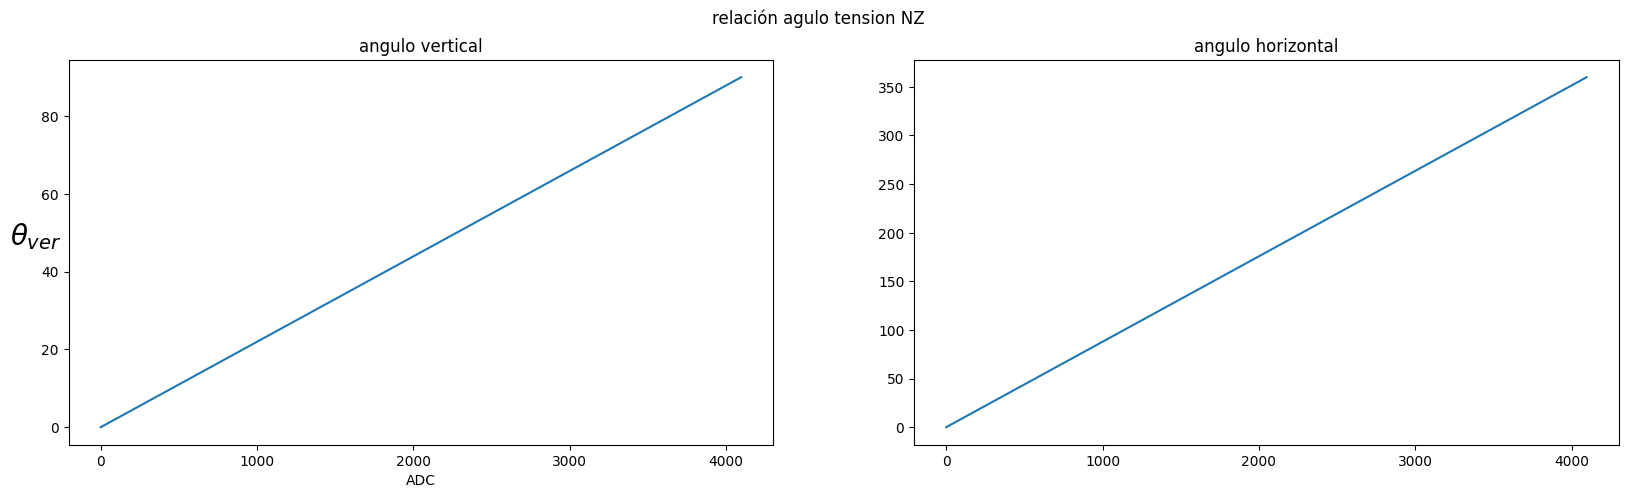

In [3]:
import numpy as np 
import matplotlib.pylab as plt

adc_teorical_values = np.arange(0,4096,1.0,dtype=float)  
## values expected 
angle_vertical = (90.0/4095)*(adc_teorical_values - 0)
angle_hor = (360.0/4096)*(adc_teorical_values - 0)

figTeorAng,axang = plt.subplots(nrows = 1 , ncols = 2, figsize = (20,5)) 
figTeorAng.suptitle('relación agulo tension NZ') 
axang[0].set_title('angulo vertical') 
axang[0].plot(adc_teorical_values,angle_vertical) 
axang[0].set_xlabel('ADC') 
axang[0].set_ylabel(r'$\theta_{ver}$',rotation=0,fontsize= 20) 
axang[1].plot(adc_teorical_values,angle_hor) 
axang[1].set_title('angulo horizontal')   

In [59]:


path_file_ver = '../../../results/TC-IV-ADC/VERT/'
path_file_hor = '../../../results/TC-IV-ADC/HOR/'
files_angle = ['TC-IV-ADC-0.50.txt',
        'TC-IV-ADC-0.75.txt']
#        '',
#        '',
#        '',]

error_expected = 0.5 


NBITS = 12 
MAX_VALUE = 2**NBITS
MAX_VOLTAGE = 3.3 
expected_angle = [] 
voltage_source = [0.5,0.75,1.0,1.5,2.0,2.75,3.3] ##units Volts
horizontal_mean_angle = [] 
horizontal_min_angle = [] 
horizontal_max_angle = [] 
vertical_mean_angle = [] 
vertical_max_angle = [] 
vertical_min_angle = [] 
ADC_expected_value = []
angle_expected_ver = []
angle_expected_hor = []

n_samples_adc   = np.arange(0,2000,1.0,dtype=float) # eje x para gráficas ADC 
raw_adc_data_ver= np.zeros((2000,len(files_angle)),dtype=int)
raw_adc_data_hor= np.zeros((2000,len(files_angle)),dtype=int)
angle_hor       = np.zeros((2000,len(files_angle)),dtype=float) ## .2 decimal point
angle_ver       = np.zeros((2000,len(files_angle)),dtype=float) ## .2 decimal point 


for l in voltage_source:
    ADC_expected_value.append(int( (MAX_VALUE/MAX_VOLTAGE)*l)) 

for i in ADC_expected_value:
    angle_expected_ver.append((90.0/4095)*(i - 0))
    angle_expected_hor.append((360.0/4095)*(i - 0)) 

### READ FILES VERTICAL 
# sample, angle(float),decimal 
i = 0 
for file in files_angle:    
    index, an_vert, adc_dec_raw= np.genfromtxt(path_file_ver+file, delimiter=',', dtype=None, encoding=None,unpack=True)
    ## parsing data 
    adc_dec_raw =adc_dec_raw.astype(int) 
    an_vert = an_vert.astype(float)
    raw_adc_data_ver[:,i] = np.array(adc_dec_raw)
    angle_ver[:,i] = np.array(an_vert)
    vertical_mean_angle.append(np.mean(an_vert))
    vertical_min_angle.append(np.amin(an_vert))
    vertical_max_angle.append(np.amax(an_vert))
    i = i + 1 


### READ FILES HORIZONTAL 
# sample, angle(float),decimal 
"""
i = 0 
for file in files_angle:    
    index, an_hor, adc_dec_raw= np.genfromtxt(path_file_hor+file, delimiter=',', dtype=None, encoding=None,unpack=True)
    ## parsing data 
    adc_dec_raw =adc_dec_raw.astype(int) 
    an_hor = an_hor.astype(float)
    raw_adc_data_hor[:,i] = np.array(adc_dec_raw)
    angle_hor[:,i] = np.array(an_vert)
    horizontal_mean_angle.append(np.mean(an_vert))
    horizontal_min_angle.append(np.amin(an_vert))
    horizontal_max_angle.append(np.amax(an_vert))
    i = i + 1 
"""







### plotting graphs 
##################################VOLTAGE = 0.5 ##################################################
## angle, angle_expected, angle_mean, figure (2 col, one file)
index = 0 ## 0.5v 
ax_index = [0,1] 

fig_anglev05,axangle05 = plt.subplots(nrows=1, ncols=2,figsize=(30,13))
fig_anglev05.suptitle(f'Voltage = {voltage_source[0]}V',fontsize = 40) 
#fig_anglev05.tight_layout(pad=2.0)
axangle05[0].plot(n_samples_adc, angle_ver[:,index],label='l1')
axangle05[0].axhline(y=vertical_mean_angle[index],label='l2') 
axangle05[1].plot(n_samples_adc, angle_ver[:,index],label='l2')
axangle05[1].axhline(y=vertical_mean_angle[index],label='l4') 

### configure plot 

axangle05[ax_index[0]].set_title('VERTICAL',fontsize = 30) 
axangle05[ax_index[0]].legend(loc='upper right',fontsize=25)
axangle05[ax_index[0]].set_xlabel('t',fontsize = 25) 
axangle05[ax_index[0]].set_ylabel(r'$\theta_{ver}$', rotation = 0,fontsize =25) 
axangle05[ax_index[0]].tick_params(axis='both', which='major', labelsize=20)
axangle05[ax_index[0]].xaxis.set_label_coords(0.94,0.03)
axangle05[ax_index[0]].yaxis.set_label_coords(0.03,0.95)
axangle05[ax_index[1]].set_title('HORIZONTAL',fontsize = 30) 
axangle05[ax_index[1]].legend(loc='upper right',fontsize=25)
axangle05[ax_index[1]].set_xlabel('t',fontsize = 25) 
axangle05[ax_index[1]].set_ylabel(r'$\theta_{hor}$', rotation = 0,fontsize =25) 
axangle05[ax_index[1]].tick_params(axis='both', which='major', labelsize=20)
axangle05[ax_index[1]].xaxis.set_label_coords(0.94,0.03)
axangle05[ax_index[1]].yaxis.set_label_coords(0.03,0.95)





SyntaxError: unterminated string literal (detected at line 99) (3316540682.py, line 99)

In [46]:
## generate table 
from IPython.display import HTML

linea1 = (angle_expected_ver[0], 
          vertical_mean_angle[0],
         angle_expected_hor[0],
          vertical_mean_angle[0],
         )

linea2 = (angle_expected_ver[1], 
          vertical_mean_angle[0],
          angle_expected_ver[1],
          vertical_mean_angle[0],
         )



linea3 = (angle_expected_ver[2],
           vertical_mean_angle[0],
          vertical_mean_angle[0],
         angle_expected_hor[2])

linea4 = (angle_expected_ver[3],
           vertical_mean_angle[0],
          vertical_mean_angle[0],
         
         angle_expected_hor[3])

linea5 = (angle_expected_ver[4], 
          vertical_mean_angle[0],
          vertical_mean_angle[0],
          angle_expected_hor[4])

linea6 = (angle_expected_ver[5], 
           vertical_mean_angle[0],
          vertical_mean_angle[0],
         
         angle_expected_hor[5])

linea7 = (angle_expected_ver[6], 
          vertical_mean_angle[0],
          vertical_mean_angle[0],
          angle_expected_hor[6])




html_code = """
<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0pky" colspan="2">TC-ADC-IV</th>
    <th class="tg-0pky" colspan="4">NOMBRE: TEST-ADC-ANGLE</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky" colspan="3">Angulo vertical</td>
    <td class="tg-0pky" colspan="3">Angulo horizontal</td>
  </tr>
  <tr>
    <td class="tg-0pky">Tensión [V]</td>
    <td class="tg-0pky">Angulo estimado</td>
    <td class="tg-0pky">Angulo medido</td>
    <td class="tg-0pky">Tensión [V]</td>
    <td class="tg-0pky">Angulo estimado</td>
    <td class="tg-0pky">Angulo medido</td>
  </tr>
  <tr>
    <td class="tg-0pky">0.50</td>
    <td class="tg-0pky">%.2f</td>
    <td class="tg-0pky">%.2f</td>
    <td class="tg-0pky">0.5</td>
    <td class="tg-0pky"><span style="font-weight:400;font-style:normal">%.2f</span></td>
    <td class="tg-0pky">%.2f</td>
  </tr>
  <tr>
    <td class="tg-0pky">0.75</td>
    <td class="tg-0pky">%.2f</td>
    <td class="tg-0pky">%.2f</td>
    <td class="tg-0pky">0.75</td>
    <td class="tg-0pky">%.2f</td>
    <td class="tg-0pky">%.2f</td>
  </tr>
  <tr>
    <td class="tg-0pky">1.00</td>
    <td class="tg-0pky">%.2f</td>
    <td class="tg-0pky">%.2f</td>
    <td class="tg-0pky">1.00</td>
    <td class="tg-0pky">%.2f</td>
    <td class="tg-0pky">%.2f</td>
  </tr>
  <tr>
    <td class="tg-0pky">1.50</td>
    <td class="tg-0pky">%.2f</td>
    <td class="tg-0pky">%.2f</td>
    <td class="tg-0pky">1.50</td>
    <td class="tg-0pky">%.2f</td>
    <td class="tg-0pky">%.2f</td>
  </tr>
  <tr>
    <td class="tg-0pky">2.00</td>
    <td class="tg-0pky">%.2f</td>
    <td class="tg-0pky">%.2f</td>
    <td class="tg-0pky">2.00</td>
    <td class="tg-0pky">%.2f</td>
    <td class="tg-0pky">%.2f</td>
  </tr>
  <tr>
    <td class="tg-0pky">2.75</td>
    <td class="tg-0pky">%.2f</td>
    <td class="tg-0pky">%.2f</td>
    <td class="tg-0pky">2.75</td>
    <td class="tg-0pky">%.2f</td>
    <td class="tg-0pky">%.2f</td>
  </tr>
  <tr>
    <td class="tg-0lax">3.30</td>
    <td class="tg-0lax">%.2f</td>
    <td class="tg-0lax">%.2f</td>
    <td class="tg-0lax">3.30</td>
    <td class="tg-0lax">%.2f</td>
    <td class="tg-0lax">%.2d</td>
  </tr>
</tbody>
</table>
"""% (linea1+linea2+linea3+linea4+linea5+linea6+linea7)

HTML(html_code) 


In [ ]:
# TC-ADC-IV: Test de relación angulo-tensión con cero y máximo corrido.aa

In [ ]:
## generate table 